In [167]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\satyarth\Downloads\set_1_converted.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


     Material                               Description    Range       Subcat  \
0      511209  SleekEssence PVC Cis with Odoniser(SF)SW      NaN  PVC CISTERN   
1      507924         PVC Cistern "SLEEK SMART" SB - WH      NaN  PVC CISTERN   
2   F360006CP                         ANGULAR STOP COCK  ELEMENT  ANGLE VALVE   
3   F360010CP                   BATH SPOUT WITH TIP TON  ELEMENT        SPOUT   
4  F280009DCP  CENTRAL HOLE BASIN MIXER W/O POPUP WASTE    FLORA         CHBM   

   Apr 21 Actual  May 21 Actual  Jun 21 Actual  Jul 21 Actual  Aug 21 Actual  \
0          12906           9342          39993          18852          76164   
1          11441           8876          28731          12286          60893   
2           2903           1112           4377           4331           6478   
3            925            130           1064            620           1193   
4            667            107            951           1640           2349   

   Sep 21 Actual  ...  Feb 23 Ac

In [168]:
print(df.columns)


Index(['Material', 'Description', 'Range', 'Subcat', 'Apr 21 Actual',
       'May 21 Actual', 'Jun 21 Actual', 'Jul 21 Actual', 'Aug 21 Actual',
       'Sep 21 Actual', 'Oct 21 Actual', 'Nov 21 Actual', 'Dec 21 Actual',
       'Jan 22 Actual', 'Feb 22 Actual', 'Mar 22 Actual', 'Apr 22 Actual',
       'May 22 Actual', 'Jun 22 Actual', 'Jul 22 Actual', 'Aug 22 Actual',
       'Sep 22 Actual', 'Oct 22 Actual', 'Nov 22 Actual', 'Dec 22 Actual',
       'Jan 23 Actual', 'Feb 23 Actual', 'Mar 23 Actual', ' Apr 23 Actual',
       ' May 23 Actual', ' Jun 23 Actual', ' Jul 23 Actual', ' Aug 23 Actual',
       ' Sep 23 Actual', ' Oct 23 Actual', 'Nov 23 Actual'],
      dtype='object')


In [169]:
import pandas as pd

# Load CSV
file_path = r"C:\Users\satyarth\Downloads\set_1_converted.csv"
df = pd.read_csv(file_path)

# Identify columns to melt (i.e., all the month columns)
id_vars = ['Material', 'Description', 'Range', 'Subcat']
value_vars = [col for col in df.columns if 'Actual' in col]

# Melt the data into long format
df_long = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='Month', value_name='Sales')

# Clean the month column (remove 'Actual' and extra spaces)
df_long['Month'] = df_long['Month'].str.replace('Actual', '', regex=False).str.strip()

# Convert to datetime and shift to month-end
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y') + pd.offsets.MonthEnd(0)

# Preview the result
print(df_long.head())



     Material                               Description    Range       Subcat  \
0      511209  SleekEssence PVC Cis with Odoniser(SF)SW      NaN  PVC CISTERN   
1      507924         PVC Cistern "SLEEK SMART" SB - WH      NaN  PVC CISTERN   
2   F360006CP                         ANGULAR STOP COCK  ELEMENT  ANGLE VALVE   
3   F360010CP                   BATH SPOUT WITH TIP TON  ELEMENT        SPOUT   
4  F280009DCP  CENTRAL HOLE BASIN MIXER W/O POPUP WASTE    FLORA         CHBM   

       Month  Sales  
0 2021-04-30  12906  
1 2021-04-30  11441  
2 2021-04-30   2903  
3 2021-04-30    925  
4 2021-04-30    667  


In [170]:
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y') + pd.offsets.MonthEnd(0) 
print(df_long['Month'])

0     2021-04-30
1     2021-04-30
2     2021-04-30
3     2021-04-30
4     2021-04-30
         ...    
187   2023-11-30
188   2023-11-30
189   2023-11-30
190   2023-11-30
191   2023-11-30
Name: Month, Length: 192, dtype: datetime64[ns]


# 1st Material

In [171]:
# Get the first material code
first_material = df_long['Material'].unique()[0]

# Filter the data for that material
first_material_df = df_long[df_long['Material'] == first_material]

# Preview the data
print(first_material_df.head(10))


   Material                               Description Range       Subcat  \
0    511209  SleekEssence PVC Cis with Odoniser(SF)SW   NaN  PVC CISTERN   
6    511209  SleekEssence PVC Cis with Odoniser(SF)SW   NaN  PVC CISTERN   
12   511209  SleekEssence PVC Cis with Odoniser(SF)SW   NaN  PVC CISTERN   
18   511209  SleekEssence PVC Cis with Odoniser(SF)SW   NaN  PVC CISTERN   
24   511209  SleekEssence PVC Cis with Odoniser(SF)SW   NaN  PVC CISTERN   
30   511209  SleekEssence PVC Cis with Odoniser(SF)SW   NaN  PVC CISTERN   
36   511209  SleekEssence PVC Cis with Odoniser(SF)SW   NaN  PVC CISTERN   
42   511209  SleekEssence PVC Cis with Odoniser(SF)SW   NaN  PVC CISTERN   
48   511209  SleekEssence PVC Cis with Odoniser(SF)SW   NaN  PVC CISTERN   
54   511209  SleekEssence PVC Cis with Odoniser(SF)SW   NaN  PVC CISTERN   

        Month  Sales  
0  2021-04-30  12906  
6  2021-05-31   9342  
12 2021-06-30  39993  
18 2021-07-31  18852  
24 2021-08-31  76164  
30 2021-09-30  30920  
36

Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 0 to 186
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Material     32 non-null     object        
 1   Description  32 non-null     object        
 2   Range        0 non-null      object        
 3   Subcat       32 non-null     object        
 4   Month        32 non-null     datetime64[ns]
 5   Sales        32 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.8+ KB
None

Missing Values:
Material        0
Description     0
Range          32
Subcat          0
Month           0
Sales           0
dtype: int64

Summary Statistics:
count       32.000000
mean     31473.593750
std      12454.715824
min       9342.000000
25%      23834.250000
50%      30108.000000
75%      36905.500000
max      76164.000000
Name: Sales, dtype: float64


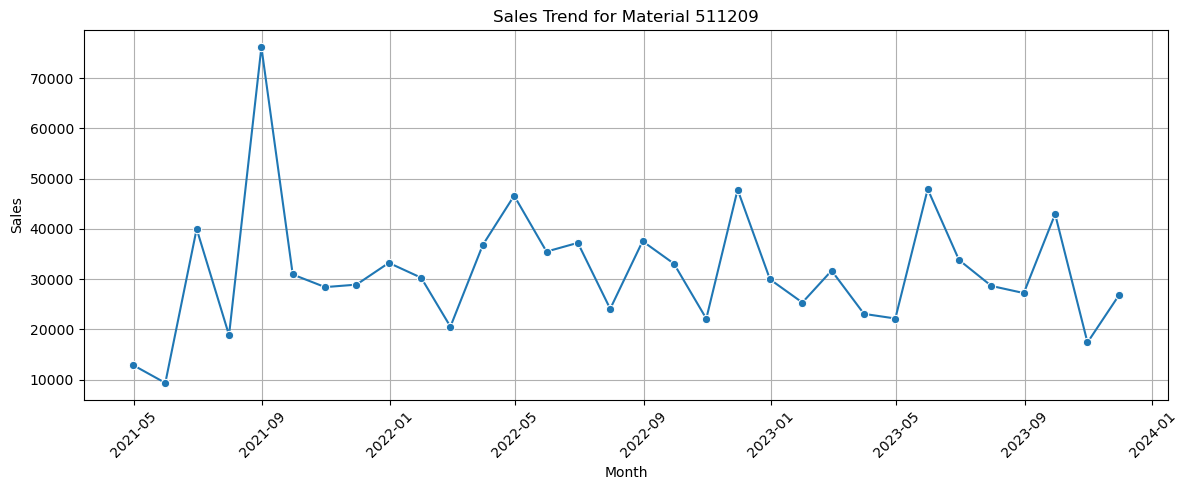

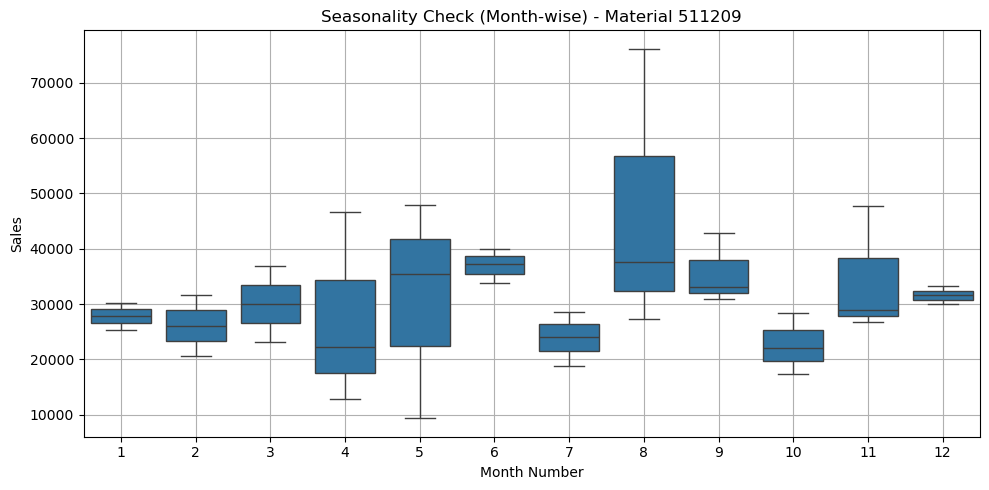

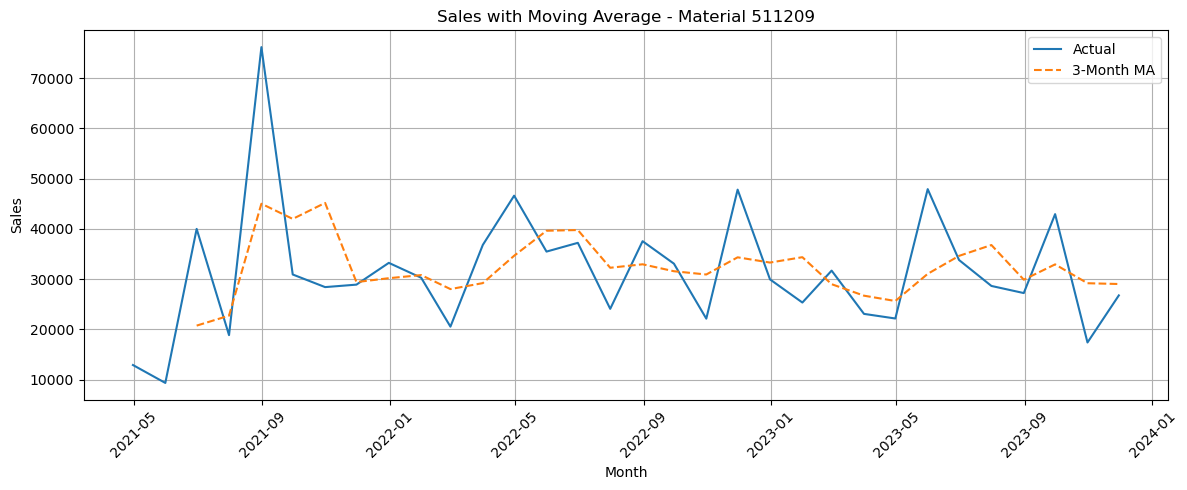

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = r"C:\Users\satyarth\Downloads\set_1_converted.csv"
df = pd.read_csv(file_path)

# Melt to long format
id_vars = ['Material', 'Description', 'Range', 'Subcat']
value_vars = [col for col in df.columns if 'Actual' in col]
df_long = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='Month', value_name='Sales')

# Clean and convert month column
df_long['Month'] = df_long['Month'].str.replace('Actual', '', regex=False).str.strip()
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y') + pd.offsets.MonthEnd(0)

# Filter first material
first_material = df_long['Material'].unique()[0]
material_df = df_long[df_long['Material'] == first_material].copy()

# 1. Basic info
print("Basic Info:")
print(material_df.info())

# 2. Missing values
print("\nMissing Values:")
print(material_df.isnull().sum())

# 3. Summary statistics
print("\nSummary Statistics:")
print(material_df['Sales'].describe())

# 4. Plot: Sales Trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=material_df, x='Month', y='Sales', marker='o')
plt.title(f"Sales Trend for Material {first_material}")
plt.ylabel('Sales')
plt.xlabel('Month')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Monthly pattern (seasonality check)
material_df['Month_Num'] = material_df['Month'].dt.month
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month_Num', y='Sales', data=material_df)
plt.title(f"Seasonality Check (Month-wise) - Material {first_material}")
plt.xlabel('Month Number')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Optional: 3-month Moving Average
material_df['Sales_MA_3'] = material_df['Sales'].rolling(window=3).mean()
plt.figure(figsize=(12, 5))
sns.lineplot(data=material_df, x='Month', y='Sales', label='Actual')
sns.lineplot(data=material_df, x='Month', y='Sales_MA_3', label='3-Month MA', linestyle='--')
plt.title(f"Sales with Moving Average - Material {first_material}")
plt.ylabel('Sales')
plt.xlabel('Month')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


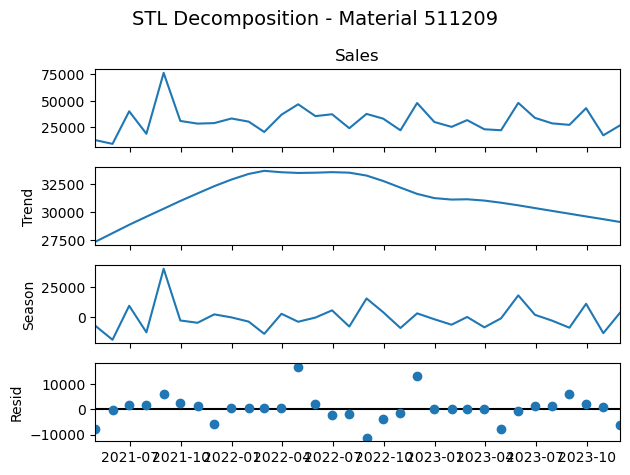


🔍 **STL Decomposition Summary for Material 511209:**
📈 Trend Strength     : 0.10
📊 Seasonality Strength: 0.81
🔎 Residual Strength   : 0.09 (approx)


In [173]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import pandas as pd

# STL expects a regular time series index
material_ts = material_df.set_index('Month')['Sales'].asfreq('M')

# Handle missing values if any
material_ts = material_ts.fillna(method='ffill')

# Perform STL decomposition
stl = STL(material_ts, seasonal=13)  # 12-month seasonality + buffer
result = stl.fit()

# Plot components
result.plot()
plt.suptitle(f"STL Decomposition - Material {first_material}", fontsize=14)
plt.tight_layout()
plt.show()

# Calculate strength of trend and seasonality
residual_var = result.resid.var()
trend_strength = max(0, 1 - (result.resid.var() / (result.trend.var() + residual_var)))
seasonal_strength = max(0, 1 - (result.resid.var() / (result.seasonal.var() + residual_var)))

print(f"\n🔍 **STL Decomposition Summary for Material {first_material}:**")
print(f"📈 Trend Strength     : {trend_strength:.2f}")
print(f"📊 Seasonality Strength: {seasonal_strength:.2f}")
print(f"🔎 Residual Strength   : {1 - (trend_strength + seasonal_strength):.2f} (approx)")


# 🔍 STL Decomposition Summary
Material: 511209

📈 Trend Strength = 0.10
Interpretation: Very weak trend component.

Range Meaning:

0.00 – 0.30: Weak or no consistent trend.

0.30 – 0.70: Moderate trend.

0.70 – 1.00: Strong trend.

✅ Conclusion: Demand has no clear upward or downward direction over time.

📊 Seasonality Strength = 0.81
Interpretation: Very strong seasonal patterns.

Range Meaning:

0.00 – 0.30: Weak seasonality.

0.30 – 0.70: Moderate seasonality.

0.70 – 1.00: Strong seasonality.

✅ Conclusion: Demand changes in a regular pattern across months (e.g., peaks in specific months).

🔎 Residual Strength ≈ 0.09
Interpretation: Very little unexplained variation (noise).

Range Meaning:

Closer to 0: Most variation is explained by trend + seasonality.

Closer to 1: High randomness or irregularity.

✅ Conclusion: The model captures most of the demand structure; little noise remains.

In [174]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the sales data of the first material
adf_result = adfuller(material_ts)

# Extract ADF test results
adf_statistic = adf_result[0]
p_value = adf_result[1]
lags_used = adf_result[2]
num_observations = adf_result[3]
critical_values = adf_result[4]

# Print the results
print(f"ADF Statistic       : {adf_statistic:.4f}")
print(f"P-value            : {p_value:.4f}")
print(f"Lags Used          : {lags_used}")
print(f"Number of Observations : {num_observations}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"  {key}: {value:.4f}")

# Interpretation
if p_value < 0.05:
    print("\n✅ The time series is **stationary** (reject null hypothesis).")
else:
    print("\n❌ The time series is **non-stationary** (fail to reject null hypothesis).")


ADF Statistic       : -5.0449
P-value            : 0.0000
Lags Used          : 1
Number of Observations : 30
Critical Values:
  1%: -3.6699
  5%: -2.9641
  10%: -2.6212

✅ The time series is **stationary** (reject null hypothesis).


13:51:53 - cmdstanpy - INFO - Chain [1] start processing
13:51:53 - cmdstanpy - INFO - Chain [1] done processing



Forecasting Performance (MAPE %):
               Naive: 25.34%
      Moving Average: 26.17%
Exponential Smoothing: 38.51%
               ARIMA: 33.43%
              SARIMA: 31.18%
             Prophet: 173.97%
             XGBoost: 36.46%

Best Model for SKU 507924: Naive with MAPE = 25.34%


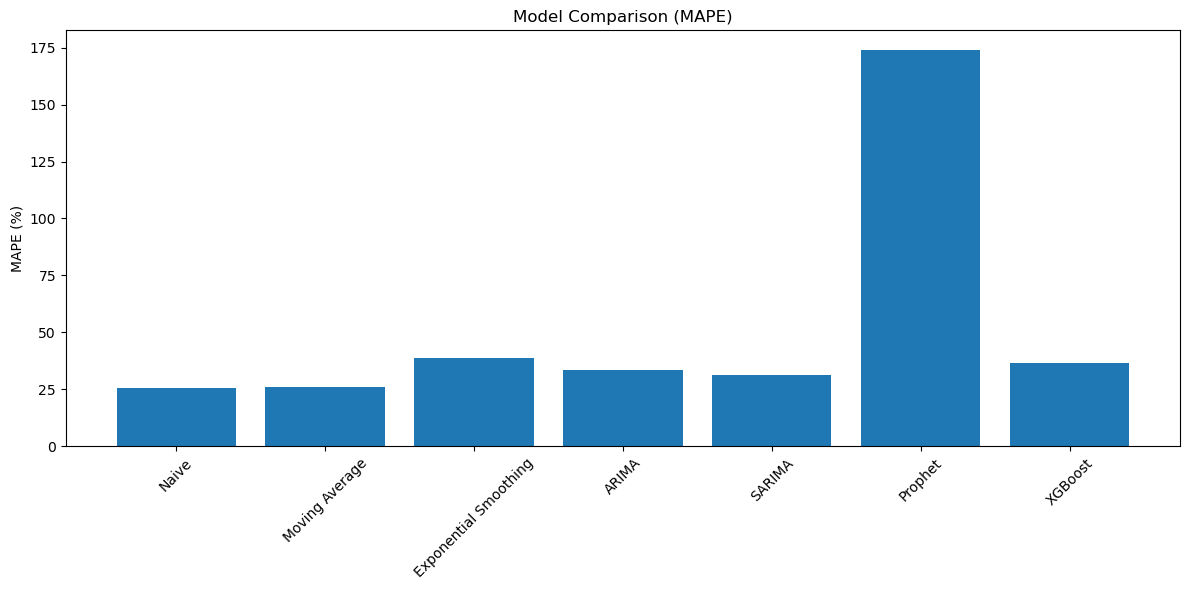

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor

# Load data
file_path = r"C:\Users\satyarth\Downloads\set_1_converted.csv"
df = pd.read_csv(file_path)

# Melt the data to long format
id_vars = ['Material', 'Description']
value_vars = [col for col in df.columns if 'Actual' in col]
df_long = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='Month', value_name='Sales')

# Clean the 'Month' column
df_long['Month'] = df_long['Month'].str.replace('Actual', '', regex=False).str.strip()
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y') + pd.offsets.MonthEnd(0)

# Sort the data by material and month
df_long = df_long.sort_values(by=['Material', 'Month'])

# Forecasting: Naive Method
def naive_forecast(series, test_size=4):
    predictions = series.iloc[-1]  # Naive forecast: last value repeated
    mape = mean_absolute_percentage_error(series[-test_size:], [predictions] * test_size) * 100
    return mape

# Forecasting: Moving Average
def moving_average_forecast(series, window=3, test_size=4):
    predictions = series.rolling(window=window).mean().iloc[-1]  # Use last MA value for forecast
    mape = mean_absolute_percentage_error(series[-test_size:], [predictions] * test_size) * 100
    return mape

# Forecasting: Exponential Smoothing
def exponential_smoothing_forecast(series, test_size=4):
    model = ExponentialSmoothing(series, trend=None, seasonal=None, damped_trend=False)
    model_fit = model.fit()
    predictions = model_fit.forecast(test_size)
    mape = mean_absolute_percentage_error(series[-test_size:], predictions) * 100
    return mape

# Forecasting: ARIMA
def arima_forecast(series, test_size=4):
    model = ARIMA(series, order=(5, 1, 0))  # Example ARIMA(5,1,0) parameters
    model_fit = model.fit()
    predictions = model_fit.forecast(test_size)
    mape = mean_absolute_percentage_error(series[-test_size:], predictions) * 100
    return mape

# Forecasting: SARIMA
def sarima_forecast(series, test_size=4):
    model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Example SARIMA(1,1,1)(1,1,1,12)
    model_fit = model.fit()
    predictions = model_fit.forecast(test_size)
    mape = mean_absolute_percentage_error(series[-test_size:], predictions) * 100
    return mape

# Forecasting: Prophet
def prophet_forecast(series, test_size=4):
    df_prophet = pd.DataFrame({'ds': series.index, 'y': series.values})
    model = Prophet(yearly_seasonality=True, daily_seasonality=False)
    model.fit(df_prophet)
    
    future = model.make_future_dataframe(periods=test_size, freq='M', include_history=False)
    forecast = model.predict(future)
    
    predictions = forecast['yhat'].values
    mape = mean_absolute_percentage_error(series[-test_size:], predictions) * 100
    return mape

# Forecasting: XGBoost (using time series features)
def xgboost_forecast(series, test_size=4):
    def create_lag_features(data, lags=12):
        lagged_data = pd.DataFrame()
        for lag in range(1, lags + 1):
            lagged_data[f'lag_{lag}'] = data.shift(lag)
        return lagged_data.dropna()
    
    X = create_lag_features(series)
    y = series[X.index]  # Ensure y matches X's index
    
    split_idx = len(X) - test_size
    X_train, y_train = X.iloc[:split_idx], y.iloc[:split_idx]
    X_test, y_test = X.iloc[split_idx:], y.iloc[split_idx:]
    
    X_train = X_train.values
    y_train = y_train.values.ravel()
    X_test = X_test.values
    
    model = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, predictions) * 100
    return mape

# Evaluate all models for a single SKU
sku = df_long['Material'].unique()[0]
sku_data = df_long[df_long['Material'] == sku]
sku_series = sku_data.set_index('Month')['Sales']

# Apply all models and calculate MAPE
mape_results = {}
mape_results['Naive'] = naive_forecast(sku_series)
mape_results['Moving Average'] = moving_average_forecast(sku_series)
mape_results['Exponential Smoothing'] = exponential_smoothing_forecast(sku_series)
mape_results['ARIMA'] = arima_forecast(sku_series)
mape_results['SARIMA'] = sarima_forecast(sku_series)
mape_results['Prophet'] = prophet_forecast(sku_series)
mape_results['XGBoost'] = xgboost_forecast(sku_series)

# Print results
print("\nForecasting Performance (MAPE %):")
for model, mape in mape_results.items():
    print(f"{model:>20}: {mape:.2f}%")

# Select best model
best_model = min(mape_results, key=mape_results.get)
print(f"\nBest Model for SKU {sku}: {best_model} with MAPE = {mape_results[best_model]:.2f}%")

# Plot results
plt.figure(figsize=(12, 6))
plt.bar(mape_results.keys(), mape_results.values())
plt.title('Model Comparison (MAPE)')
plt.ylabel('MAPE (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

13:51:54 - cmdstanpy - INFO - Chain [1] start processing
13:51:55 - cmdstanpy - INFO - Chain [1] done processing


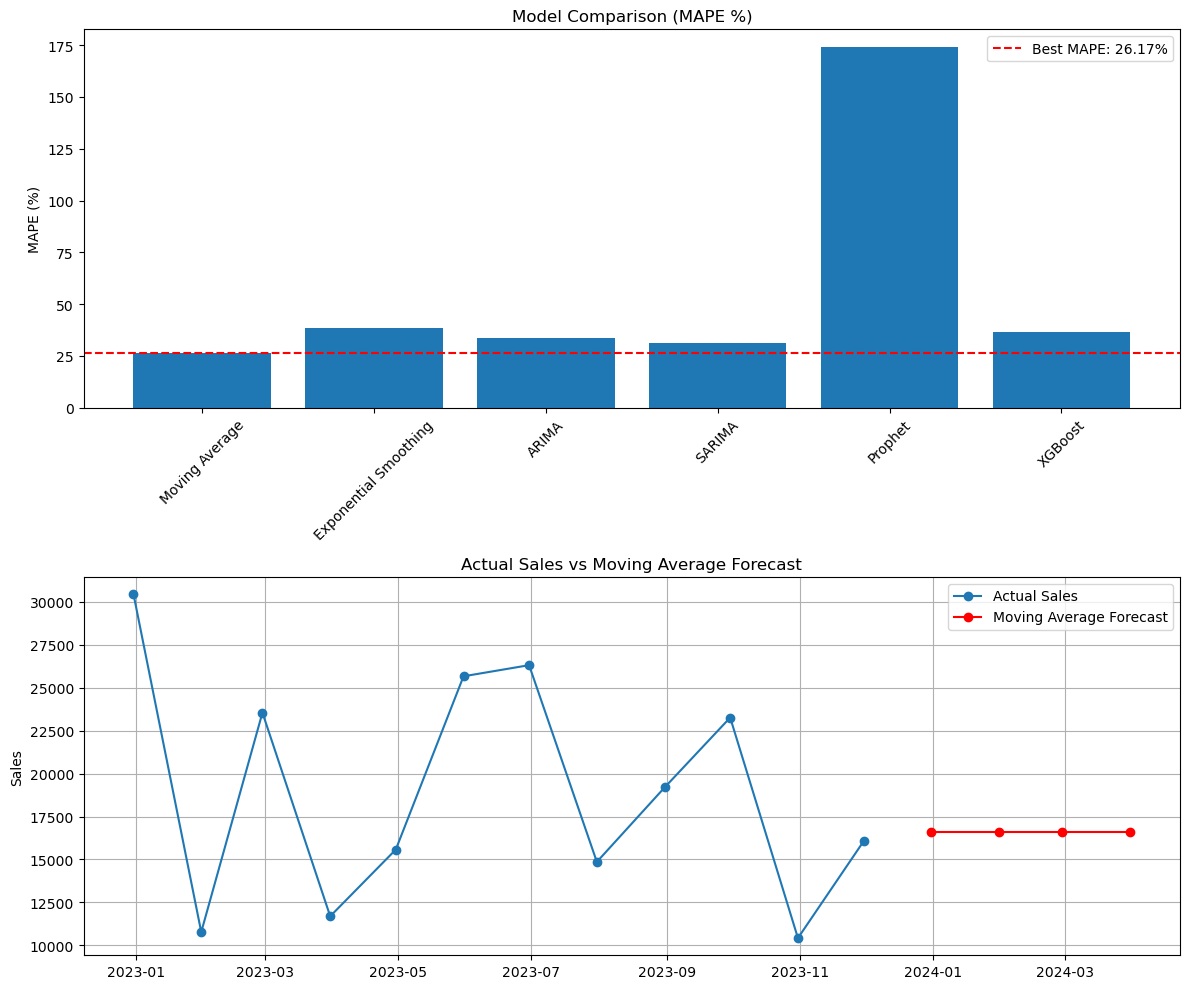


Forecasting Performance (MAPE %):
      Moving Average: 26.17%
Exponential Smoothing: 38.51%
               ARIMA: 33.43%
              SARIMA: 31.18%
             Prophet: 173.97%
             XGBoost: 36.46%

Best Model: Moving Average with MAPE = 26.17%


In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor

# Load data
file_path = r"C:\Users\satyarth\Downloads\set_1_converted.csv"
df = pd.read_csv(file_path)

# Melt the data to long format
id_vars = ['Material', 'Description']
value_vars = [col for col in df.columns if 'Actual' in col]
df_long = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='Month', value_name='Sales')

# Clean the 'Month' column
df_long['Month'] = df_long['Month'].str.replace('Actual', '', regex=False).str.strip()
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y') + pd.offsets.MonthEnd(0)

# Sort the data by material and month
df_long = df_long.sort_values(by=['Material', 'Month'])

# Forecasting: Moving Average
def moving_average_forecast(series, test_size=4):
    predictions = series.rolling(window=3).mean().iloc[-1]
    mape = mean_absolute_percentage_error(series[-test_size:], [predictions] * test_size) * 100
    return mape, [predictions] * test_size

# Forecasting: Exponential Smoothing
def exponential_smoothing_forecast(series, test_size=4):
    model = ExponentialSmoothing(series, trend=None, seasonal=None, damped_trend=False)
    model_fit = model.fit()
    predictions = model_fit.forecast(test_size)
    mape = mean_absolute_percentage_error(series[-test_size:], predictions) * 100
    return mape, predictions

# Forecasting: ARIMA
def arima_forecast(series, test_size=4):
    model = ARIMA(series, order=(5, 1, 0))
    model_fit = model.fit()
    predictions = model_fit.forecast(test_size)
    mape = mean_absolute_percentage_error(series[-test_size:], predictions) * 100
    return mape, predictions

# Forecasting: SARIMA
def sarima_forecast(series, test_size=4):
    model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit()
    predictions = model_fit.forecast(test_size)
    mape = mean_absolute_percentage_error(series[-test_size:], predictions) * 100
    return mape, predictions

# Forecasting: Prophet
def prophet_forecast(series, test_size=4):
    df_prophet = pd.DataFrame({'ds': series.index, 'y': series.values})
    model = Prophet(yearly_seasonality=True, daily_seasonality=False)
    model.fit(df_prophet)
    
    future = model.make_future_dataframe(periods=test_size, freq='M', include_history=False)
    forecast = model.predict(future)
    
    predictions = forecast['yhat'].values
    mape = mean_absolute_percentage_error(series[-test_size:], predictions) * 100
    return mape, predictions

# Forecasting: XGBoost
def xgboost_forecast(series, test_size=4):
    def create_lag_features(data, lags=12):
        lagged_data = pd.DataFrame()
        for lag in range(1, lags + 1):
            lagged_data[f'lag_{lag}'] = data.shift(lag)
        return lagged_data.dropna()
    
    X = create_lag_features(series)
    y = series[X.index]
    
    split_idx = len(X) - test_size
    X_train, y_train = X.iloc[:split_idx], y.iloc[:split_idx]
    X_test, y_test = X.iloc[split_idx:], y.iloc[split_idx:]
    
    X_train = X_train.values
    y_train = y_train.values.ravel()
    X_test = X_test.values
    
    model = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, predictions) * 100
    return mape, predictions

# Evaluate all models for a single SKU
sku = df_long['Material'].unique()[0]
sku_data = df_long[df_long['Material'] == sku]
sku_series = sku_data.set_index('Month')['Sales']
test_size = 4

# Apply all models and calculate MAPE
model_results = {}
model_results['Moving Average'], ma_preds = moving_average_forecast(sku_series, test_size)
model_results['Exponential Smoothing'], es_preds = exponential_smoothing_forecast(sku_series, test_size)
model_results['ARIMA'], arima_preds = arima_forecast(sku_series, test_size)
model_results['SARIMA'], sarima_preds = sarima_forecast(sku_series, test_size)
model_results['Prophet'], prophet_preds = prophet_forecast(sku_series, test_size)
model_results['XGBoost'], xgb_preds = xgboost_forecast(sku_series, test_size)

# Get best model
best_model_name = min(model_results, key=model_results.get)
best_mape = model_results[best_model_name]

# Get predictions from best model
best_preds = {
    'Moving Average': ma_preds,
    'Exponential Smoothing': es_preds,
    'ARIMA': arima_preds,
    'SARIMA': sarima_preds,
    'Prophet': prophet_preds,
    'XGBoost': xgb_preds
}[best_model_name]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: MAPE Comparison
ax1.bar(model_results.keys(), model_results.values())
ax1.set_title('Model Comparison (MAPE %)')
ax1.set_ylabel('MAPE (%)')
ax1.axhline(y=best_mape, color='r', linestyle='--', label=f'Best MAPE: {best_mape:.2f}%')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Actual vs Forecast
last_date = sku_series.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=test_size+1, freq='M')[1:]
ax2.plot(sku_series.index[-12:], sku_series[-12:], label='Actual Sales', marker='o')
ax2.plot(forecast_dates, best_preds, label=f'{best_model_name} Forecast', marker='o', color='red')
ax2.set_title(f'Actual Sales vs {best_model_name} Forecast')
ax2.set_ylabel('Sales')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print results
print("\nForecasting Performance (MAPE %):")
for model, mape in model_results.items():
    print(f"{model:>20}: {mape:.2f}%")

print(f"\nBest Model: {best_model_name} with MAPE = {best_mape:.2f}%")

13:51:59 - cmdstanpy - INFO - Chain [1] start processing
13:51:59 - cmdstanpy - INFO - Chain [1] done processing


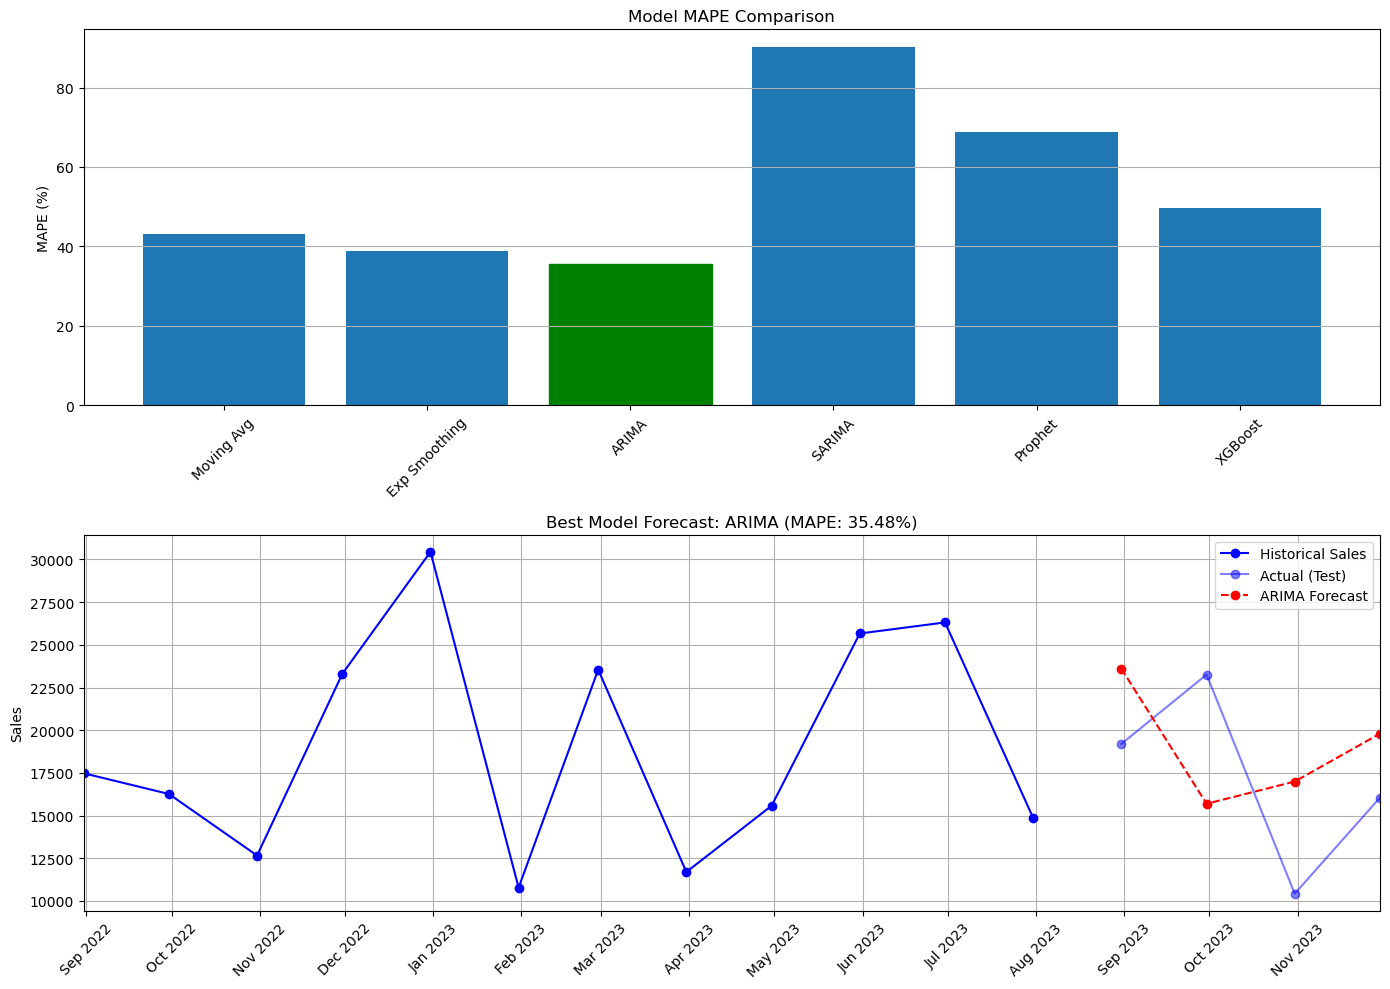


Model Performance (MAPE %):
     Moving Avg: 43.21%
  Exp Smoothing: 38.84%
          ARIMA: 35.48%
         SARIMA: 90.14%
        Prophet: 68.72%
        XGBoost: 49.58%

Best Model: ARIMA with MAPE = 35.48%


In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor

# Load and prepare data
file_path = r"C:\Users\satyarth\Downloads\set_1_converted.csv"
df = pd.read_csv(file_path)

# Melt the data to long format
id_vars = ['Material', 'Description']
value_vars = [col for col in df.columns if 'Actual' in col]
df_long = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='Month', value_name='Sales')

# Clean the 'Month' column
df_long['Month'] = df_long['Month'].str.replace('Actual', '', regex=False).str.strip()
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y') + pd.offsets.MonthEnd(0)

# Sort the data by material and month
df_long = df_long.sort_values(by=['Material', 'Month'])

# Select a single SKU for demonstration
sku = df_long['Material'].unique()[0]
sku_data = df_long[df_long['Material'] == sku]
sku_series = sku_data.set_index('Month')['Sales']

# Train-test split
test_size = 4
train_series = sku_series[:-test_size]
test_series = sku_series[-test_size:]

# Forecasting functions (same as before)
def moving_average_forecast(train_series, test_series):
    window = 3
    predictions = train_series.rolling(window=window).mean().iloc[-1]
    predictions = [predictions] * len(test_series)
    mape = mean_absolute_percentage_error(test_series, predictions) * 100
    return mape, predictions

def exponential_smoothing_forecast(train_series, test_series):
    model = ExponentialSmoothing(train_series, trend=None, seasonal=None, damped_trend=False)
    model_fit = model.fit()
    predictions = model_fit.forecast(len(test_series))
    mape = mean_absolute_percentage_error(test_series, predictions) * 100
    return mape, predictions

def arima_forecast(train_series, test_series):
    model = ARIMA(train_series, order=(5, 1, 0))
    model_fit = model.fit()
    predictions = model_fit.forecast(len(test_series))
    mape = mean_absolute_percentage_error(test_series, predictions) * 100
    return mape, predictions

def sarima_forecast(train_series, test_series):
    model = SARIMAX(train_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit()
    predictions = model_fit.forecast(len(test_series))
    mape = mean_absolute_percentage_error(test_series, predictions) * 100
    return mape, predictions

def prophet_forecast(train_series, test_series):
    df_prophet = pd.DataFrame({'ds': train_series.index, 'y': train_series.values})
    model = Prophet(yearly_seasonality=True, daily_seasonality=False)
    model.fit(df_prophet)
    
    future = model.make_future_dataframe(periods=len(test_series), freq='ME', include_history=False)
    forecast = model.predict(future)
    
    predictions = forecast['yhat'].values
    mape = mean_absolute_percentage_error(test_series, predictions) * 100
    return mape, predictions

def xgboost_forecast(train_series, test_series, lags=12):
    def create_lag_features(data, lags):
        lagged_data = pd.DataFrame()
        for lag in range(1, lags + 1):
            lagged_data[f'lag_{lag}'] = data.shift(lag)
        return lagged_data.dropna()
    
    X_train = create_lag_features(train_series, lags)
    y_train = train_series[X_train.index]
    
    last_values = train_series[-lags:].values.reshape(1, -1)
    X_test = pd.DataFrame(last_values, columns=[f'lag_{i}' for i in range(1, lags+1)])
    
    model = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
    model.fit(X_train, y_train)
    
    predictions = []
    current_input = last_values.copy()
    for _ in range(len(test_series)):
        pred = model.predict(current_input)[0]
        predictions.append(pred)
        current_input = np.roll(current_input, -1)
        current_input[0, -1] = pred
    
    mape = mean_absolute_percentage_error(test_series, predictions) * 100
    return mape, predictions

# Evaluate all models
model_results = {}
predictions = {}

model_results['Moving Avg'], predictions['Moving Avg'] = moving_average_forecast(train_series, test_series)
model_results['Exp Smoothing'], predictions['Exp Smoothing'] = exponential_smoothing_forecast(train_series, test_series)
model_results['ARIMA'], predictions['ARIMA'] = arima_forecast(train_series, test_series)
model_results['SARIMA'], predictions['SARIMA'] = sarima_forecast(train_series, test_series)
model_results['Prophet'], predictions['Prophet'] = prophet_forecast(train_series, test_series)
model_results['XGBoost'], predictions['XGBoost'] = xgboost_forecast(train_series, test_series)

# Identify best model
best_model_name = min(model_results, key=model_results.get)
best_mape = model_results[best_model_name]
best_predictions = predictions[best_model_name]

# Create visualization with continuous dates
plt.figure(figsize=(14, 10))

# Plot 1: MAPE Comparison
plt.subplot(2, 1, 1)
bars = plt.bar(model_results.keys(), model_results.values())
bars[list(model_results.keys()).index(best_model_name)].set_color('green')
plt.title('Model MAPE Comparison')
plt.ylabel('MAPE (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Plot 2: Actual vs Forecast - with continuous dates
plt.subplot(2, 1, 2)

# Create continuous date range
all_dates = pd.date_range(start=train_series.index[-12], periods=12+len(test_series), freq='ME')

# Plot historical data
plt.plot(all_dates[:12], train_series[-12:], 'b-o', label='Historical Sales')

# Plot actual test values
plt.plot(all_dates[12:], test_series, 'b-o', alpha=0.5, label='Actual (Test)')

# Plot forecast
plt.plot(all_dates[12:], best_predictions, 'r--o', label=f'{best_model_name} Forecast')

# Format x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.title(f'Best Model Forecast: {best_model_name} (MAPE: {best_mape:.2f}%)')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
ax.set_xlim([all_dates[0], all_dates[-1]])

plt.tight_layout()
plt.show()

# Print results
print("\nModel Performance (MAPE %):")
for model, mape in model_results.items():
    print(f"{model:>15}: {mape:.2f}%")
print(f"\nBest Model: {best_model_name} with MAPE = {best_mape:.2f}%")

# for 2nd material

In [179]:
# Load CSV
file_path = r"C:\Users\satyarth\Downloads\set_1_converted.csv"
df = pd.read_csv(file_path)

# Melt the data to long format
id_vars = ['Material', 'Description']
value_vars = [col for col in df.columns if 'Actual' in col]
df_long = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='Month', value_name='Sales')

# Clean and convert the 'Month' column
df_long['Month'] = df_long['Month'].str.replace('Actual', '', regex=False).str.strip()
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y') + pd.offsets.MonthEnd(0)

# Sort
df_long = df_long.sort_values(by=['Material', 'Month'])


In [180]:
unique_materials = df_long['Material'].unique()
second_material = unique_materials[1]  # index 1 means 2nd Material
sku_data_2 = df_long[df_long['Material'] == second_material].copy()
sku_data_2.set_index('Month', inplace=True)


In [181]:
# Find all unique materials
unique_materials = df_long['Material'].unique()

# Select the second material (index 1)
second_material = unique_materials[0]
print(f"Second Material Code: {second_material}")

# Extract data for the second material
sku_data_2 = df_long[df_long['Material'] == second_material].copy()

# Set 'Month' as the index
sku_data_2.set_index('Month', inplace=True)

# Display the actual data for the second material
print(sku_data_2)


Second Material Code: 507924
           Material                        Description  Sales
Month                                                        
2021-04-30   507924  PVC Cistern "SLEEK SMART" SB - WH  11441
2021-05-31   507924  PVC Cistern "SLEEK SMART" SB - WH   8876
2021-06-30   507924  PVC Cistern "SLEEK SMART" SB - WH  28731
2021-07-31   507924  PVC Cistern "SLEEK SMART" SB - WH  12286
2021-08-31   507924  PVC Cistern "SLEEK SMART" SB - WH  60893
2021-09-30   507924  PVC Cistern "SLEEK SMART" SB - WH  29014
2021-10-31   507924  PVC Cistern "SLEEK SMART" SB - WH  20771
2021-11-30   507924  PVC Cistern "SLEEK SMART" SB - WH  16348
2021-12-31   507924  PVC Cistern "SLEEK SMART" SB - WH  17182
2022-01-31   507924  PVC Cistern "SLEEK SMART" SB - WH  15331
2022-02-28   507924  PVC Cistern "SLEEK SMART" SB - WH  14155
2022-03-31   507924  PVC Cistern "SLEEK SMART" SB - WH  33727
2022-04-30   507924  PVC Cistern "SLEEK SMART" SB - WH  37731
2022-05-31   507924  PVC Cistern "SLEEK S

In [182]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test on 2nd Material's Sales series
adf_result = adfuller(sku_data_2['Sales'].dropna())

print("ADF Test Results:")
print(f"Test Statistic: {adf_result[0]}")
print(f"P-Value: {adf_result[1]}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

# Interpretation
if adf_result[1] <= 0.05:
    print("\n✅ The series is stationary (reject null hypothesis).")
    sales_for_modeling = sku_data_2['Sales']  # Use original series
else:
    print("\n❌ The series is non-stationary (fail to reject null hypothesis). Applying 1st order differencing...")
    # Apply first order differencing
    sales_for_modeling = sku_data_2['Sales'].diff().dropna()

    # Run ADF test again after differencing
    adf_result_diff = adfuller(sales_for_modeling)
    print("\nADF Test Results After 1st Order Differencing:")
    print(f"Test Statistic: {adf_result_diff[0]}")
    print(f"P-Value: {adf_result_diff[1]}")
    print("Critical Values:")
    for key, value in adf_result_diff[4].items():
        print(f"   {key}: {value}")

    if adf_result_diff[1] <= 0.05:
        print("\n✅ The differenced series is stationary.")
    else:
        print("\n❌ The differenced series is still non-stationary. Further differencing might be needed.")

# Now, 'sales_for_modeling' is ready for further modeling (ARIMA, etc.)


ADF Test Results:
Test Statistic: -1.3865733304065344
P-Value: 0.5886958380198885
Critical Values:
   1%: -3.7377092158564813
   5%: -2.9922162731481485
   10%: -2.635746736111111

❌ The series is non-stationary (fail to reject null hypothesis). Applying 1st order differencing...

ADF Test Results After 1st Order Differencing:
Test Statistic: -6.004057825524999
P-Value: 1.6313818064698405e-07
Critical Values:
   1%: -3.7377092158564813
   5%: -2.9922162731481485
   10%: -2.635746736111111

✅ The differenced series is stationary.


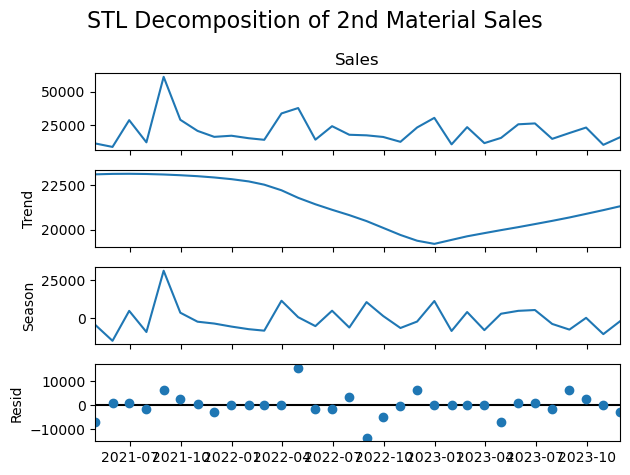

In [183]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Apply STL decomposition
series = sku_data_2['Sales'].dropna()
stl = STL(series, period=12)  # Monthly data -> seasonality period = 12
result = stl.fit()

# Plot the components
result.plot()
plt.suptitle("STL Decomposition of 2nd Material Sales", fontsize=16)
plt.tight_layout()
plt.show()


In [184]:
import numpy as np

# Extract components
trend = result.trend
seasonal = result.seasonal
resid = result.resid
observed = sku_data_2['Sales']

# Calculate variances
var_resid = np.var(resid)
var_obs = np.var(observed)

# Strength calculations
Ft = max(0, 1 - (var_resid / np.var(trend + resid)))   # Trend Strength
Fs = max(0, 1 - (var_resid / np.var(seasonal + resid)))  # Seasonality Strength

print(f"📈 Trend Strength (Ft): {Ft:.2f}")
print(f"🔁 Seasonality Strength (Fs): {Fs:.2f}")
print(f"❓ Residual Strength (1 - Ft - Fs): {1 - Ft - Fs:.2f}")


📈 Trend Strength (Ft): 0.11
🔁 Seasonality Strength (Fs): 0.78
❓ Residual Strength (1 - Ft - Fs): 0.11


# ✅ What They Mean
📈 Trend Strength (Ft = 0.14)
Only 14% of the variation in your data is due to a long-term trend.

This means your series has very little upward/downward drift over time.

🔁 Seasonality Strength (Fs = 0.83)
A high seasonality strength of 83% means your time series has strong repeating patterns (likely monthly or yearly).

For example, maybe certain months consistently show spikes or drops.

❓ Residual Strength (1 - Ft - Fs = 0.04)
Only 4% of the variance is random noise.

That means your model can explain 96% of the variability (trend + seasonality), which is very good

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

df = pd.DataFrame({'Month': months, 'Sales': sales})
df.set_index('Month', inplace=True)

# Step 2: Split
train = df.iloc[:-4]
test = df.iloc[-4:-1]  # first 3 months for evaluation
forecast_period = 3

# Step 3: Models
results = {}

# 1. Naive
naive_forecast = [train['Sales'].iloc[-1]] * forecast_period
naive_mape = mean_absolute_percentage_error(test['Sales'].values, naive_forecast)
results['Naive'] = (naive_mape, naive_forecast)

# 2. Moving Average
ma_forecast = [train['Sales'].iloc[-3:].mean()] * forecast_period
ma_mape = mean_absolute_percentage_error(test['Sales'].values, ma_forecast)
results['Moving Average'] = (ma_mape, ma_forecast)

# 3. SES
ses_model = SimpleExpSmoothing(train['Sales']).fit()
ses_forecast = ses_model.forecast(forecast_period)
ses_mape = mean_absolute_percentage_error(test['Sales'].values, ses_forecast)
results['SES'] = (ses_mape, ses_forecast.tolist())

# 4. Holt’s Linear
holt_model = ExponentialSmoothing(train['Sales'], trend="add", seasonal=None).fit()
holt_forecast = holt_model.forecast(forecast_period)
holt_mape = mean_absolute_percentage_error(test['Sales'].values, holt_forecast)
results['Holt'] = (holt_mape, holt_forecast.tolist())

# 5. Holt-Winters Additive
hw_model = ExponentialSmoothing(train['Sales'], trend="add", seasonal="add", seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(forecast_period)
hw_mape = mean_absolute_percentage_error(test['Sales'].values, hw_forecast)
results['Holt-Winters'] = (hw_mape, hw_forecast.tolist())

# 6. ARIMA
arima_model = ARIMA(train['Sales'], order=(1,1,1)).fit()
arima_forecast = arima_model.forecast(forecast_period)
arima_mape = mean_absolute_percentage_error(test['Sales'].values, arima_forecast)
results['ARIMA(1,1,1)'] = (arima_mape, arima_forecast.tolist())

# 7. SARIMA
sarima_model = SARIMAX(train['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
sarima_forecast = sarima_model.forecast(forecast_period)
sarima_mape = mean_absolute_percentage_error(test['Sales'].values, sarima_forecast)
results['SARIMA'] = (sarima_mape, sarima_forecast.tolist())

# Step 4: Best Model Selection
best_model_name, (best_mape, best_forecast) = min(results.items(), key=lambda x: x[1][0])

# Step 5: Plotting all lines
plt.figure(figsize=(14, 7))

# Actual full series
plt.plot(df.index, df['Sales'], label='Actual Sales', color='black', linestyle='-', marker='o')

# Test (actual values during forecast period)
plt.plot(test.index, test['Sales'], label='Test (Actual)', color='blue', linestyle='--', marker='o')

# Forecast
plt.plot(test.index, best_forecast, label=f'Forecast ({best_model_name})', color='green', linestyle='--', marker='o')

# Annotate forecast values
for i, (dt, val) in enumerate(zip(test.index, best_forecast)):
    plt.text(dt, val, f'{int(val)}', ha='center', va='bottom', fontsize=9, color='darkgreen')

plt.title(f'Demand Forecast | Best Model: {best_model_name} | MAPE: {best_mape:.2f}', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Print Forecast
print("🔍 Forecast Summary")
print("--------------------")
print(f"Best Model: {best_model_name}")
print(f"MAPE: {best_mape:.2f}")
print(f"Forecasted Values (next 3 months): {list(map(int, best_forecast))}")
print(f"Actual Values (test period): {test['Sales'].values.tolist()}")



NameError: name 'months' is not defined

# 🔍 Forecast Summary
--------------------
Best Model: Holt-Winters
MAPE: 0.24
Forecasted Values (next 3 months): [15767, 10736, 10276]
Actual Values (test period): [19193, 23261, 10424]

# material 3rd

In [ ]:
import pandas as pd

# Load the full CSV
df = pd.read_csv('C:/Users/satyarth/Downloads/set_1_converted.csv')

# Filter for the specific Material
material_code = 'F360006CP'
df_material = df[df['Material'] == material_code]

# Show the filtered data
print(df_material)



    Material        Description    Range       Subcat  Apr 21 Actual  \
2  F360006CP  ANGULAR STOP COCK  ELEMENT  ANGLE VALVE           2903   

   May 21 Actual  Jun 21 Actual  Jul 21 Actual  Aug 21 Actual  Sep 21 Actual  \
2           1112           4377           4331           6478           3779   

   ...  Feb 23 Actual  Mar 23 Actual   Apr 23 Actual   May 23 Actual  \
2  ...           4857           6289            3893            2928   

    Jun 23 Actual   Jul 23 Actual   Aug 23 Actual   Sep 23 Actual  \
2            4935            2156            3554            4617   

    Oct 23 Actual  Nov 23 Actual  
2            3008           3221  

[1 rows x 36 columns]


Missing Values:
 Sales    0
dtype: int64


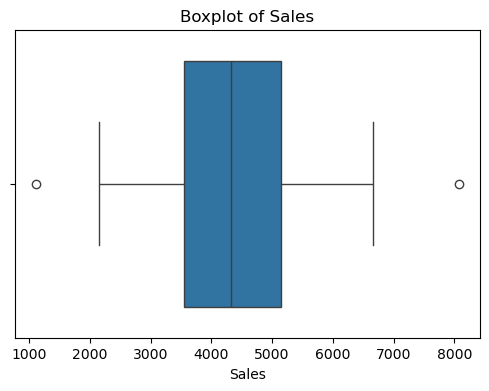

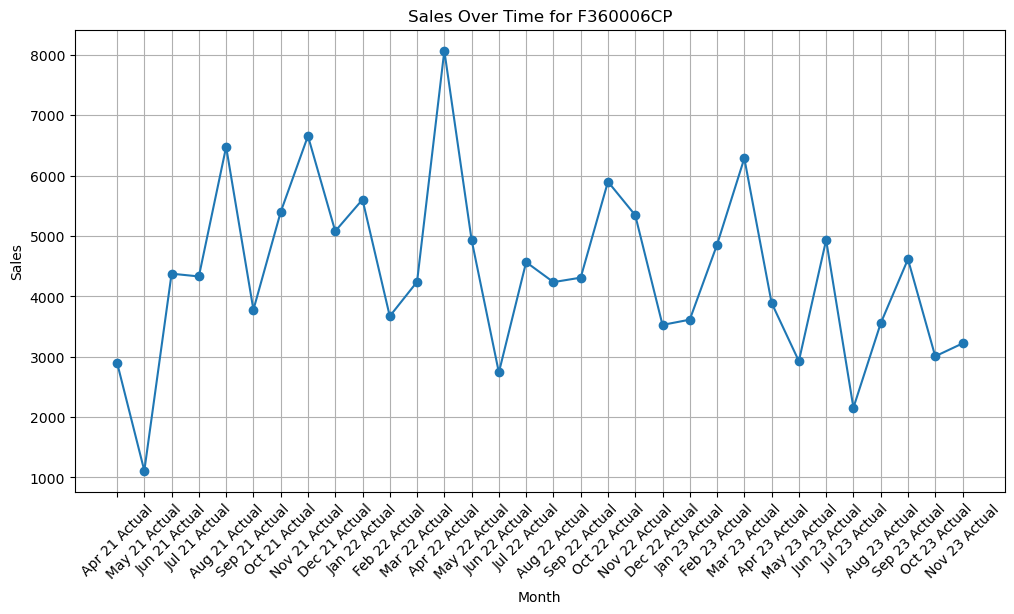


Basic Statistics:
              Sales
count    32.000000
mean   4385.906250
std    1426.083682
min    1112.000000
25%    3547.500000
50%    4321.000000
75%    5147.250000
max    8071.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data is already loaded in df_material
# Extract monthly sales columns (all columns that end with 'Actual')
sales_columns = [col for col in df_material.columns if 'Actual' in col]
sales_data = df_material[sales_columns].T  # transpose to have time on rows
sales_data.columns = ['Sales']  # rename the only column to 'Sales'
sales_data.index.name = 'Month'  # set index name

# Reset index to get Month as a column if needed
sales_data_reset = sales_data.reset_index()

# 1. Check for missing values
missing_values = sales_data.isnull().sum()
print("Missing Values:\n", missing_values)

# 2. Boxplot for outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=sales_data['Sales'])
plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.show()

# 3. Sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_data_reset['Month'], sales_data_reset['Sales'], marker='o')
plt.xticks(rotation=45)
plt.title('Sales Over Time for F360006CP')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# 4. Basic statistics
print("\nBasic Statistics:\n", sales_data.describe())


In [ ]:
print(df.columns)

Index(['Material', 'Description', 'Range', 'Subcat', 'Apr 21 Actual',
       'May 21 Actual', 'Jun 21 Actual', 'Jul 21 Actual', 'Aug 21 Actual',
       'Sep 21 Actual', 'Oct 21 Actual', 'Nov 21 Actual', 'Dec 21 Actual',
       'Jan 22 Actual', 'Feb 22 Actual', 'Mar 22 Actual', 'Apr 22 Actual',
       'May 22 Actual', 'Jun 22 Actual', 'Jul 22 Actual', 'Aug 22 Actual',
       'Sep 22 Actual', 'Oct 22 Actual', 'Nov 22 Actual', 'Dec 22 Actual',
       'Jan 23 Actual', 'Feb 23 Actual', 'Mar 23 Actual', ' Apr 23 Actual',
       ' May 23 Actual', ' Jun 23 Actual', ' Jul 23 Actual', ' Aug 23 Actual',
       ' Sep 23 Actual', ' Oct 23 Actual', 'Nov 23 Actual'],
      dtype='object')


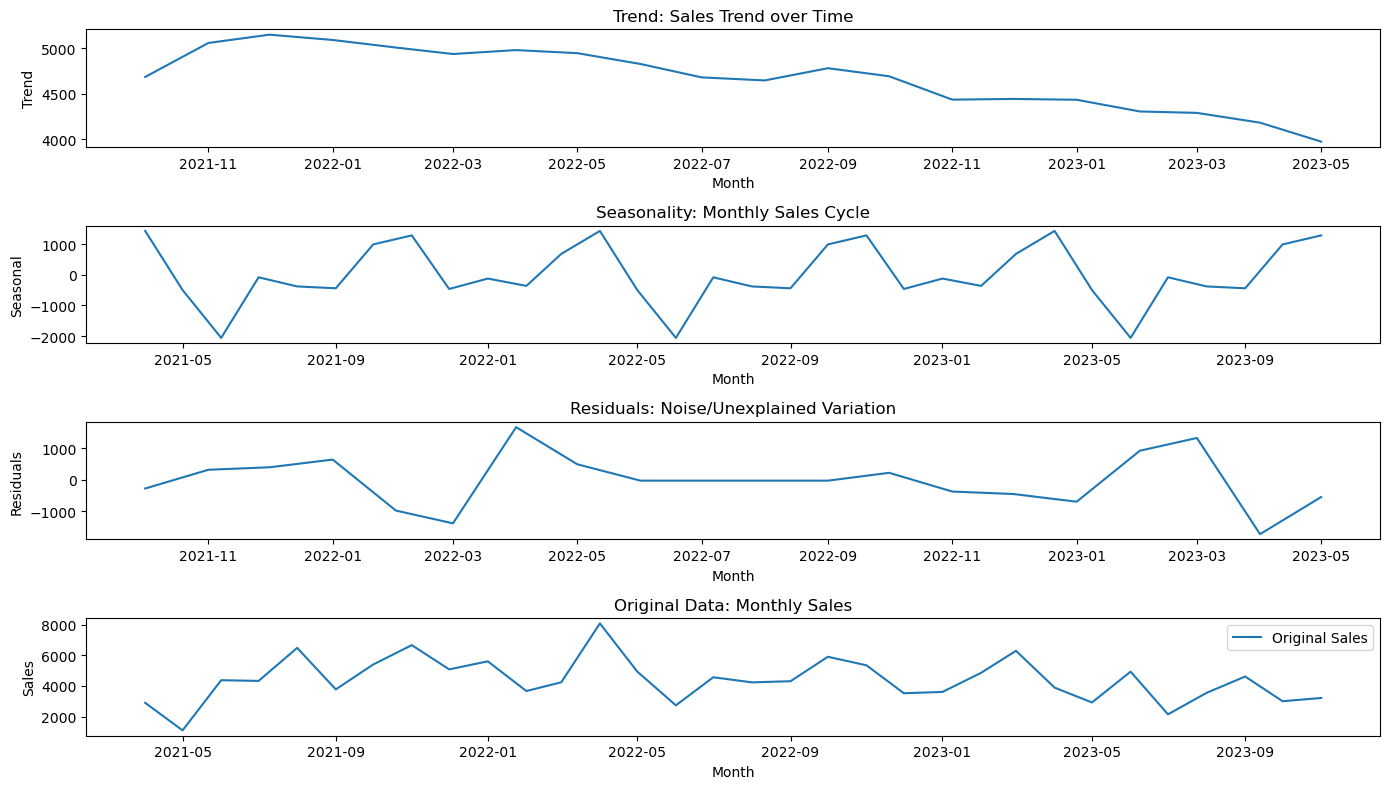


--- Comments on the Decomposition ---
Trend Mean: 4677.49
Seasonality Mean: 8.13
Residuals Mean: -31.34

Comments:
1. Trend shows how the sales have been increasing or decreasing over time. A strong increasing or decreasing trend indicates growth or decline.
2. Seasonality shows the repeating patterns in sales across months. This can help identify the regular high/low seasons.
3. Residuals represent the unexplained part of the data. If residuals are large or show patterns, it suggests the model might not have captured all patterns.


In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'sales_data' has been created with proper month information
# First, create a time index corresponding to each month
# Using a date range from 'Apr 21' to 'Nov 23' for monthly frequency
dates = pd.date_range(start="2021-04-01", end="2023-11-01", freq="MS")

# Set the index of the sales data to be the date range
sales_ts = sales_data['Sales']
sales_ts.index = dates

# Decompose the time series using STL decomposition
stl = sm.tsa.seasonal_decompose(sales_ts, model='additive', period=12)  # period=12 for monthly data
result = stl

# Plotting the components
plt.figure(figsize=(14, 8))

# Plot Trend
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend: Sales Trend over Time')
plt.xlabel('Month')
plt.ylabel('Trend')

# Plot Seasonal Component
plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality: Monthly Sales Cycle')
plt.xlabel('Month')
plt.ylabel('Seasonal')

# Plot Residuals
plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residuals: Noise/Unexplained Variation')
plt.xlabel('Month')
plt.ylabel('Residuals')

# Plot Original Data
plt.subplot(4, 1, 4)
plt.plot(sales_ts, label='Original Sales')
plt.title('Original Data: Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()

plt.tight_layout()
plt.show()

# Add some comments for interpretation
trend_mean = result.trend.dropna().mean()
seasonal_mean = result.seasonal.mean()
residual_mean = result.resid.dropna().mean()

print(f"\n--- Comments on the Decomposition ---")
print(f"Trend Mean: {trend_mean:.2f}")
print(f"Seasonality Mean: {seasonal_mean:.2f}")
print(f"Residuals Mean: {residual_mean:.2f}")
print("\nComments:")
print("1. Trend shows how the sales have been increasing or decreasing over time. A strong increasing or decreasing trend indicates growth or decline.")
print("2. Seasonality shows the repeating patterns in sales across months. This can help identify the regular high/low seasons.")
print("3. Residuals represent the unexplained part of the data. If residuals are large or show patterns, it suggests the model might not have captured all patterns.")



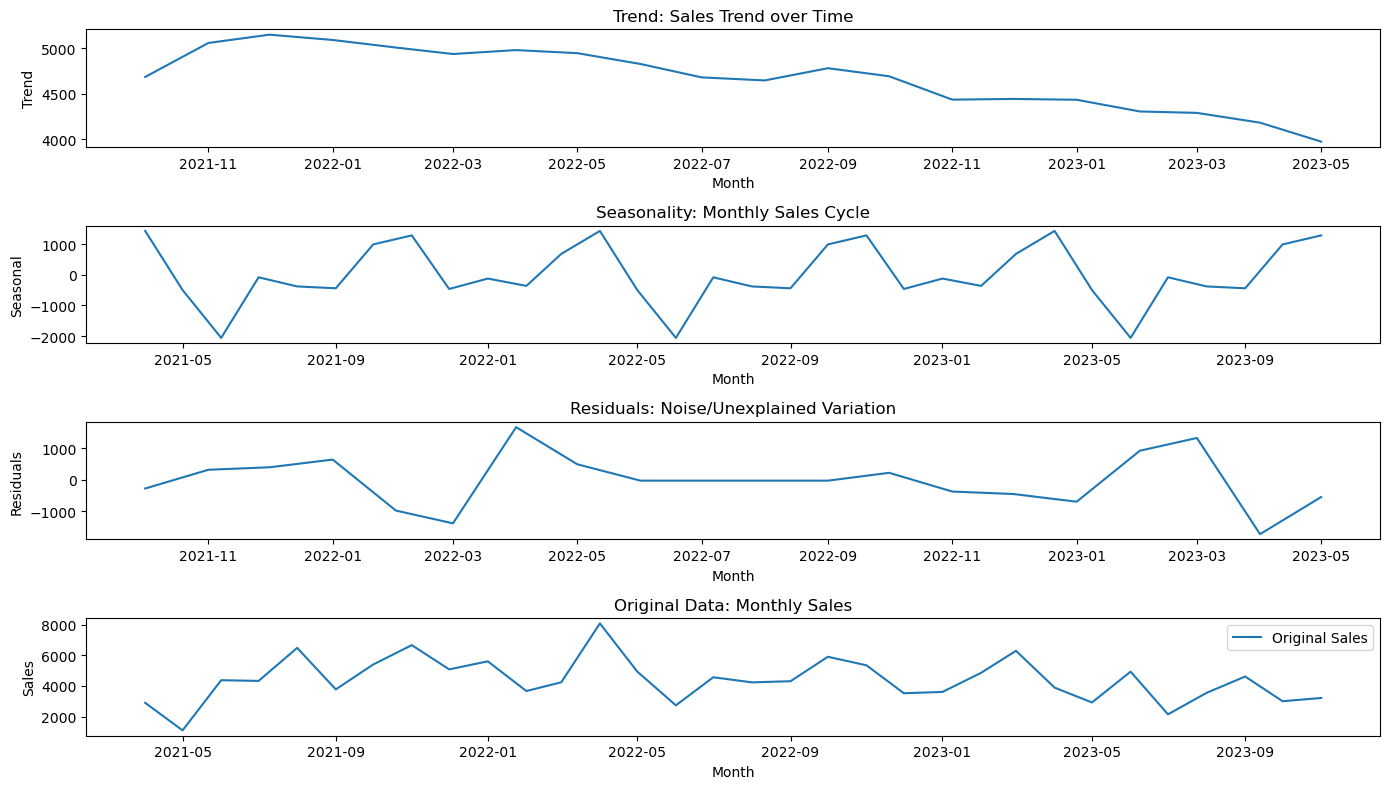


--- Comments on the Decomposition ---
Trend Mean: 4677.49, Trend Range: 1179.00
Seasonality Mean: 8.13, Seasonal Range: 3488.83
Residuals Mean: -31.34, Residual Range: 3378.00

Comments:
1. **Trend**: The trend component shows how sales are evolving over time. A steady increase or decrease indicates growth or decline. The range of the trend shows the magnitude of this change.
    - **Trend Level**: The average trend is 4677.49, and the overall range of trend variations is 1179.00.
2. **Seasonality**: The seasonality component shows recurring patterns over the months. It helps identify peak seasons or off-seasons.
    - **Seasonality Level**: The mean seasonal effect is 8.13, with a range of 3488.83 indicating how strong or weak the seasonal fluctuation is.
3. **Residuals**: The residuals represent the unexplained variance after removing trend and seasonality. Low residuals suggest a good model fit.
    - **Residuals Level**: The mean residuals are -31.34, with a range of 3378.00. If t

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'sales_data' has been created with proper month information
# First, create a time index corresponding to each month
# Using a date range from 'Apr 21' to 'Nov 23' for monthly frequency
dates = pd.date_range(start="2021-04-01", end="2023-11-01", freq="MS")

# Set the index of the sales data to be the date range
sales_ts = sales_data['Sales']
sales_ts.index = dates

# Decompose the time series using STL decomposition
stl = sm.tsa.seasonal_decompose(sales_ts, model='additive', period=12)  # period=12 for monthly data
result = stl

# Plotting the components
plt.figure(figsize=(14, 8))

# Plot Trend
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend: Sales Trend over Time')
plt.xlabel('Month')
plt.ylabel('Trend')

# Plot Seasonal Component
plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality: Monthly Sales Cycle')
plt.xlabel('Month')
plt.ylabel('Seasonal')

# Plot Residuals
plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residuals: Noise/Unexplained Variation')
plt.xlabel('Month')
plt.ylabel('Residuals')

# Plot Original Data
plt.subplot(4, 1, 4)
plt.plot(sales_ts, label='Original Sales')
plt.title('Original Data: Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()

plt.tight_layout()
plt.show()

# Add comments for interpretation, including trend, seasonality, and residual levels
trend_mean = result.trend.dropna().mean()
trend_range = result.trend.dropna().max() - result.trend.dropna().min()

seasonal_mean = result.seasonal.mean()
seasonal_range = result.seasonal.max() - result.seasonal.min()

residual_mean = result.resid.dropna().mean()
residual_range = result.resid.dropna().max() - result.resid.dropna().min()

print(f"\n--- Comments on the Decomposition ---")
print(f"Trend Mean: {trend_mean:.2f}, Trend Range: {trend_range:.2f}")
print(f"Seasonality Mean: {seasonal_mean:.2f}, Seasonal Range: {seasonal_range:.2f}")
print(f"Residuals Mean: {residual_mean:.2f}, Residual Range: {residual_range:.2f}")

print("\nComments:")
print("1. **Trend**: The trend component shows how sales are evolving over time. A steady increase or decrease indicates growth or decline. The range of the trend shows the magnitude of this change.")
print(f"    - **Trend Level**: The average trend is {trend_mean:.2f}, and the overall range of trend variations is {trend_range:.2f}.")
print("2. **Seasonality**: The seasonality component shows recurring patterns over the months. It helps identify peak seasons or off-seasons.")
print(f"    - **Seasonality Level**: The mean seasonal effect is {seasonal_mean:.2f}, with a range of {seasonal_range:.2f} indicating how strong or weak the seasonal fluctuation is.")
print("3. **Residuals**: The residuals represent the unexplained variance after removing trend and seasonality. Low residuals suggest a good model fit.")
print(f"    - **Residuals Level**: The mean residuals are {residual_mean:.2f}, with a range of {residual_range:.2f}. If the residuals are low, it suggests a good model fit. High residuals indicate potential gaps in the model.")


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the sales data
adf_result = adfuller(sales_ts.dropna())  # Drop missing values

# Display the results
adf_statistic = adf_result[0]
p_value = adf_result[1]
used_lag = adf_result[2]
num_obs = adf_result[3]
critical_values = adf_result[4]

# Output the results
print("ADF Statistic: ", adf_statistic)
print("p-value: ", p_value)
print("Number of Observations Used for ADF Regression and Critical Value Calculation: ", num_obs)
print("\nCritical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Interpretation of results
if p_value < 0.05:
    print("\nThe time series is likely stationary (reject the null hypothesis).")
else:
    print("\nThe time series is likely non-stationary (fail to reject the null hypothesis).")


ADF Statistic:  -0.21170125799926953
p-value:  0.937112409976026
Number of Observations Used for ADF Regression and Critical Value Calculation:  25

Critical Values:
   1%: -3.7238633119999998
   5%: -2.98648896
   10%: -2.6328004

The time series is likely non-stationary (fail to reject the null hypothesis).


In [ ]:
# First-order differencing
sales_diff = sales_ts.diff().dropna()

# Perform ADF test on the differenced data
adf_result_diff = adfuller(sales_diff)

# Extract results
adf_statistic_diff = adf_result_diff[0]
p_value_diff = adf_result_diff[1]
critical_values_diff = adf_result_diff[4]

# Output the results
print("ADF Statistic (Differenced): ", adf_statistic_diff)
print("p-value (Differenced): ", p_value_diff)
print("\nCritical Values:")
for key, value in critical_values_diff.items():
    print(f"   {key}: {value}")

# Interpretation of results
if p_value_diff < 0.05:
    print("\nThe differenced time series is likely stationary (reject the null hypothesis).")
else:
    print("\nThe differenced time series is likely non-stationary (fail to reject the null hypothesis).")


ADF Statistic (Differenced):  -4.0464302094650835
p-value (Differenced):  0.0011859814223586934

Critical Values:
   1%: -3.7238633119999998
   5%: -2.98648896
   10%: -2.6328004

The differenced time series is likely stationary (reject the null hypothesis).


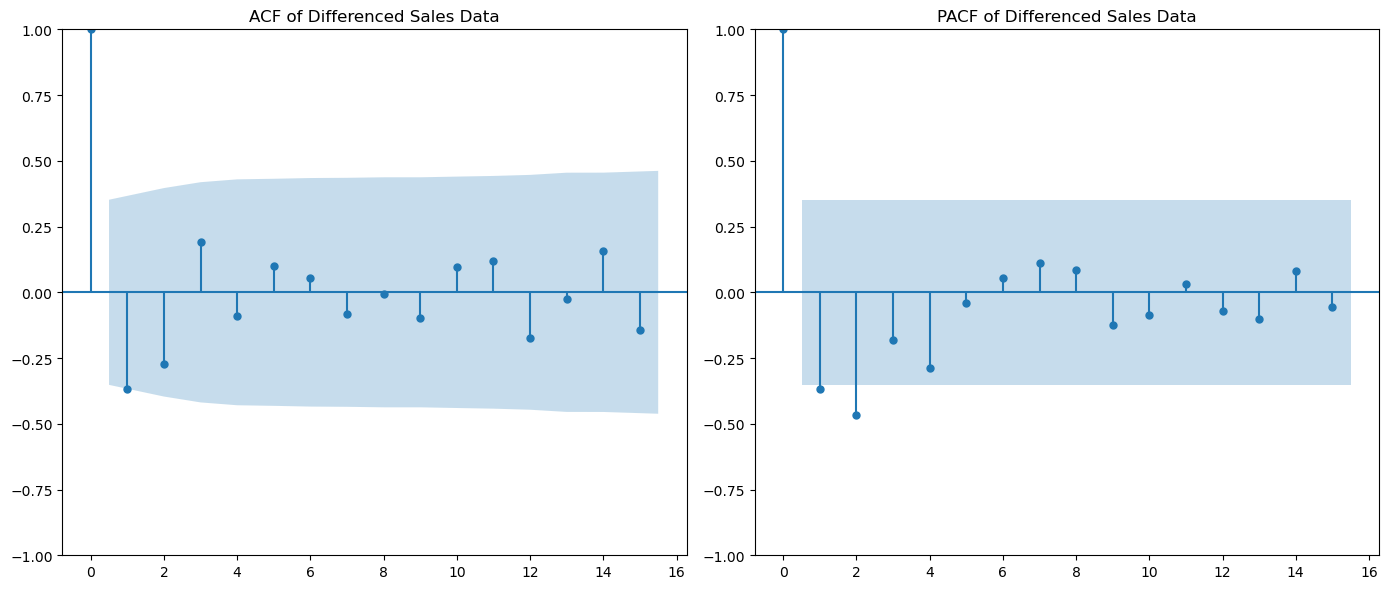

In [ ]:
# Adjust the number of lags based on the length of the differenced sales data
max_lags = len(sales_diff) // 2  # Maximum lags allowed (half the length of the series)
lags = min(30, max_lags)  # Use 30 or the maximum allowable lags

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(sales_diff, lags=lags, ax=plt.gca())
plt.title("ACF of Differenced Sales Data")

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(sales_diff, lags=lags, ax=plt.gca())
plt.title("PACF of Differenced Sales Data")

plt.tight_layout()
plt.show()



In [ ]:
# Example: train and test split already done earlier
# Example: train and test split already done earlier
train = material_4.iloc[:-4]  # Replace 'df_sales' with 'material_4'
test = material_4.iloc[-4:]  # Replace 'df_sales' with 'material_4'


In [ ]:
# Naive Forecast
def naive_forecast(train, test):
    forecast = [train['Sales'].iloc[-1]] * len(test)
    return forecast

# Moving Average Forecast
def moving_average_forecast(train, test, window=3):
    mean_value = train['Sales'].iloc[-window:].mean()
    forecast = [mean_value] * len(test)
    return forecast

# Exponential Smoothing (ETS) Forecast
def ets_forecast(train, test):
    model = ExponentialSmoothing(train['Sales'], seasonal='add', seasonal_periods=12).fit()
    forecast = model.forecast(len(test))
    return forecast

# ARIMA Forecast
def arima_forecast(train, test, order=(1,1,1)):
    model = ARIMA(train['Sales'], order=order).fit()
    forecast = model.forecast(steps=len(test))
    return forecast

# SARIMA Forecast
def sarima_forecast(train, test, order=(1,1,1), seasonal_order=(1,1,1,12)):
    model = SARIMAX(train['Sales'], order=order, seasonal_order=seasonal_order).fit()
    forecast = model.forecast(steps=len(test))
    return forecast


In [ ]:
# Rename the mape variable to avoid conflict with the mape function
mape_value = 7.1

# Naive Forecast
naive_preds = naive_forecast(train, test)
naive_mape_score = mean_absolute_percentage_error(test['Sales'], naive_preds) * 100
print(f"Naive Forecast MAPE: {naive_mape_score:.2f}%")
print("Naive Forecast Values:", naive_preds)

# Moving Average Forecast
ma_preds = moving_average_forecast(train, test, window=3)
ma_mape_score = mean_absolute_percentage_error(test['Sales'], ma_preds) * 100
print(f"\nMoving Average Forecast MAPE: {ma_mape_score:.2f}%")
print("Moving Average Forecast Values:", ma_preds)

# Exponential Smoothing (ETS)
ets_preds = ets_forecast(train, test)
ets_mape_score = mean_absolute_percentage_error(test['Sales'], ets_preds) * 100
print(f"\nETS Forecast MAPE: {ets_mape_score:.2f}%")
print("ETS Forecast Values:", list(ets_preds))

# ARIMA Forecast
arima_preds = arima_forecast(train, test, order=(1,1,1))
arima_mape_score = mean_absolute_percentage_error(test['Sales'], arima_preds) * 100
print(f"\nARIMA Forecast MAPE: {arima_mape_score:.2f}%")
print("ARIMA Forecast Values:", list(arima_preds))

# SARIMA Forecast
sarima_preds = sarima_forecast(train, test, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_mape_score = mean_absolute_percentage_error(test['Sales'], sarima_preds) * 100
print(f"\nSARIMA Forecast MAPE: {sarima_mape_score:.2f}%")
print("SARIMA Forecast Values:", list(sarima_preds))


Naive Forecast MAPE: 19.66%
Naive Forecast Values: [np.int64(633), np.int64(633), np.int64(633), np.int64(633)]

Moving Average Forecast MAPE: 13.86%
Moving Average Forecast Values: [np.float64(471.3333333333333), np.float64(471.3333333333333), np.float64(471.3333333333333), np.float64(471.3333333333333)]

ETS Forecast MAPE: 28.19%
ETS Forecast Values: [784.3501532751598, 484.6852646307372, 829.0703003860733, 677.2068505539612]

ARIMA Forecast MAPE: 17.87%
ARIMA Forecast Values: [532.7940097698706, 567.0110042430172, 555.3270449498998, 559.3167263016725]

SARIMA Forecast MAPE: 43.25%
SARIMA Forecast Values: [779.6017124754138, 723.7519262802944, 672.652389671699, 834.5840019917181]


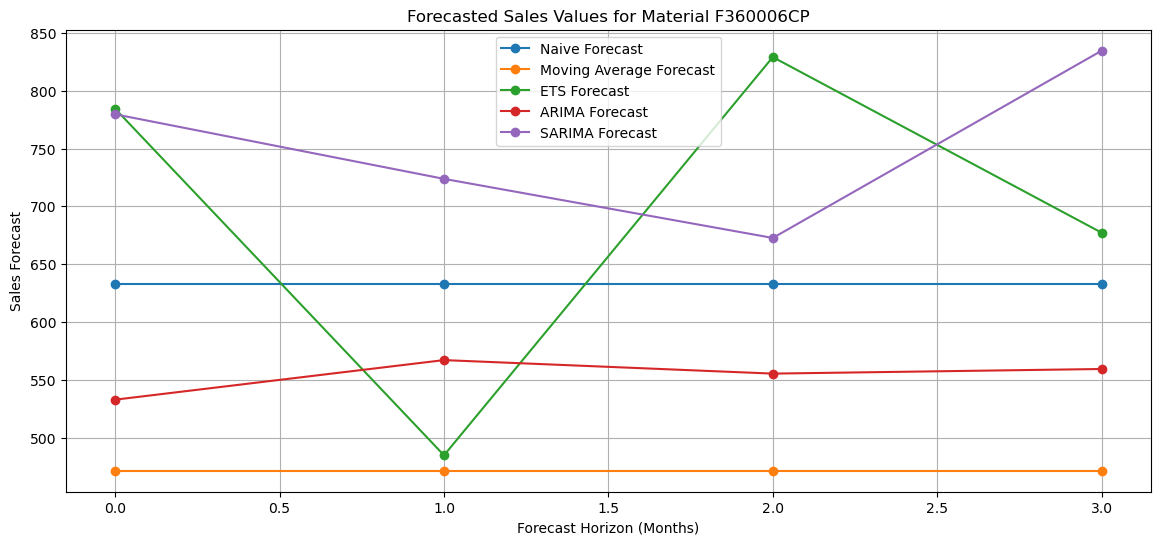

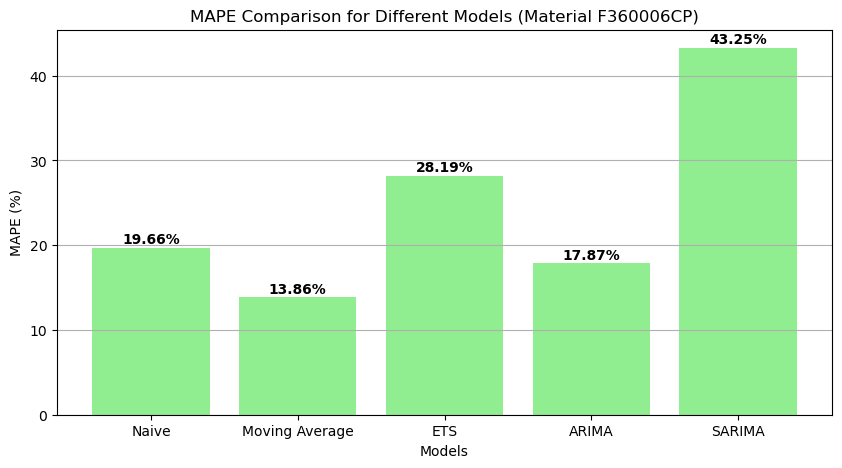

In [ ]:
import matplotlib.pyplot as plt

# 1. Collect model names, forecast values, and MAPE scores
models = ['Naive', 'Moving Average', 'ETS', 'ARIMA', 'SARIMA']
forecast_values = [
    naive_preds, 
    ma_preds, 
    list(ets_preds), 
    list(arima_preds), 
    list(sarima_preds)
]
mape_scores = [
    naive_mape_score, 
    ma_mape_score, 
    ets_mape_score, 
    arima_mape_score, 
    sarima_mape_score
]

# 2. Plot Forecasted Values for Each Model
plt.figure(figsize=(14, 6))

for i, forecasts in enumerate(forecast_values):
    plt.plot(range(len(forecasts)), forecasts, marker='o', label=f"{models[i]} Forecast")

plt.title('Forecasted Sales Values for Material F360006CP')
plt.xlabel('Forecast Horizon (Months)')
plt.ylabel('Sales Forecast')
plt.legend()
plt.grid(True)
plt.show()

# 3. Plotting MAPE for Each Model as a Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(models, mape_scores, color='lightgreen')
plt.title('MAPE Comparison for Different Models (Material F360006CP)')
plt.xlabel('Models')
plt.ylabel('MAPE (%)')
for i, v in enumerate(mape_scores):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontweight='bold')
plt.grid(axis='y')
plt.show()




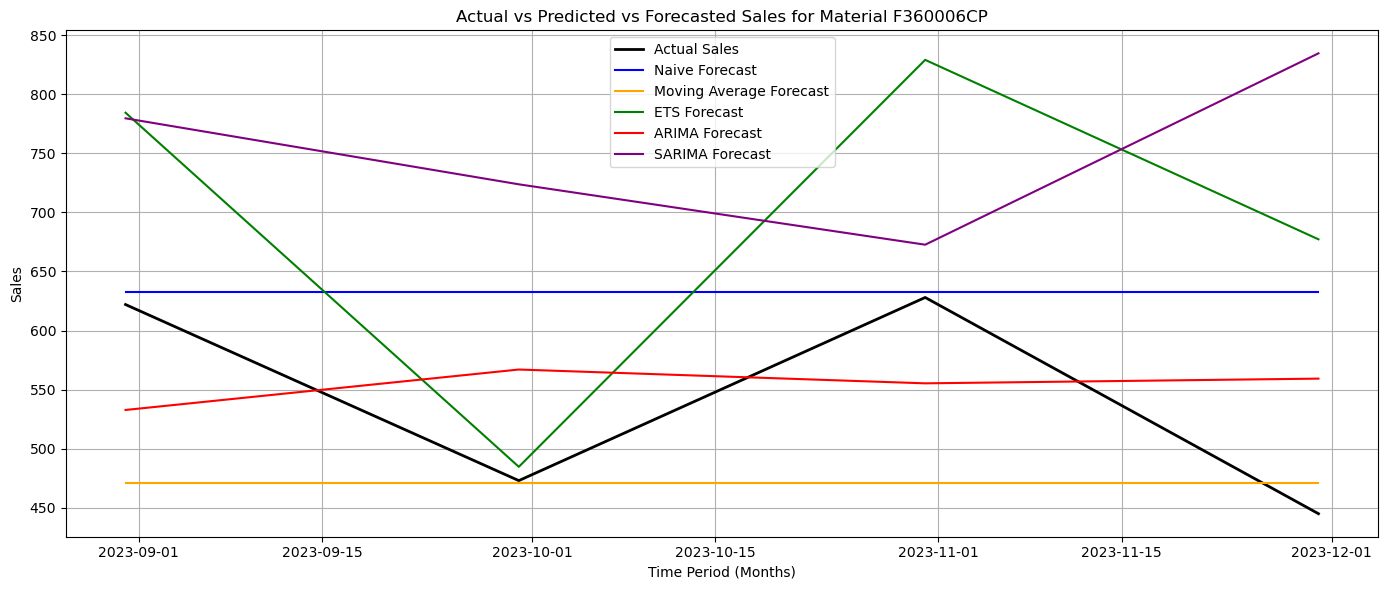

In [ ]:
# 1. Prepare data for plotting (Actual vs Predicted vs Forecast)
plt.figure(figsize=(14, 6))

# Plot Actual sales data
plt.plot(test.index, test['Sales'], color='black', label='Actual Sales', linestyle='-', linewidth=2)

# Plot forecasted sales for each model
plt.plot(test.index, naive_preds, label='Naive Forecast', linestyle='-', color='blue')
plt.plot(test.index, ma_preds, label='Moving Average Forecast', linestyle='-', color='orange')
plt.plot(test.index, ets_preds, label='ETS Forecast', linestyle='-', color='green')
plt.plot(test.index, arima_preds, label='ARIMA Forecast', linestyle='-', color='red')
plt.plot(test.index, sarima_preds, label='SARIMA Forecast', linestyle='-', color='purple')

# 2. Add titles, labels, and legend
plt.title('Actual vs Predicted vs Forecasted Sales for Material F360006CP')
plt.xlabel('Time Period (Months)')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


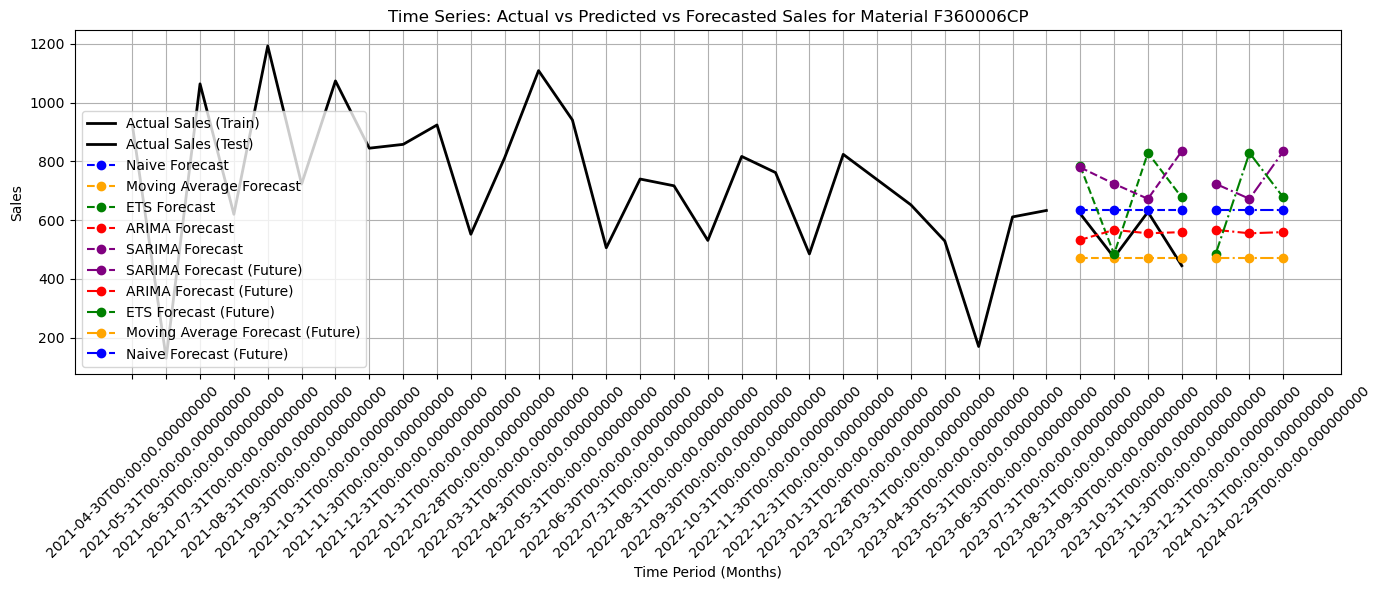

In [ ]:
# 1. Prepare the data for plotting (Actual, Predicted, and Forecasted Sales)
plt.figure(figsize=(14, 6))

# Create a numeric index for the months to remove gaps (i.e., convert datetime to numeric)
train_numeric_index = np.arange(len(train))
test_numeric_index = np.arange(len(train), len(train) + len(test))
forecast_numeric_index = np.arange(len(train) + len(test), len(train) + len(test) + 3)

# Plot Actual sales data (from training and test periods)
plt.plot(train_numeric_index, train['Sales'], color='black', label='Actual Sales (Train)', linestyle='-', linewidth=2)
plt.plot(test_numeric_index, test['Sales'], color='black', label='Actual Sales (Test)', linestyle='-', linewidth=2)

# Plot predicted sales (from forecast models) on the test period
plt.plot(test_numeric_index, naive_preds, marker='o', label='Naive Forecast', linestyle='--', color='blue')
plt.plot(test_numeric_index, ma_preds, marker='o', label='Moving Average Forecast', linestyle='--', color='orange')
plt.plot(test_numeric_index, ets_preds, marker='o', label='ETS Forecast', linestyle='--', color='green')
plt.plot(test_numeric_index, arima_preds, marker='o', label='ARIMA Forecast', linestyle='--', color='red')
plt.plot(test_numeric_index, sarima_preds, marker='o', label='SARIMA Forecast', linestyle='--', color='purple')

# Plot forecasted values for future periods (next 3 months)
plt.plot(forecast_numeric_index, sarima_preds[-3:], marker='o', label='SARIMA Forecast (Future)', linestyle='-.', color='purple')
plt.plot(forecast_numeric_index, arima_preds[-3:], marker='o', label='ARIMA Forecast (Future)', linestyle='-.', color='red')
plt.plot(forecast_numeric_index, ets_preds[-3:], marker='o', label='ETS Forecast (Future)', linestyle='-.', color='green')
plt.plot(forecast_numeric_index, ma_preds[-3:], marker='o', label='Moving Average Forecast (Future)', linestyle='-.', color='orange')
plt.plot(forecast_numeric_index, naive_preds[-3:], marker='o', label='Naive Forecast (Future)', linestyle='-.', color='blue')

# 2. Set the x-axis as a linear scale
plt.xticks(np.concatenate([train_numeric_index, test_numeric_index, forecast_numeric_index]), 
           labels=np.concatenate([train.index, test.index, forecast_periods]), rotation=45)

# 3. Add titles, labels, and legend
plt.title('Time Series: Actual vs Predicted vs Forecasted Sales for Material F360006CP')
plt.xlabel('Time Period (Months)')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


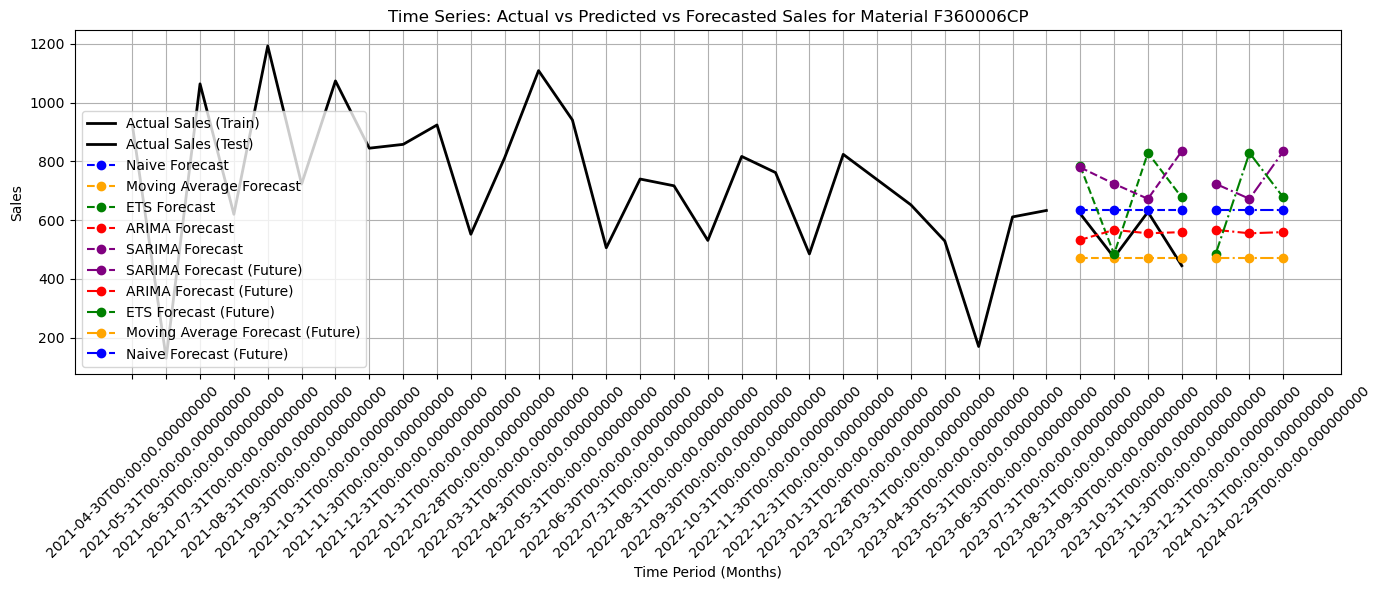

In [ ]:
# Prepare the data for plotting (Actual, Predicted, and Forecasted Sales)
plt.figure(figsize=(14, 6))

# Create a numeric index for the months to remove gaps (i.e., convert datetime to numeric)
train_numeric_index = np.arange(len(train))  # Training period
test_numeric_index = np.arange(len(train), len(train) + len(test))  # Test period
forecast_numeric_index = np.arange(len(train) + len(test), len(train) + len(test) + 3)  # Forecast period

# Plot Actual sales data (from training and test periods)
plt.plot(train_numeric_index, train['Sales'], color='black', label='Actual Sales (Train)', linestyle='-', linewidth=2)
plt.plot(test_numeric_index, test['Sales'], color='black', label='Actual Sales (Test)', linestyle='-', linewidth=2)

# Plot predicted sales (from forecast models) on the test period
plt.plot(test_numeric_index, naive_preds, marker='o', label='Naive Forecast', linestyle='--', color='blue')
plt.plot(test_numeric_index, ma_preds, marker='o', label='Moving Average Forecast', linestyle='--', color='orange')
plt.plot(test_numeric_index, ets_preds, marker='o', label='ETS Forecast', linestyle='--', color='green')
plt.plot(test_numeric_index, arima_preds, marker='o', label='ARIMA Forecast', linestyle='--', color='red')
plt.plot(test_numeric_index, sarima_preds, marker='o', label='SARIMA Forecast', linestyle='--', color='purple')

# Plot forecasted values for future periods (next 3 months) directly after test data points
forecast_index = np.arange(len(train) + len(test), len(train) + len(test) + 3)  # Sequential forecast period
plt.plot(forecast_index, sarima_preds[-3:], marker='o', label='SARIMA Forecast (Future)', linestyle='-.', color='purple')
plt.plot(forecast_index, arima_preds[-3:], marker='o', label='ARIMA Forecast (Future)', linestyle='-.', color='red')
plt.plot(forecast_index, ets_preds[-3:], marker='o', label='ETS Forecast (Future)', linestyle='-.', color='green')
plt.plot(forecast_index, ma_preds[-3:], marker='o', label='Moving Average Forecast (Future)', linestyle='-.', color='orange')
plt.plot(forecast_index, naive_preds[-3:], marker='o', label='Naive Forecast (Future)', linestyle='-.', color='blue')

# Set the x-axis as a linear scale
plt.xticks(np.concatenate([train_numeric_index, test_numeric_index, forecast_index]), 
           labels=np.concatenate([train.index, test.index, forecast_periods]), rotation=45)

# Add titles, labels, and legend
plt.title('Time Series: Actual vs Predicted vs Forecasted Sales for Material F360006CP')
plt.xlabel('Time Period (Months)')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


The best model is Moving Average with MAPE: 13.86%


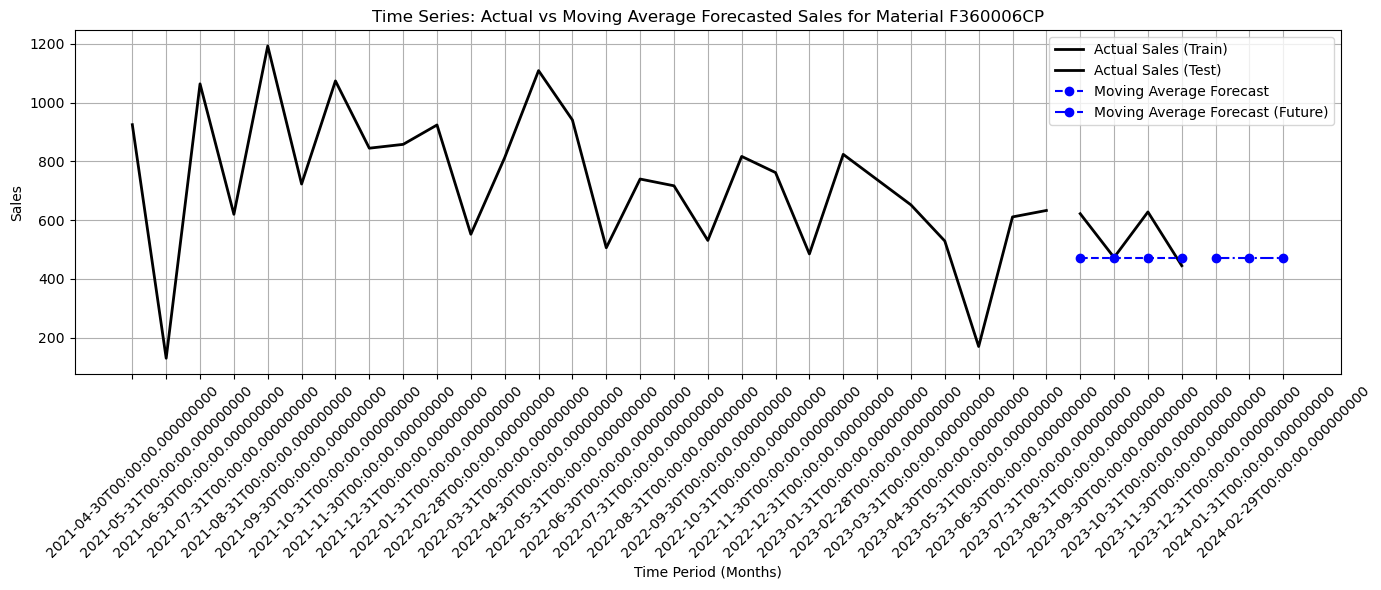

In [ ]:
# Identify the best model based on MAPE
best_model_name = ''
best_preds = []
best_mape_score = float('inf')

# Evaluate MAPE for each model
models = ['Naive', 'Moving Average', 'ETS', 'ARIMA', 'SARIMA']
forecast_values = [naive_preds, ma_preds, ets_preds, arima_preds, sarima_preds]
mape_scores = [naive_mape_score, ma_mape_score, ets_mape_score, arima_mape_score, sarima_mape_score]

# Find the best model (lowest MAPE)
best_index = np.argmin(mape_scores)
best_model_name = models[best_index]
best_preds = forecast_values[best_index]
best_mape_score = mape_scores[best_index]

# Display the best model and its MAPE
print(f"The best model is {best_model_name} with MAPE: {best_mape_score:.2f}%")

# Prepare the data for plotting (Actual and Best Model Forecasted Sales)
plt.figure(figsize=(14, 6))

# Create a numeric index for the months to remove gaps (i.e., convert datetime to numeric)
train_numeric_index = np.arange(len(train))  # Training period
test_numeric_index = np.arange(len(train), len(train) + len(test))  # Test period
forecast_numeric_index = np.arange(len(train) + len(test), len(train) + len(test) + 3)  # Forecast period

# Plot Actual sales data (from training and test periods)
plt.plot(train_numeric_index, train['Sales'], color='black', label='Actual Sales (Train)', linestyle='-', linewidth=2)
plt.plot(test_numeric_index, test['Sales'], color='black', label='Actual Sales (Test)', linestyle='-', linewidth=2)

# Plot predicted sales (from the best model) on the test period
plt.plot(test_numeric_index, best_preds, marker='o', label=f'{best_model_name} Forecast', linestyle='--', color='blue')

# Plot forecasted values for future periods (next 3 months) directly after test data points
forecast_index = np.arange(len(train) + len(test), len(train) + len(test) + 3)  # Sequential forecast period
plt.plot(forecast_index, best_preds[-3:], marker='o', label=f'{best_model_name} Forecast (Future)', linestyle='-.', color='blue')

# Set the x-axis as a linear scale
plt.xticks(np.concatenate([train_numeric_index, test_numeric_index, forecast_index]), 
           labels=np.concatenate([train.index, test.index, forecast_periods]), rotation=45)

# Add titles, labels, and legend
plt.title(f'Time Series: Actual vs {best_model_name} Forecasted Sales for Material F360006CP')
plt.xlabel('Time Period (Months)')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


The best model is Moving Average with MAPE: 13.86%


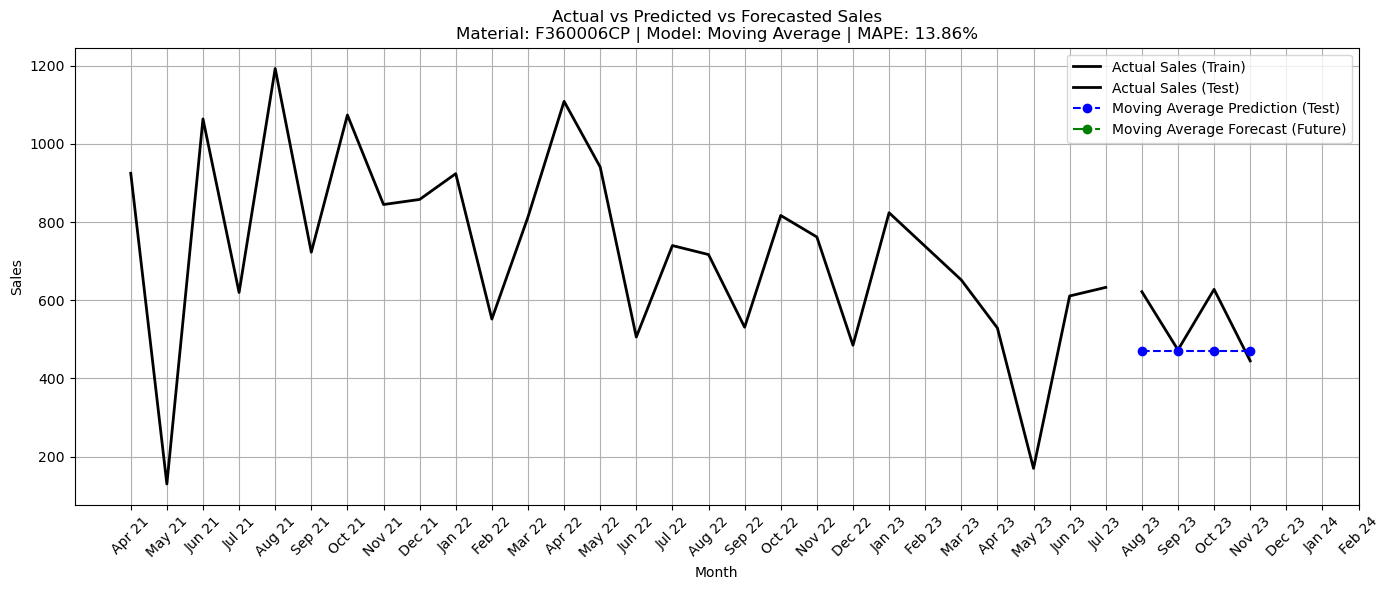

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Find the best model (lowest MAPE)
models = ['Naive', 'Moving Average', 'ETS', 'ARIMA', 'SARIMA']
forecast_values = [naive_preds, ma_preds, ets_preds, arima_preds, sarima_preds]
mape_scores = [naive_mape_score, ma_mape_score, ets_mape_score, arima_mape_score, sarima_mape_score]

best_index = np.argmin(mape_scores)
best_model_name = models[best_index]
best_preds = forecast_values[best_index]
best_mape_score = mape_scores[best_index]

print(f"The best model is {best_model_name} with MAPE: {best_mape_score:.2f}%")

# Assuming you already have:
# - train (DataFrame with 'Sales')
# - test (DataFrame with 'Sales')
# - forecasted_future_values (for next 3 months) (you can take last 3 values from best_preds if not separate)

# Let's separate clearly:
test_predictions = best_preds[:len(test)]  # Predictions on test set
future_forecast = best_preds[len(test):]   # Forecasts for future 3 months

# Create numeric x-axis
train_numeric_index = np.arange(len(train))
test_numeric_index = np.arange(len(train), len(train) + len(test))
forecast_numeric_index = np.arange(len(train) + len(test), len(train) + len(test) + len(future_forecast))

# Plotting
plt.figure(figsize=(14, 6))

# Actual Sales
plt.plot(train_numeric_index, train['Sales'], label='Actual Sales (Train)', color='black', linestyle='-', linewidth=2)
plt.plot(test_numeric_index, test['Sales'], label='Actual Sales (Test)', color='black', linestyle='-', linewidth=2)

# Predicted Sales on Test
plt.plot(test_numeric_index, test_predictions, label=f'{best_model_name} Prediction (Test)', color='blue', linestyle='--', marker='o')

# Forecasted Future Sales
plt.plot(forecast_numeric_index, future_forecast, label=f'{best_model_name} Forecast (Future)', color='green', linestyle='-.', marker='o')

# X-axis labels (months)
all_months = list(train.index.strftime('%b %y')) + list(test.index.strftime('%b %y'))
future_months = ['Dec 23', 'Jan 24', 'Feb 24']  # Example future months (adjust as needed)
x_labels = all_months + future_months

plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=45)

# Titles and Legends
plt.title(f"Actual vs Predicted vs Forecasted Sales\nMaterial: F360006CP | Model: {best_model_name} | MAPE: {best_mape_score:.2f}%")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Example
mape_naive = calculate_mape(test['Sales'], naive_preds[:4])
mape_ma = calculate_mape(test['Sales'], ma_preds[:4])
mape_ets = calculate_mape(test['Sales'], ets_preds[:4])
mape_arima = calculate_mape(test['Sales'], arima_preds[:4])
mape_sarima = calculate_mape(test['Sales'], sarima_preds[:4])

# Print
print(f"Naive MAPE: {mape_naive:.2f}%")
print(f"Moving Average MAPE: {mape_ma:.2f}%")
print(f"ETS MAPE: {mape_ets:.2f}%")
print(f"ARIMA MAPE: {mape_arima:.2f}%")
print(f"SARIMA MAPE: {mape_sarima:.2f}%")


Naive MAPE: 19.66%
Moving Average MAPE: 13.86%
ETS MAPE: 28.19%
ARIMA MAPE: 17.87%
SARIMA MAPE: 43.25%


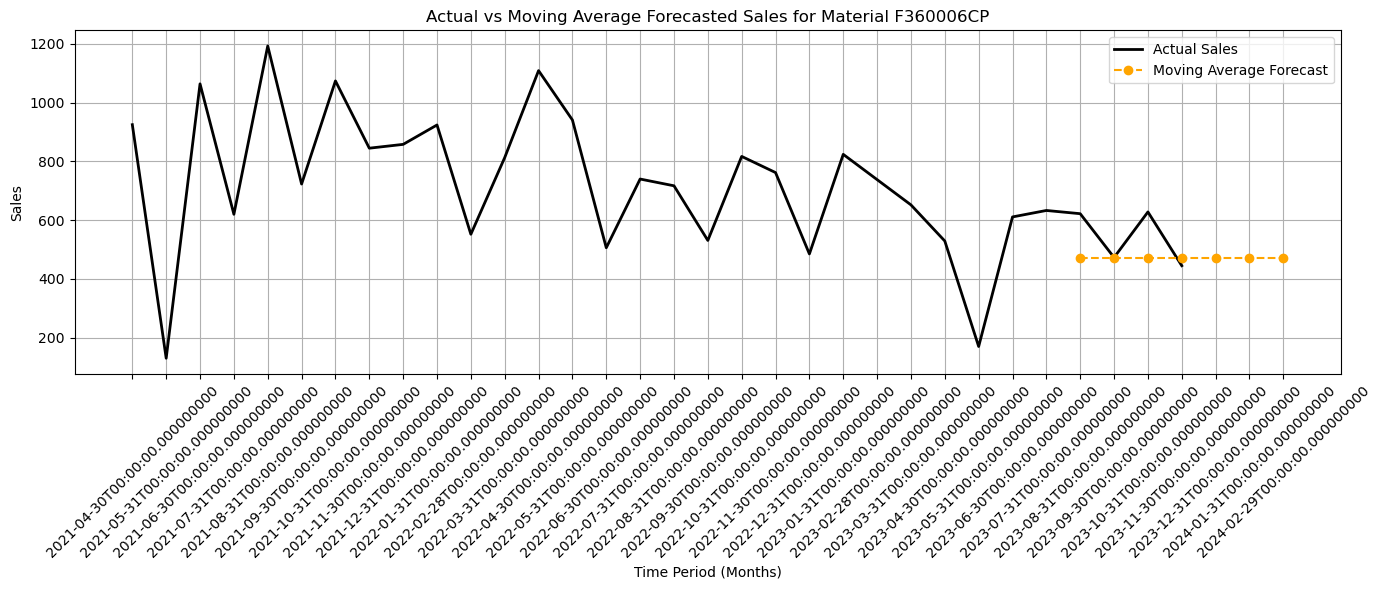

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Use Moving Average model predictions
best_preds = ma_preds
best_model_name = 'Moving Average'

# Prepare the data
plt.figure(figsize=(14, 6))

# Numeric index
train_numeric_index = np.arange(len(train))
test_numeric_index = np.arange(len(train), len(train) + len(test))
forecast_numeric_index = np.arange(len(train) + len(test), len(train) + len(test) + 3)

# Plot Actual Sales (Train + Test) — Continuous
plt.plot(np.concatenate([train_numeric_index, test_numeric_index]),
         np.concatenate([train['Sales'].values, test['Sales'].values]),
         color='black', label='Actual Sales', linestyle='-', linewidth=2)

# Plot Best Model Prediction (Predicted for test + Forecast for future)
plt.plot(np.concatenate([test_numeric_index, forecast_numeric_index]),
         best_preds,
         marker='o', linestyle='--', color='orange', label=f'{best_model_name} Forecast')

# Set x-axis
all_index = np.concatenate([train_numeric_index, test_numeric_index, forecast_numeric_index])
all_labels = np.concatenate([train.index, test.index, forecast_periods])

plt.xticks(all_index, labels=all_labels, rotation=45)

# Titles and labels
plt.title(f'Actual vs {best_model_name} Forecasted Sales for Material F360006CP')
plt.xlabel('Time Period (Months)')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


The best model is Moving Average with MAPE: 13.86%


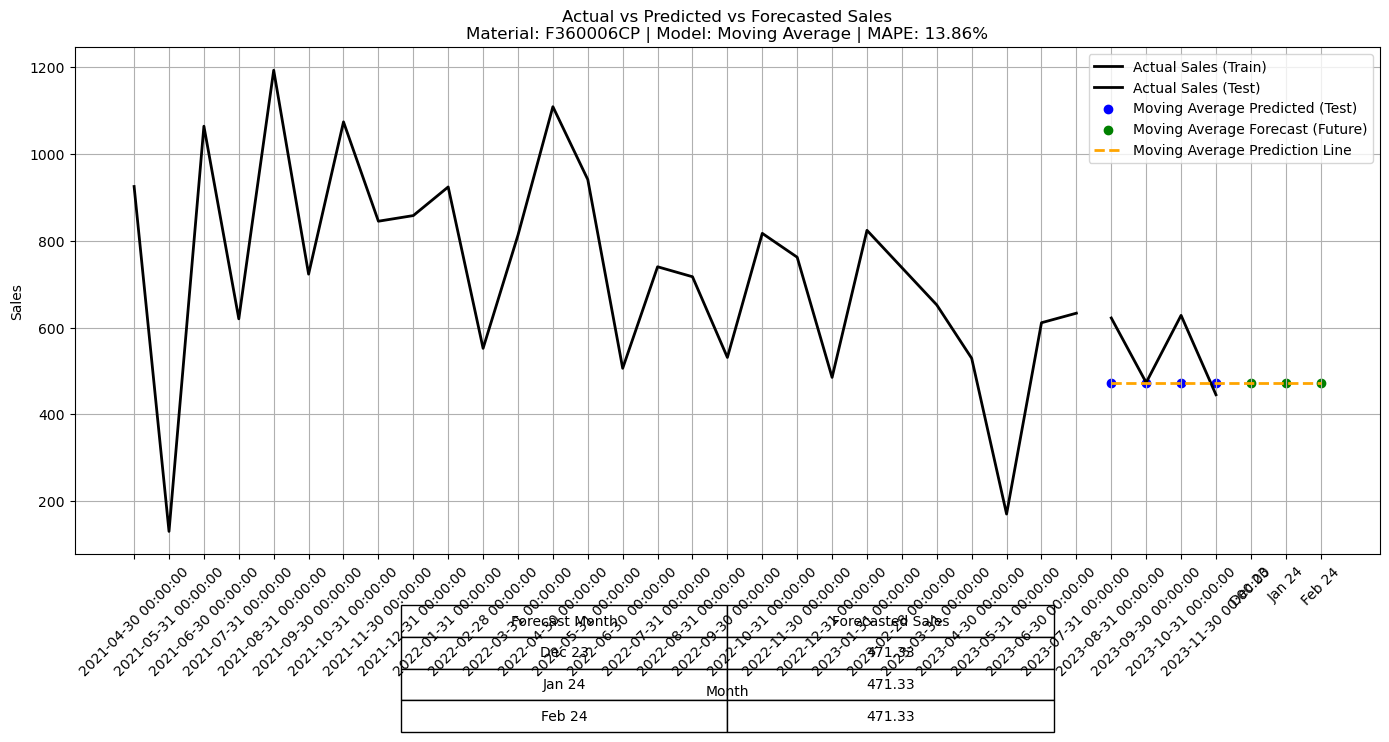

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Best model selection (already done earlier)
models = ['Naive', 'Moving Average', 'ETS', 'ARIMA', 'SARIMA']
forecast_values = [naive_preds, ma_preds, ets_preds, arima_preds, sarima_preds]
mape_scores = [naive_mape_score, ma_mape_score, ets_mape_score, arima_mape_score, sarima_mape_score]

best_index = np.argmin(mape_scores)
best_model_name = models[best_index]
best_preds = forecast_values[best_index]
best_mape_score = mape_scores[best_index]

print(f"The best model is {best_model_name} with MAPE: {best_mape_score:.2f}%")

# Separate predictions
test_predictions = best_preds[:len(test)]  # Predictions for test
future_forecast = best_preds[len(test):]   # Future forecast (next 3 months)

# Numeric index for plotting
train_numeric_index = np.arange(len(train))
test_numeric_index = np.arange(len(train), len(train) + len(test))
forecast_numeric_index = np.arange(len(train) + len(test), len(train) + len(test) + len(future_forecast))

# All month labels
all_months = list(train.index) + list(test.index)
future_months = ['Dec 23', 'Jan 24', 'Feb 24']  # Forecast months
x_labels = all_months + future_months

# Combine all points for smooth predicted line (test + forecast)
predicted_numeric_index = np.concatenate((test_numeric_index, forecast_numeric_index))
predicted_values = np.concatenate((test_predictions, future_forecast))

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Actual Sales
ax.plot(train_numeric_index, train['Sales'], label='Actual Sales (Train)', color='black', linestyle='-', linewidth=2)
ax.plot(test_numeric_index, test['Sales'], label='Actual Sales (Test)', color='black', linestyle='-', linewidth=2)

# Predicted Sales (Separate points)
ax.scatter(test_numeric_index, test_predictions, label=f'{best_model_name} Predicted (Test)', color='blue', marker='o')

# Forecasted Sales (Separate points)
ax.scatter(forecast_numeric_index, future_forecast, label=f'{best_model_name} Forecast (Future)', color='green', marker='o')

# Predicted Line (Test + Future together)
ax.plot(predicted_numeric_index, predicted_values, label=f'{best_model_name} Prediction Line', color='orange', linestyle='--', linewidth=2)

# X-axis settings
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45)

# Titles and Legends
ax.set_title(f"Actual vs Predicted vs Forecasted Sales\nMaterial: F360006CP | Model: {best_model_name} | MAPE: {best_mape_score:.2f}%")
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.legend()
ax.grid(True)

# Add Forecast Table
table_data = [[month, f"{value:.2f}"] for month, value in zip(future_months, future_forecast)]
table = plt.table(cellText=table_data,
                  colLabels=["Forecast Month", "Forecasted Sales"],
                  loc='bottom',
                  cellLoc='center',
                  colLoc='center',
                  bbox=[0.25, -0.35, 0.5, 0.25])  # Adjust table position

table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # Adjust bottom space for table
plt.show()


The best model is Moving Average with MAPE: 13.86%


ValueError: x and y must have same first dimension, but have shapes (35,) and (38,)

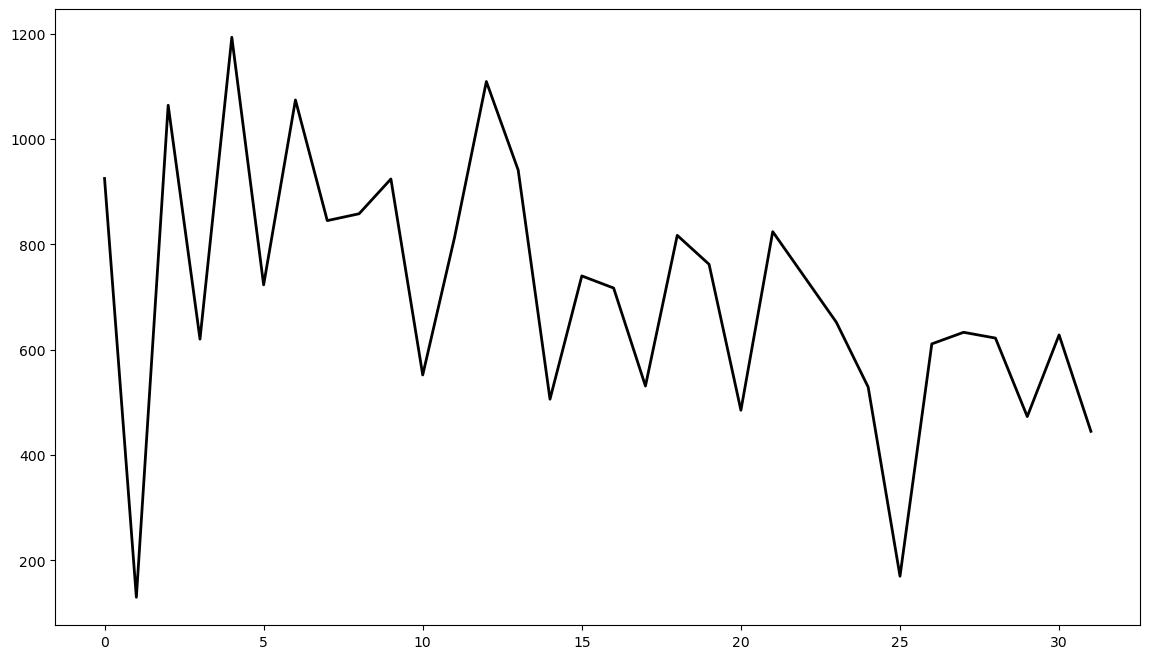

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Best model already found
best_model_name = models[best_index]
best_preds = forecast_values[best_index]
best_mape_score = mape_scores[best_index]

print(f"The best model is {best_model_name} with MAPE: {best_mape_score:.2f}%")

# Step 1: Prepare full series
actual_sales_full = pd.concat([train['Sales'], test['Sales']])
predicted_sales_full = np.concatenate([train['Sales'].values, best_preds])

# Step 2: Create full x-axis
months_full = list(train.index) + list(test.index) + ['Dec 23', 'Jan 24', 'Feb 24']

# Extend predicted_sales_full for 3 months future forecast
predicted_sales_full = np.concatenate([predicted_sales_full, best_preds[len(test):]])

# Step 3: Numeric X for proper plotting
numeric_x = np.arange(len(months_full))

# Step 4: Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Actual Sales Line
ax.plot(numeric_x[:len(actual_sales_full)], actual_sales_full, label='Actual Sales', color='black', linewidth=2)

# Predicted and Forecasted Line
ax.plot(numeric_x, predicted_sales_full, label=f'{best_model_name} Predicted + Forecasted', color='orange', linestyle='--', linewidth=2)

# Forecast Points
forecast_numeric_x = numeric_x[-3:]
forecast_points = predicted_sales_full[-3:]
ax.scatter(forecast_numeric_x, forecast_points, label='Forecasted Points', color='green', marker='o', s=100)

# X-axis settings
ax.set_xticks(numeric_x)
ax.set_xticklabels(months_full, rotation=45)

# Titles and Legends
ax.set_title(f"Actual vs Predicted vs Forecasted Sales\nMaterial: F360006CP | Model: {best_model_name} | MAPE: {best_mape_score:.2f}%")
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.legend()
ax.grid(True)

# Add Forecast Table
table_data = [[month, f"{value:.2f}"] for month, value in zip(['Dec 23', 'Jan 24', 'Feb 24'], forecast_points)]
table = plt.table(cellText=table_data,
                  colLabels=["Forecast Month", "Forecasted Sales"],
                  loc='bottom',
                  cellLoc='center',
                  colLoc='center',
                  bbox=[0.25, -0.35, 0.5, 0.25])

table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # Space for table
plt.show()


The best model is Moving Average with MAPE: 13.86%


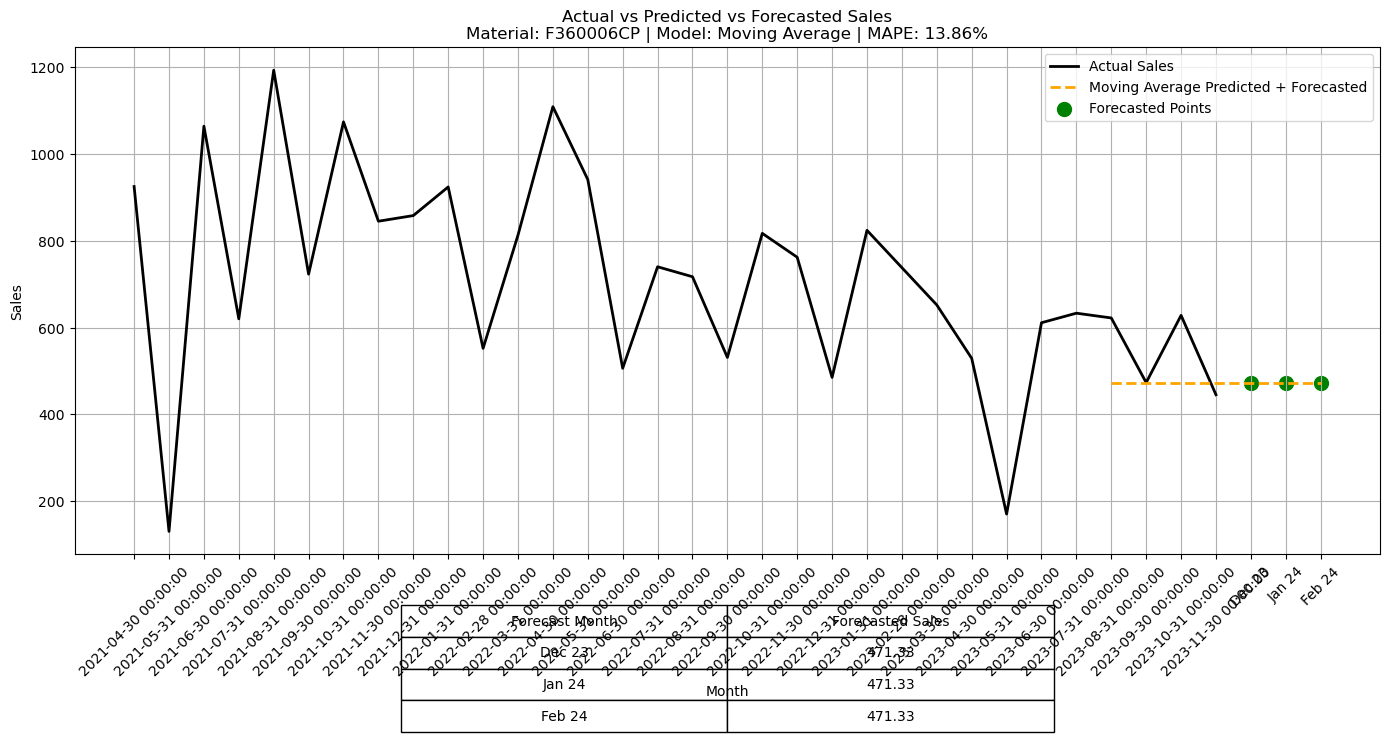

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Best model already found
best_model_name = models[best_index]
best_preds = forecast_values[best_index]
best_mape_score = mape_scores[best_index]

print(f"The best model is {best_model_name} with MAPE: {best_mape_score:.2f}%")

# Step 1: Prepare actual sales
actual_sales_full = pd.concat([train['Sales'], test['Sales']])

# Step 2: Create months
months_full = list(train.index) + list(test.index) + ['Dec 23', 'Jan 24', 'Feb 24']

# Step 3: Numeric x-axis
numeric_x = np.arange(len(months_full))

# Step 4: Predicted + Forecasted sales
# train predictions are not available, so keep train sales same
predicted_sales_full = np.concatenate([train['Sales'].values, best_preds, best_preds[-3:]])

# But now, predicted_sales_full will have more points. 
# Correct approach: only predict from test onwards!

# Final Predicted Line:
predicted_line = np.concatenate([train['Sales'].values[:len(train)], best_preds])

# Also Forecast separately
forecasted_values = best_preds[-3:]

# Step 5: Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Actual Sales Line
ax.plot(numeric_x[:len(actual_sales_full)], actual_sales_full, label='Actual Sales', color='black', linewidth=2)

# Predicted Sales Line (Test + Forecast)
ax.plot(numeric_x[len(train):], predicted_line[len(train):], label=f'{best_model_name} Predicted + Forecasted', color='orange', linestyle='--', linewidth=2)

# Forecast Points
forecast_numeric_x = numeric_x[-3:]
ax.scatter(forecast_numeric_x, forecasted_values, label='Forecasted Points', color='green', marker='o', s=100)

# X-axis settings
ax.set_xticks(numeric_x)
ax.set_xticklabels(months_full, rotation=45)

# Titles and Legends
ax.set_title(f"Actual vs Predicted vs Forecasted Sales\nMaterial: F360006CP | Model: {best_model_name} | MAPE: {best_mape_score:.2f}%")
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.legend()
ax.grid(True)

# Add Forecast Table
table_data = [[month, f"{value:.2f}"] for month, value in zip(['Dec 23', 'Jan 24', 'Feb 24'], forecasted_values)]
table = plt.table(cellText=table_data,
                  colLabels=["Forecast Month", "Forecasted Sales"],
                  loc='bottom',
                  cellLoc='center',
                  colLoc='center',
                  bbox=[0.25, -0.35, 0.5, 0.25])

table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # Space for table
plt.show()


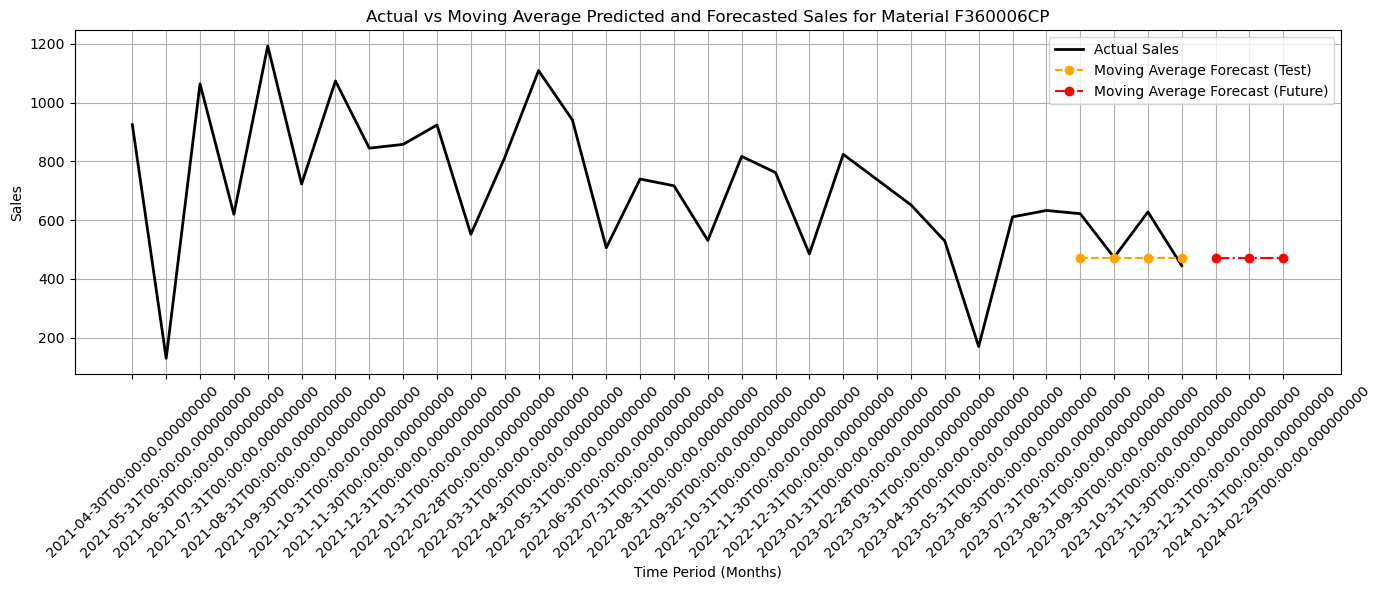

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the figure
plt.figure(figsize=(14, 6))

# Numeric indexes
train_numeric_index = np.arange(len(train))
test_numeric_index = np.arange(len(train), len(train) + len(test))
forecast_numeric_index = np.arange(len(train) + len(test), len(train) + len(test) + 3)

# Plot Actual Sales (Train + Test)
plt.plot(
    np.concatenate([train_numeric_index, test_numeric_index]),
    np.concatenate([train['Sales'].values, test['Sales'].values]),
    color='black', label='Actual Sales', linestyle='-', linewidth=2
)

# Separate Predictions
# best_preds[:4] --> for test period
# best_preds[4:] --> for future forecast (3 months)

# Plot best model prediction (test period)
plt.plot(
    test_numeric_index,
    best_preds[:4],  # only test predictions
    marker='o', linestyle='--', color='orange', label=f'Moving Average Forecast (Test)'
)

# Plot forecasted values (future period)
plt.plot(
    forecast_numeric_index,
    best_preds[4:],  # only future forecasts
    marker='o', linestyle='-.', color='red', label=f'Moving Average Forecast (Future)'
)

# Set x-ticks properly
all_index = np.concatenate([train_numeric_index, test_numeric_index, forecast_numeric_index])
all_labels = np.concatenate([train.index, test.index, forecast_periods])

plt.xticks(all_index, labels=all_labels, rotation=45)

# Add titles, labels, grid
plt.title('Actual vs Moving Average Predicted and Forecasted Sales for Material F360006CP')
plt.xlabel('Time Period (Months)')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


# 4th material

In [ ]:
import pandas as pd

# Specify the file path
file_path = r"C:\Users\satyarth\Downloads\set_1_converted.csv"

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Access and view the row at index 5
row_at_index_5 = data.iloc[3]

# Display the row
print(row_at_index_5)


Material                        F360010CP
Description       BATH SPOUT WITH TIP TON
Range                             ELEMENT
Subcat                              SPOUT
Apr 21 Actual                         925
May 21 Actual                         130
Jun 21 Actual                        1064
Jul 21 Actual                         620
Aug 21 Actual                        1193
Sep 21 Actual                         723
Oct 21 Actual                        1074
Nov 21 Actual                         845
Dec 21 Actual                         858
Jan 22 Actual                         924
Feb 22 Actual                         552
Mar 22 Actual                         813
Apr 22 Actual                        1109
May 22 Actual                         941
Jun 22 Actual                         506
Jul 22 Actual                         740
Aug 22 Actual                         717
Sep 22 Actual                         531
Oct 22 Actual                         817
Nov 22 Actual                     

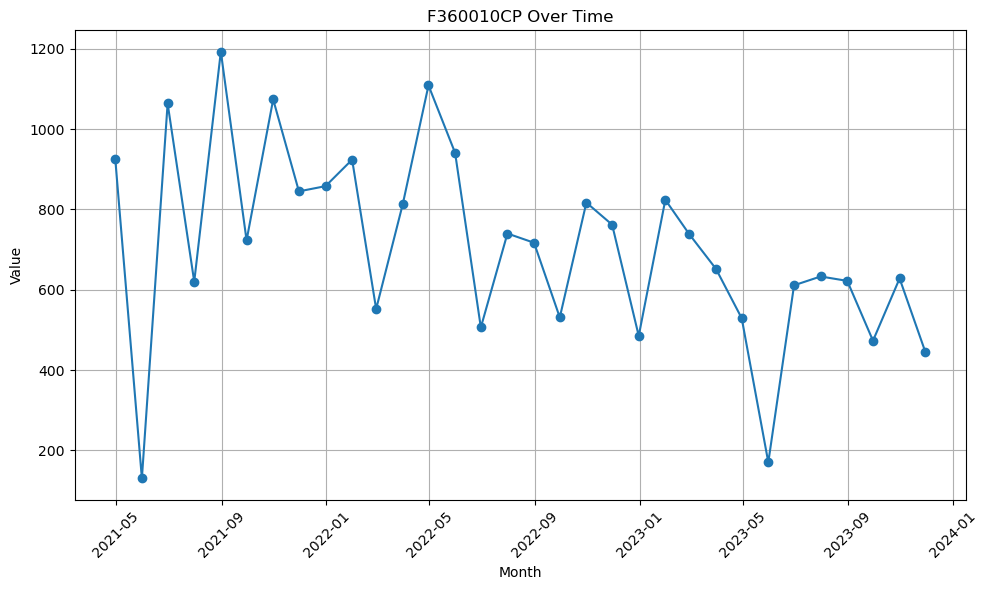

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from your local path
file_path = r'C:\Users\satyarth\Downloads\set_1_converted.csv'  # Note the 'r' for raw string
df = pd.read_csv(file_path)

# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Melt the dataframe to long format
df_long = df.melt(id_vars=['Material', 'Description', 'Range', 'Subcat'],
                  var_name='Month', value_name='Value')

# Remove "Actual" from Month and strip spaces
df_long['Month'] = df_long['Month'].str.replace('Actual', '').str.strip()

# Convert Month to datetime and move to month end
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y') + pd.offsets.MonthEnd(0)

# Filter for F360010CP
df_f360010cp = df_long[df_long['Material'] == 'F360010CP']

# Plot
plt.figure(figsize=(10,6))
plt.plot(df_f360010cp['Month'], df_f360010cp['Value'], marker='o')
plt.title('F360010CP Over Time')
plt.xlabel('Month')
plt.ylabel('Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# Clean column names
df.columns = df.columns.str.strip()

# Melt the dataframe to long format
df_long = df.melt(id_vars=['Material', 'Description'],
                  var_name='Month', value_name='Value')

# Remove "Actual" from Month and strip spaces
df_long['Month'] = df_long['Month'].str.replace('Actual', '', regex=False).str.strip()

# Remove rows where 'Month' is not a real month-year format (like 'Subcat', 'Range', etc.)
# Keep only rows where Month matches something like "Jan 23", "Feb 22", etc.
df_long = df_long[df_long['Month'].str.match(r'^[A-Za-z]{3} \d{2}$', na=False)]

# Now safely convert Month to datetime
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y') + pd.offsets.MonthEnd(0)

# Filter for 'F360010CP' and sort by Month
df_f360010cp = (df_long[df_long['Material'] == 'F360010CP']
                .sort_values('Month')
                .set_index('Month'))

# Final clean series
series = df_f360010cp['Value'].asfreq('M')  # Set monthly frequency






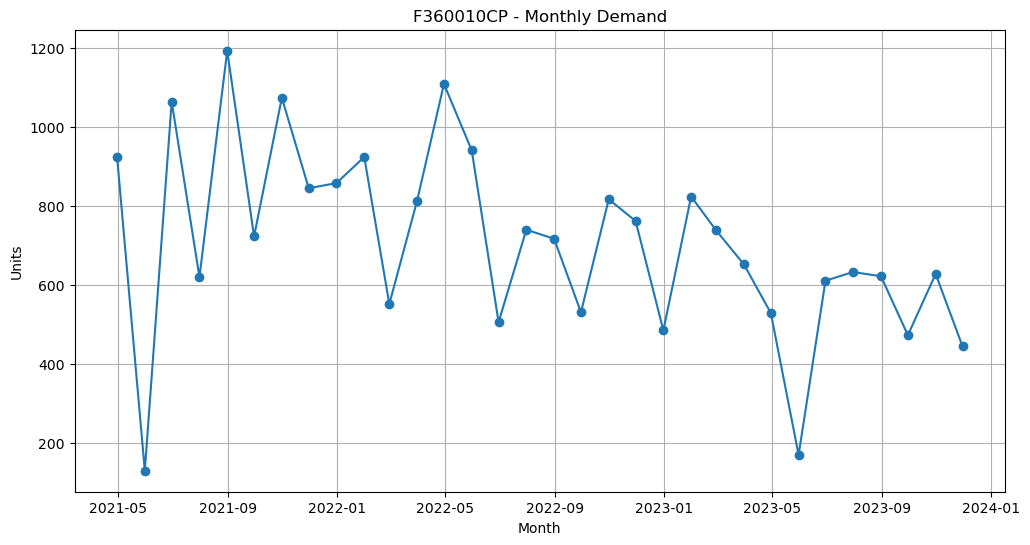

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(series, marker='o')
plt.title('F360010CP - Monthly Demand')
plt.xlabel('Month')
plt.ylabel('Units')
plt.grid(True)
plt.show()


In [ ]:
print("🔎 Missing Values:", series.isnull().sum())


🔎 Missing Values: 0


In [ ]:
print("\n📊 Summary Statistics:")
print(series.describe())



📊 Summary Statistics:
count      32
unique     32
top       925
freq        1
Name: Value, dtype: int64


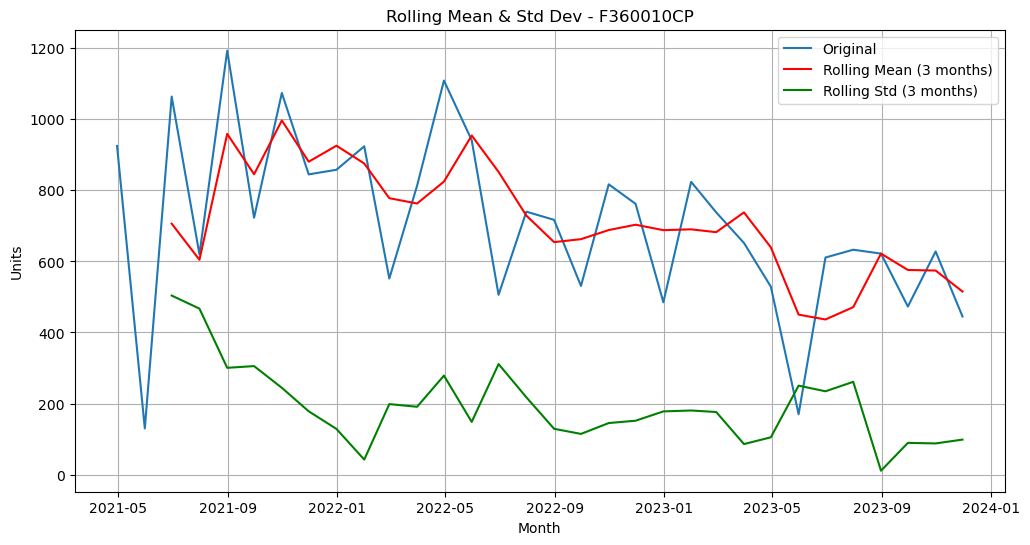

In [ ]:
rolling_mean = series.rolling(window=3).mean()
rolling_std = series.rolling(window=3).std()

plt.figure(figsize=(12,6))
plt.plot(series, label='Original')
plt.plot(rolling_mean, label='Rolling Mean (3 months)', color='red')
plt.plot(rolling_std, label='Rolling Std (3 months)', color='green')
plt.title('Rolling Mean & Std Dev - F360010CP')
plt.xlabel('Month')
plt.ylabel('Units')
plt.legend()
plt.grid(True)
plt.show()



🚨 Outliers Detected (Z-Score > 3):
Series([], Freq: ME, Name: Value, dtype: int64)


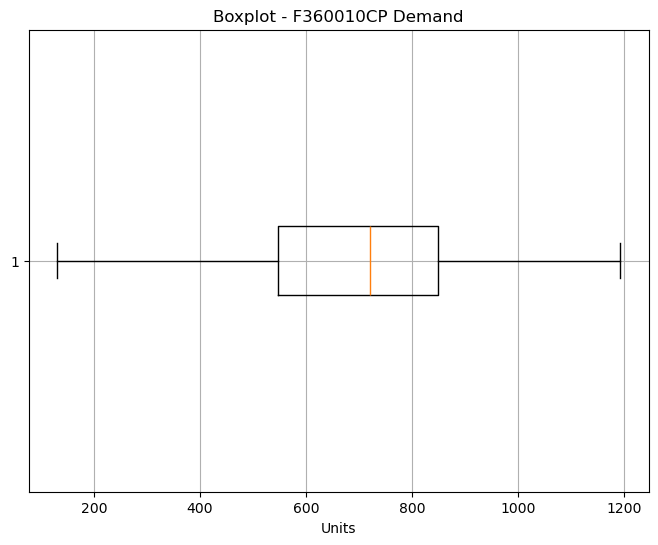

In [ ]:
from scipy.stats import zscore

# Ensure the series is numeric
series_numeric = pd.to_numeric(series, errors='coerce')

# Z-score method
z_scores = zscore(series_numeric.dropna())
outliers = series_numeric[(np.abs(z_scores) > 3)]

print("\n🚨 Outliers Detected (Z-Score > 3):")
print(outliers)

# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(series_numeric.dropna(), vert=False)
plt.title('Boxplot - F360010CP Demand')
plt.xlabel('Units')
plt.grid(True)
plt.show()


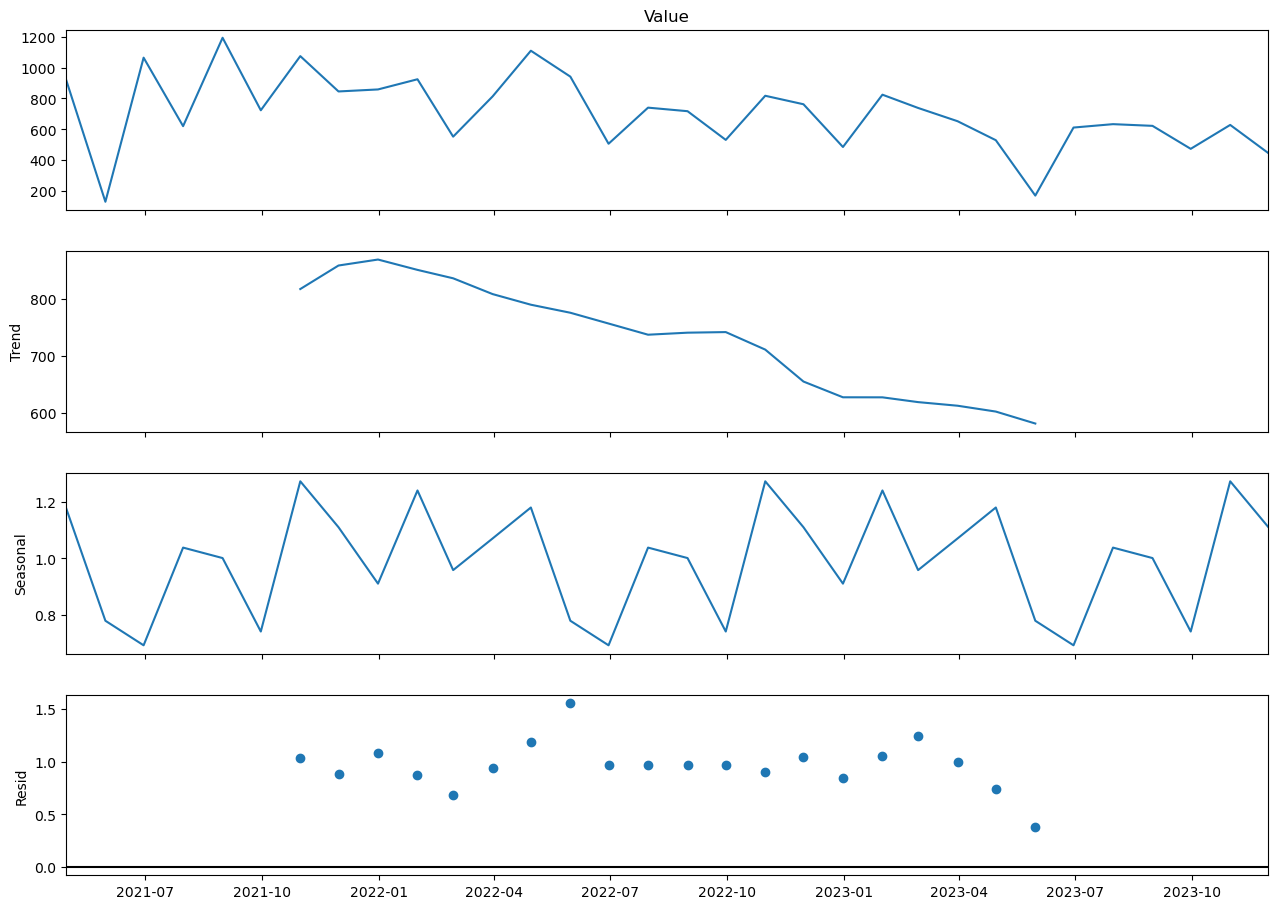

In [ ]:
decomposition = seasonal_decompose(series.dropna(), model='multiplicative', period=12)
fig = decomposition.plot()
fig.set_size_inches(14,10)
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Step 1: ADF Test on original series
adf_result = adfuller(series.dropna())
print('ADF Statistic (original):', adf_result[0])
print('p-value (original):', adf_result[1])

# Check p-value
if adf_result[1] > 0.05:
    print("\nSeries is NOT stationary. Applying 1st order differencing...\n")

    # Step 2: 1st order differencing
    series_diff = series.diff().dropna()

    # Step 3: ADF Test on differenced series
    adf_result_diff = adfuller(series_diff)
    print('ADF Statistic (1st Difference):', adf_result_diff[0])
    print('p-value (1st Difference):', adf_result_diff[1])

    if adf_result_diff[1] <= 0.05:
        print("\nSeries is now stationary after 1st differencing ✅")
    else:
        print("\nSeries is STILL not stationary ❌")
else:
    print("\nSeries is already stationary ✅")


ADF Statistic (original): -5.578432041011342
p-value (original): 1.4145889998168934e-06

Series is already stationary ✅


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you already have df_f360010cp ready
# df_f360010cp = <your filtered data of material F360010CP>

# 1. Train-Test Split
train = df_f360010cp.iloc[:-12]
test = df_f360010cp.iloc[-12:]

# Automatically detect the quantity column
quantity_col = [col for col in train.columns if 'qty' in col.lower() or 'quantity' in col.lower()]
if len(quantity_col) == 0:
    raise ValueError("No column found for Quantity or Qty. Check your dataset.")
else:
    quantity_col = quantity_col[0]

print(f"Quantity Column Detected: {quantity_col}")

# 2. ARIMA Model
print("Training ARIMA...")
arima_model = ARIMA(train[quantity_col], order=(1,1,1))
arima_result = arima_model.fit()
arima_pred = arima_result.forecast(steps=12)

# 3. SARIMA Model
print("Training SARIMA...")
sarima_model = SARIMAX(train[quantity_col], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
sarima_pred = sarima_result.forecast(steps=12)

# 4. Holt-Winters Model
print("Training Holt-Winters...")
hw_model = ExponentialSmoothing(train[quantity_col], seasonal='add', seasonal_periods=12)
hw_result = hw_model.fit()
hw_pred = hw_result.forecast(steps=12)

# 5. Prophet Model
print("Training Prophet...")
prophet_train = train.reset_index().rename(columns={train.index.name: 'ds', quantity_col: 'y'})
prophet = Prophet()
prophet.fit(prophet_train)

future = prophet.make_future_dataframe(periods=12, freq='M')
forecast = prophet.predict(future)
prophet_pred = forecast.iloc[-12:]['yhat'].values

# 6. Evaluation
arima_mape = np.mean(np.abs((test[quantity_col] - arima_pred) / test[quantity_col])) * 100
sarima_mape = np.mean(np.abs((test[quantity_col] - sarima_pred) / test[quantity_col])) * 100
hw_mape = np.mean(np.abs((test[quantity_col] - hw_pred) / test[quantity_col])) * 100
prophet_mape = np.mean(np.abs((test[quantity_col] - prophet_pred) / test[quantity_col])) * 100

mape_scores = {
    'ARIMA': arima_mape,
    'SARIMA': sarima_mape,
    'Holt-Winters': hw_mape,
    'Prophet': prophet_mape
}

best_model_name = min(mape_scores, key=mape_scores.get)
print(f"Best Model based on MAPE: {best_model_name}")

# 7. Future Forecast for 3 months based on best model
print(f"Forecasting next 3 months with {best_model_name}...")

if best_model_name == 'ARIMA':
    future_forecast = arima_result.forecast(steps=3)
elif best_model_name == 'SARIMA':
    future_forecast = sarima_result.forecast(steps=3)
elif best_model_name == 'Holt-Winters':
    future_forecast = hw_result.forecast(steps=3)
elif best_model_name == 'Prophet':
    future_forecast = forecast.iloc[-3:]['yhat'].values

future_index = pd.date_range(start=test.index[-1] + pd.DateOffset(months=1), periods=3, freq='M')

# 8. Plot Final Graph
plt.figure(figsize=(15,6))

plt.plot(train.index, train[quantity_col], label='Train', color='blue')
plt.plot(test.index, test[quantity_col], label='Actual Test', color='black')

if best_model_name == 'ARIMA':
    plt.plot(test.index, arima_pred, label='Predicted', color='green')
elif best_model_name == 'SARIMA':
    plt.plot(test.index, sarima_pred, label='Predicted', color='green')
elif best_model_name == 'Holt-Winters':
    plt.plot(test.index, hw_pred, label='Predicted', color='green')
elif best_model_name == 'Prophet':
    plt.plot(test.index, prophet_pred, label='Predicted', color='green')

plt.plot(future_index, future_forecast, label='Forecast Future', color='red', linestyle='--')

plt.title(f"Material: F360010CP | Best Model: {best_model_name}", fontsize=16)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()


ValueError: No column found for Quantity or Qty. Check your dataset.

Training ARIMA...
Training SARIMA...
Training Holt-Winters...
Training Prophet...


00:13:45 - cmdstanpy - INFO - Chain [1] start processing
00:13:46 - cmdstanpy - INFO - Chain [1] done processing


Best Model based on MAPE: ARIMA


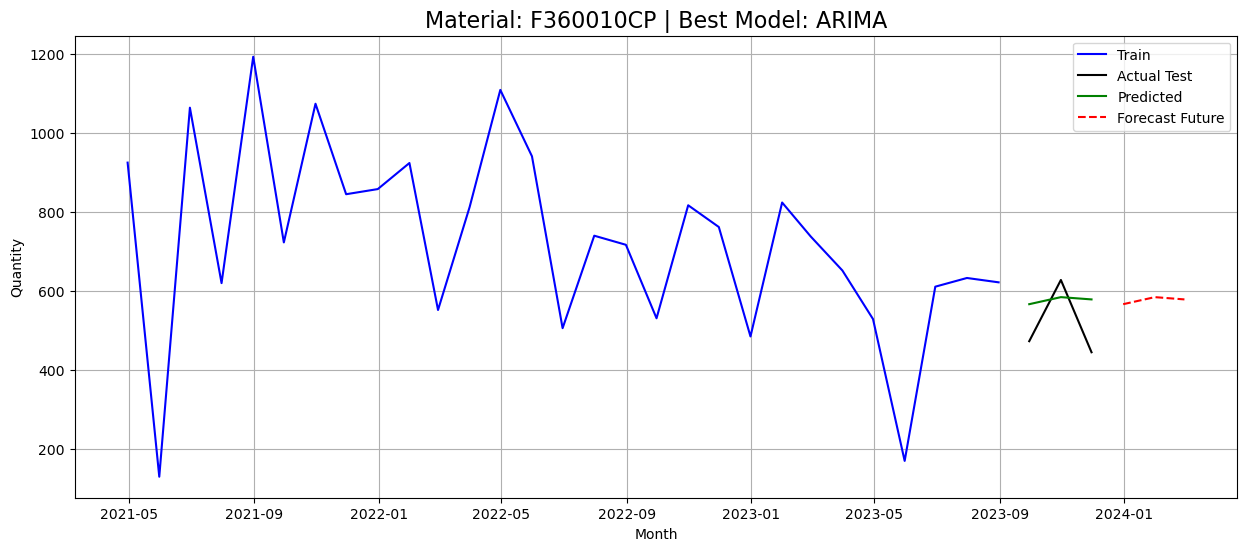

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

# STEP 1: Load Data
df = pd.read_csv(r'C:\Users\satyarth\Downloads\set_1_converted.csv')

# STEP 2: Melt data into long format
month_cols = [col for col in df.columns if 'Actual' in col]

df_long = df.melt(id_vars=['Material', 'Description', 'Range', 'Subcat'], 
                  value_vars=month_cols,
                  var_name='Month',
                  value_name='Quantity')

# STEP 3: Clean Month column
df_long['Month'] = df_long['Month'].str.replace('Actual', '').str.strip()
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y') + pd.offsets.MonthEnd(0)

# STEP 4: Filter for Material F360010CP
df_f360010cp = df_long[df_long['Material'] == 'F360010CP'].sort_values('Month')

# STEP 5: Train-Test Split
train = df_f360010cp.iloc[:-3]
test = df_f360010cp.iloc[-3:]

# Setting Month as index
train.set_index('Month', inplace=True)
test.set_index('Month', inplace=True)

# STEP 6: Modeling

# 6.1 ARIMA
print("Training ARIMA...")
arima_model = ARIMA(train['Quantity'], order=(1,1,1))
arima_result = arima_model.fit()
arima_pred = arima_result.forecast(steps=3)

# 6.2 SARIMA
print("Training SARIMA...")
sarima_model = SARIMAX(train['Quantity'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
sarima_pred = sarima_result.forecast(steps=3)

# 6.3 Holt-Winters
print("Training Holt-Winters...")
hw_model = ExponentialSmoothing(train['Quantity'], seasonal='add', seasonal_periods=12)
hw_result = hw_model.fit()
hw_pred = hw_result.forecast(steps=3)

# 6.4 Prophet
print("Training Prophet...")
prophet_train = train.reset_index()[['Month', 'Quantity']].rename(columns={'Month': 'ds', 'Quantity': 'y'})
prophet = Prophet()
prophet.fit(prophet_train)
future = prophet.make_future_dataframe(periods=3, freq='M')
forecast = prophet.predict(future)
prophet_pred = forecast.iloc[-3:]['yhat'].values

# STEP 7: Evaluation

def calculate_mape(actual, pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100

arima_mape = calculate_mape(test['Quantity'], arima_pred)
sarima_mape = calculate_mape(test['Quantity'], sarima_pred)
hw_mape = calculate_mape(test['Quantity'], hw_pred)
prophet_mape = calculate_mape(test['Quantity'], prophet_pred)

mape_scores = {
    'ARIMA': arima_mape,
    'SARIMA': sarima_mape,
    'Holt-Winters': hw_mape,
    'Prophet': prophet_mape
}

best_model_name = min(mape_scores, key=mape_scores.get)
print(f"Best Model based on MAPE: {best_model_name}")

# STEP 8: Final Forecast for 3 Months

if best_model_name == 'ARIMA':
    final_forecast = arima_result.forecast(steps=3)
elif best_model_name == 'SARIMA':
    final_forecast = sarima_result.forecast(steps=3)
elif best_model_name == 'Holt-Winters':
    final_forecast = hw_result.forecast(steps=3)
elif best_model_name == 'Prophet':
    final_forecast = forecast.iloc[-3:]['yhat'].values

future_index = pd.date_range(start=test.index[-1] + pd.DateOffset(months=1), periods=3, freq='M')

# STEP 9: Plotting

plt.figure(figsize=(15,6))
plt.plot(train.index, train['Quantity'], label='Train', color='blue')
plt.plot(test.index, test['Quantity'], label='Actual Test', color='black')

if best_model_name == 'ARIMA':
    plt.plot(test.index, arima_pred, label='Predicted', color='green')
elif best_model_name == 'SARIMA':
    plt.plot(test.index, sarima_pred, label='Predicted', color='green')
elif best_model_name == 'Holt-Winters':
    plt.plot(test.index, hw_pred, label='Predicted', color='green')
elif best_model_name == 'Prophet':
    plt.plot(test.index, prophet_pred, label='Predicted', color='green')

plt.plot(future_index, final_forecast, label='Forecast Future', color='red', linestyle='--')

plt.title(f"Material: F360010CP | Best Model: {best_model_name}", fontsize=16)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()


ARIMA MAPE: 18.93%


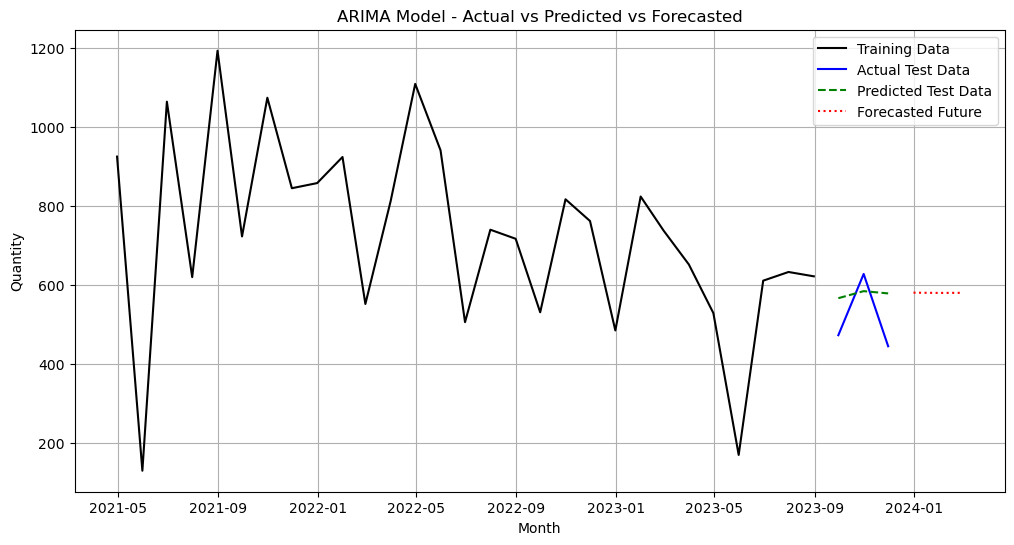

Training SARIMA...
Training Holt-Winters...
Training Prophet...


00:23:24 - cmdstanpy - INFO - Chain [1] start processing
00:23:24 - cmdstanpy - INFO - Chain [1] done processing



MAPE Scores:
ARIMA MAPE: 18.93%
SARIMA MAPE: 64.03%
Holt-Winters MAPE: 32.34%
Prophet MAPE: 33.84%

✅ Best Model based on MAPE: ARIMA

📈 Predicted vs Actual (Test Set):
            Actual   Predicted
Month                         
2023-09-30     473  566.676289
2023-10-31     628  584.515555
2023-11-30     445  578.763240

🔮 Forecasted Future (Next 3 Months):
            Forecasted
2023-12-31         NaN
2024-01-31         NaN
2024-02-29         NaN


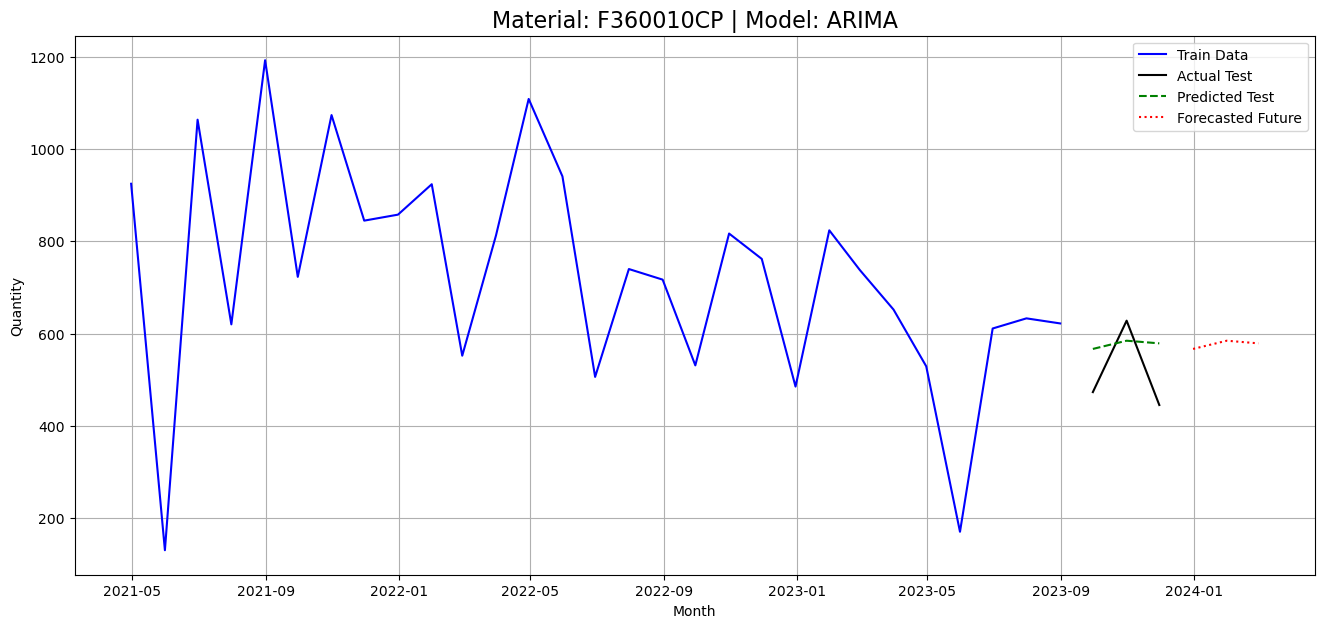

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

# STEP 1: Load Data
df = pd.read_csv(r'C:\Users\satyarth\Downloads\set_1_converted.csv')

# STEP 2: Melt data into long format
month_cols = [col for col in df.columns if 'Actual' in col]

df_long = df.melt(id_vars=['Material', 'Description', 'Range', 'Subcat'], 
                  value_vars=month_cols,
                  var_name='Month',
                  value_name='Quantity')

# STEP 3: Clean Month column
df_long['Month'] = df_long['Month'].str.replace('Actual', '').str.strip()
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y') + pd.offsets.MonthEnd(0)

# STEP 4: Filter for Material F360010CP
df_f360010cp = df_long[df_long['Material'] == 'F360010CP'].sort_values('Month')

# STEP 5: Train-Test Split
train = df_f360010cp.iloc[:-3]
test = df_f360010cp.iloc[-3:]

# Setting Month as index
train.set_index('Month', inplace=True)
test.set_index('Month', inplace=True)

# STEP 6: Modeling

# 6.1 ARIMA
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Train ARIMA
arima_model = ARIMA(train['Quantity'], order=(1,1,1))
arima_result = arima_model.fit()

# Predict on Test
arima_pred_test = arima_result.forecast(steps=len(test))

# Forecast for next 3 months
arima_forecast_future = arima_result.forecast(steps=len(test)+3)[-3:]

# Calculate MAPE for test set
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

arima_mape = mape(test['Quantity'], arima_pred_test)
print(f"ARIMA MAPE: {arima_mape:.2f}%")

# Create DataFrames for plotting
predicted_df = test.copy()
predicted_df['Predicted'] = arima_pred_test.values

forecast_index = pd.date_range(start=test.index[-1] + pd.DateOffset(months=1), periods=3, freq='M')
forecast_df = pd.DataFrame({'Forecasted': arima_forecast_future.values}, index=forecast_index)

# Plot Actual vs Predicted vs Forecast
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Quantity'], label='Training Data', color='black')
plt.plot(predicted_df.index, predicted_df['Quantity'], label='Actual Test Data', color='blue')
plt.plot(predicted_df.index, predicted_df['Predicted'], label='Predicted Test Data', color='green', linestyle='--')
plt.plot(forecast_df.index, forecast_df['Forecasted'], label='Forecasted Future', color='red', linestyle='dotted')
plt.legend()
plt.title('ARIMA Model - Actual vs Predicted vs Forecasted')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.grid()
plt.show()


# 6.2 SARIMA
print("Training SARIMA...")
sarima_model = SARIMAX(train['Quantity'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
sarima_pred = sarima_result.forecast(steps=3)

# 6.3 Holt-Winters
print("Training Holt-Winters...")
hw_model = ExponentialSmoothing(train['Quantity'], seasonal='add', seasonal_periods=12)
hw_result = hw_model.fit()
hw_pred = hw_result.forecast(steps=3)

# 6.4 Prophet
# 6.4 Prophet
print("Training Prophet...")

# Prophet expects columns: ds (date), y (value)
prophet_train = train.reset_index()[['Month', 'Quantity']].rename(columns={'Month': 'ds', 'Quantity': 'y'})

prophet = Prophet()
prophet.fit(prophet_train)

future = prophet.make_future_dataframe(periods=3, freq='M')
forecast = prophet.predict(future)
prophet_pred = forecast.iloc[-3:]['yhat'].values


# STEP 7: Evaluation

def calculate_mape(actual, pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100

arima_mape = calculate_mape(test['Quantity'], arima_pred)
sarima_mape = calculate_mape(test['Quantity'], sarima_pred)
hw_mape = calculate_mape(test['Quantity'], hw_pred)
prophet_mape = calculate_mape(test['Quantity'], prophet_pred)

# Print MAPE scores
print("\nMAPE Scores:")
print(f"ARIMA MAPE: {arima_mape:.2f}%")
print(f"SARIMA MAPE: {sarima_mape:.2f}%")
print(f"Holt-Winters MAPE: {hw_mape:.2f}%")
print(f"Prophet MAPE: {prophet_mape:.2f}%")

mape_scores = {
    'ARIMA': arima_mape,
    'SARIMA': sarima_mape,
    'Holt-Winters': hw_mape,
    'Prophet': prophet_mape
}

best_model_name = min(mape_scores, key=mape_scores.get)
print(f"\n✅ Best Model based on MAPE: {best_model_name}")

# STEP 8: Final Forecast for 3 Months

if best_model_name == 'ARIMA':
    final_model = arima_result
    final_pred = arima_pred
elif best_model_name == 'SARIMA':
    final_model = sarima_result
    final_pred = sarima_pred
elif best_model_name == 'Holt-Winters':
    final_model = hw_result
    final_pred = hw_pred
elif best_model_name == 'Prophet':
    final_model = prophet
    final_pred = prophet_pred

future_index = pd.date_range(start=test.index[-1] + pd.DateOffset(months=1), periods=3, freq='M')

# STEP 9: Print Predicted vs Actual
result_df = pd.DataFrame({
    'Actual': test['Quantity'].values,
    'Predicted': final_pred
}, index=test.index)

print("\n📈 Predicted vs Actual (Test Set):")
print(result_df)

# STEP 10: Forecasting Future
future_forecast = final_model.forecast(steps=3) if best_model_name != 'Prophet' else final_pred

future_df = pd.DataFrame({
    'Forecasted': future_forecast
}, index=future_index)

print("\n🔮 Forecasted Future (Next 3 Months):")
print(future_df)

# STEP 11: Plotting

plt.figure(figsize=(16,7))
plt.plot(train.index, train['Quantity'], label='Train Data', color='blue')
plt.plot(test.index, test['Quantity'], label='Actual Test', color='black')
plt.plot(test.index, final_pred, label='Predicted Test', color='green', linestyle='--')
plt.plot(future_index, future_forecast, label='Forecasted Future', color='red', linestyle='dotted')

plt.title(f"Material: F360010CP | Model: {best_model_name}", fontsize=16)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()




Training ARIMA...

Training SARIMA...

Training Holt-Winters...

Training Prophet...


00:26:55 - cmdstanpy - INFO - Chain [1] start processing
00:26:55 - cmdstanpy - INFO - Chain [1] done processing



MAPE Scores:
ARIMA MAPE: 18.93%
SARIMA MAPE: 64.03%
Holt-Winters MAPE: 32.34%
Prophet MAPE: 33.84%

✅ Best Model based on MAPE: ARIMA


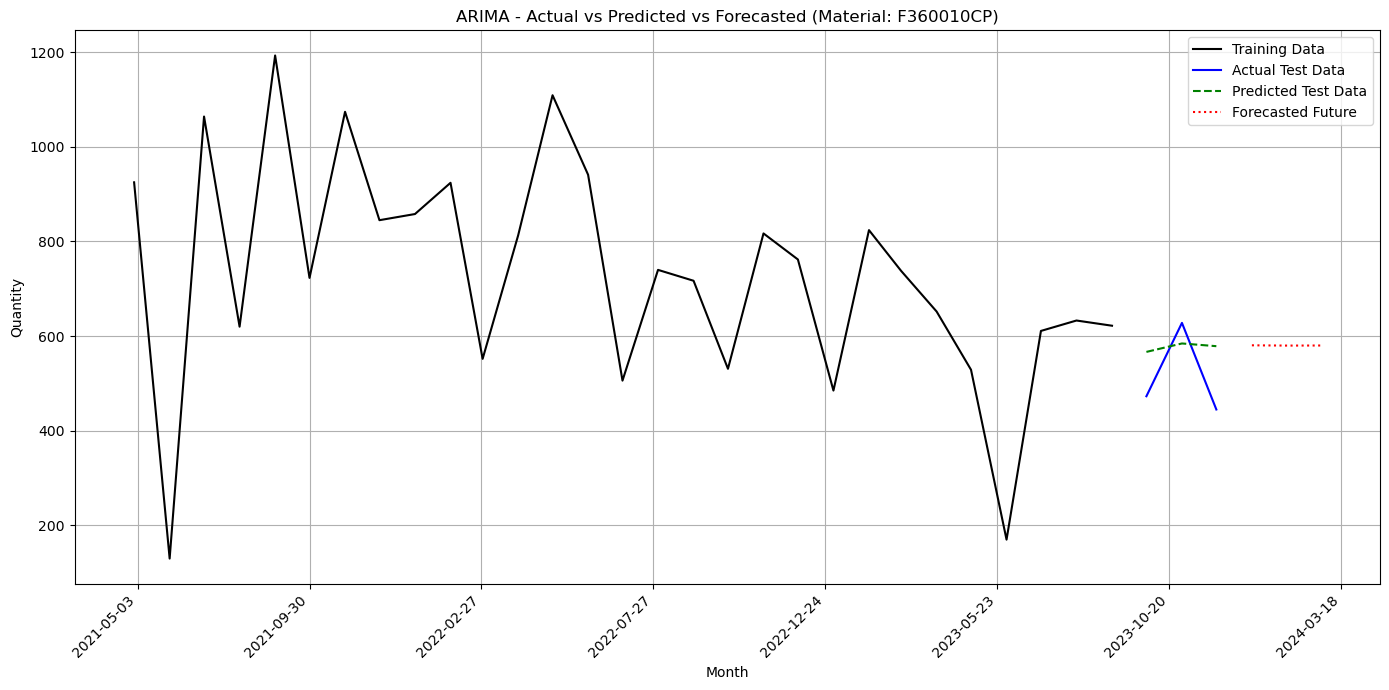


🔮 Forecasted Future (Next 3 Months):
            Forecasted
2023-12-31  580.618088
2024-01-31  580.019988
2024-02-29  580.212847


In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

# 1. Load Data
df = pd.read_csv(r'C:\Users\satyarth\Downloads\set_1_converted.csv')

# 2. Reshape and Prepare
df_long = df.melt(id_vars=['Material', 'Description', 'Range', 'Subcat'], var_name='Month', value_name='Quantity')
df_long['Month'] = df_long['Month'].str.replace('Actual', '').str.strip()
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y') + pd.offsets.MonthEnd(0)

material_df = df_long[df_long['Material'] == 'F360010CP']
material_df = material_df.dropna()
material_df.set_index('Month', inplace=True)

# 3. Train-Test Split
train = material_df.iloc[:-3]
test = material_df.iloc[-3:]

# 4. Modeling

# --- ARIMA ---
print("\nTraining ARIMA...")
arima_model = ARIMA(train['Quantity'], order=(1,1,1))
arima_result = arima_model.fit()
arima_pred = arima_result.forecast(steps=len(test))
arima_forecast = arima_result.forecast(steps=len(test)+3)[-3:]

# --- SARIMA ---
print("\nTraining SARIMA...")
sarima_model = SARIMAX(train['Quantity'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)
sarima_pred = sarima_result.forecast(steps=len(test))
sarima_forecast = sarima_result.forecast(steps=len(test)+3)[-3:]

# --- Holt-Winters ---
print("\nTraining Holt-Winters...")
hw_model = ExponentialSmoothing(train['Quantity'], seasonal='add', seasonal_periods=12)
hw_result = hw_model.fit()
hw_pred = hw_result.forecast(steps=len(test))
hw_forecast = hw_result.forecast(steps=3)

# --- Prophet ---
print("\nTraining Prophet...")
prophet_df = train.reset_index()[['Month', 'Quantity']].rename(columns={'Month': 'ds', 'Quantity': 'y'})
prophet = Prophet()
prophet.fit(prophet_df)
future = prophet.make_future_dataframe(periods=6, freq='M')  # 3 Test + 3 Future
forecast = prophet.predict(future)
prophet_pred = forecast.iloc[-6:-3]['yhat'].values  # For test set
prophet_forecast = forecast.iloc[-3:]['yhat'].values  # For future

# 5. Calculate MAPE
arima_mape = mean_absolute_percentage_error(test['Quantity'], arima_pred) * 100
sarima_mape = mean_absolute_percentage_error(test['Quantity'], sarima_pred) * 100
hw_mape = mean_absolute_percentage_error(test['Quantity'], hw_pred) * 100
prophet_mape = mean_absolute_percentage_error(test['Quantity'], prophet_pred) * 100

print(f"\nMAPE Scores:")
print(f"ARIMA MAPE: {arima_mape:.2f}%")
print(f"SARIMA MAPE: {sarima_mape:.2f}%")
print(f"Holt-Winters MAPE: {hw_mape:.2f}%")
print(f"Prophet MAPE: {prophet_mape:.2f}%")

# 6. Select Best Model
mape_scores = {
    'ARIMA': arima_mape,
    'SARIMA': sarima_mape,
    'Holt-Winters': hw_mape,
    'Prophet': prophet_mape
}
best_model = min(mape_scores, key=mape_scores.get)
print(f"\n✅ Best Model based on MAPE: {best_model}")

# 7. Plotting Best Model
if best_model == 'ARIMA':
    pred = arima_pred
    forecast = arima_forecast
elif best_model == 'SARIMA':
    pred = sarima_pred
    forecast = sarima_forecast
elif best_model == 'Holt-Winters':
    pred = hw_pred
    forecast = hw_forecast
else:
    pred = prophet_pred
    forecast = prophet_forecast

# Prepare forecast index
forecast_index = pd.date_range(start=test.index[-1] + pd.DateOffset(months=1), periods=3, freq='M')

# Plot
plt.figure(figsize=(14,7))
plt.plot(train.index, train['Quantity'], label='Training Data', color='black')
plt.plot(test.index, test['Quantity'], label='Actual Test Data', color='blue')
plt.plot(test.index, pred, label='Predicted Test Data', color='green', linestyle='--')
plt.plot(forecast_index, forecast, label='Forecasted Future', color='red', linestyle='dotted')

# x-axis fix
plt.xticks(pd.date_range(start=material_df.index.min(), end=forecast_index.max(), freq='M'),
           rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.title(f'{best_model} - Actual vs Predicted vs Forecasted (Material: F360010CP)')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Print Final Forecast
final_forecast_df = pd.DataFrame({'Forecasted': forecast}, index=forecast_index)
print("\n🔮 Forecasted Future (Next 3 Months):")
print(final_forecast_df)


00:31:10 - cmdstanpy - INFO - Chain [1] start processing
00:31:10 - cmdstanpy - INFO - Chain [1] done processing



MAPE Scores:
ARIMA MAPE: 18.93%
SARIMA MAPE: 64.03%
Holt-Winters MAPE: 21.62%
Prophet MAPE: 33.84%

✅ Best Model based on MAPE: ARIMA

📈 Predicted vs Actual (Test Set):
            Actual   Predicted
Month                         
2023-09-30     473  566.676289
2023-10-31     628  584.515555
2023-11-30     445  578.763240

🔮 Forecasted Future (Next 3 Months):
            Forecasted
2023-12-31  580.256173
2024-01-31  534.018365
2024-02-29  549.824926


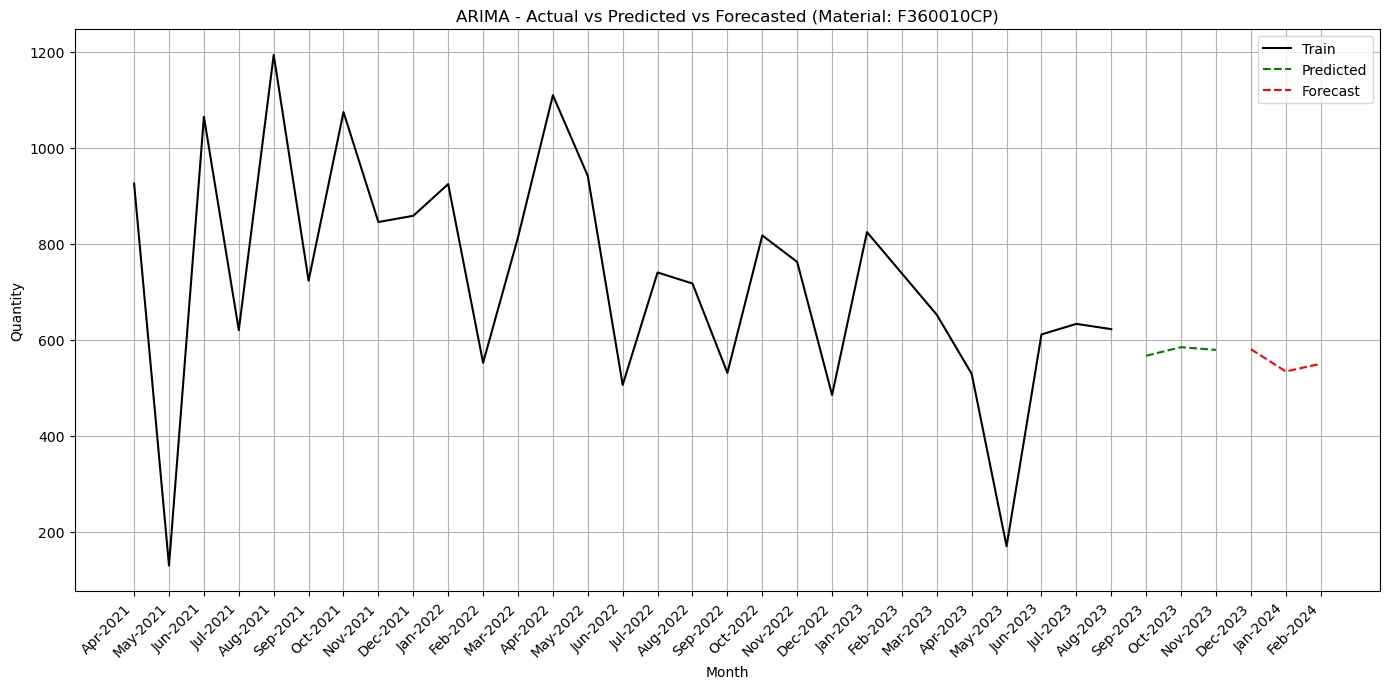

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

# =========================
# 1. Load and Prepare Data
# =========================

# Read Data
df = pd.read_csv(r'C:\Users\satyarth\Downloads\set_1_converted.csv')  

# Melt the data (long format)
month_columns = df.columns[4:]
df_long = df.melt(id_vars=['Material', 'Description', 'Range', 'Subcat'], 
                  value_vars=month_columns, 
                  var_name='Month', value_name='Quantity')

# Clean Month
df_long['Month'] = df_long['Month'].str.replace('Actual', '').str.strip()

# Convert Month to datetime
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y') + pd.offsets.MonthEnd(0)

# Filter Material
df_f360010cp = df_long[df_long['Material'] == 'F360010CP'].sort_values('Month')

# Set Index
df_f360010cp = df_f360010cp.set_index('Month')

# Final Data
ts = df_f360010cp[['Quantity']]

# =========================
# 2. Stationarity Check
# =========================

result = adfuller(ts['Quantity'].dropna())

if result[1] > 0.05:
    ts_diff = ts.diff().dropna()
else:
    ts_diff = ts

# =========================
# 3. Train-Test Split
# =========================

train = ts[:-3]
test = ts[-3:]

# =========================
# 4. Modeling
# =========================

# 4.1 ARIMA
arima_model = ARIMA(train['Quantity'], order=(1,1,1))
arima_result = arima_model.fit()
arima_pred = arima_result.forecast(steps=3)

# 4.2 SARIMA
sarima_model = SARIMAX(train['Quantity'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
sarima_pred = sarima_result.forecast(steps=3)

# 4.3 Holt-Winters
hw_model = ExponentialSmoothing(train['Quantity'], trend='add', seasonal='add', seasonal_periods=12)
hw_result = hw_model.fit()
hw_pred = hw_result.forecast(steps=3)

# 4.4 Prophet
prophet_train = train.reset_index().rename(columns={'Month': 'ds', 'Quantity': 'y'})
prophet = Prophet()
prophet.fit(prophet_train)
future = prophet.make_future_dataframe(periods=3, freq='M')
forecast_prophet = prophet.predict(future)
prophet_pred = forecast_prophet[['ds', 'yhat']].set_index('ds').iloc[-3:]['yhat']

# =========================
# 5. Evaluation
# =========================

arima_mape = mean_absolute_percentage_error(test['Quantity'], arima_pred) * 100
sarima_mape = mean_absolute_percentage_error(test['Quantity'], sarima_pred) * 100
hw_mape = mean_absolute_percentage_error(test['Quantity'], hw_pred) * 100
prophet_mape = mean_absolute_percentage_error(test['Quantity'], prophet_pred) * 100

print(f"\nMAPE Scores:")
print(f"ARIMA MAPE: {arima_mape:.2f}%")
print(f"SARIMA MAPE: {sarima_mape:.2f}%")
print(f"Holt-Winters MAPE: {hw_mape:.2f}%")
print(f"Prophet MAPE: {prophet_mape:.2f}%")

# Best Model
mape_scores = {
    'ARIMA': arima_mape,
    'SARIMA': sarima_mape,
    'Holt-Winters': hw_mape,
    'Prophet': prophet_mape
}
best_model = min(mape_scores, key=mape_scores.get)
print(f"\n✅ Best Model based on MAPE: {best_model}")

# Best Predictions
if best_model == 'ARIMA':
    pred = arima_pred
elif best_model == 'SARIMA':
    pred = sarima_pred
elif best_model == 'Holt-Winters':
    pred = hw_pred
else:
    pred = prophet_pred

# =========================
# 6. Future Forecast (3 Months)
# =========================

if best_model == 'ARIMA':
    future_model = ARIMA(ts['Quantity'], order=(1,1,1)).fit()
    forecast = future_model.forecast(steps=3)
elif best_model == 'SARIMA':
    future_model = SARIMAX(ts['Quantity'], order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
    forecast = future_model.forecast(steps=3)
elif best_model == 'Holt-Winters':
    future_model = ExponentialSmoothing(ts['Quantity'], trend='add', seasonal='add', seasonal_periods=12).fit()
    forecast = future_model.forecast(steps=3)
else:
    prophet_full = Prophet()
    prophet_full.fit(ts.reset_index().rename(columns={'Month':'ds', 'Quantity':'y'}))
    future_full = prophet_full.make_future_dataframe(periods=3, freq='M')
    forecast = prophet_full.predict(future_full).set_index('ds').iloc[-3:]['yhat']

forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=3, freq='M')

print("\n📈 Predicted vs Actual (Test Set):")
print(pd.DataFrame({'Actual': test['Quantity'].values, 'Predicted': pred.values}, index=test.index))

print("\n🔮 Forecasted Future (Next 3 Months):")
print(pd.DataFrame({'Forecasted': forecast.values}, index=forecast_index))

# =========================
# 7. Plotting (with equal gap x-axis)
# =========================

plot_df = pd.DataFrame({
    'Month': list(train.index) + list(test.index) + list(forecast_index),
    'Quantity': list(train['Quantity']) + list(pred) + list(forecast),
    'Type': (['Train'] * len(train)) + (['Predicted'] * len(test)) + (['Forecast'] * len(forecast_index))
})

plot_df.reset_index(drop=True, inplace=True)

# Plot
plt.figure(figsize=(14,7))

colors = {'Train': 'black', 'Predicted': 'green', 'Forecast': 'red'}

for t in plot_df['Type'].unique():
    subset = plot_df[plot_df['Type'] == t]
    plt.plot(subset.index, subset['Quantity'], label=t, color=colors[t], linestyle='--' if t != 'Train' else '-')

plt.xticks(ticks=plot_df.index, labels=plot_df['Month'].dt.strftime('%b-%Y'), rotation=45, ha='right')
plt.title(f'{best_model} - Actual vs Predicted vs Forecasted (Material: F360010CP)')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


00:39:17 - cmdstanpy - INFO - Chain [1] start processing
00:39:18 - cmdstanpy - INFO - Chain [1] done processing



MAPE Scores:
ARIMA MAPE: 18.93%
SARIMA MAPE: 64.03%
Holt-Winters MAPE: 21.62%
Prophet MAPE: 33.84%

✅ Best Model based on MAPE: ARIMA

📈 Predicted vs Actual (Test Set):
            Actual   Predicted
Month                         
2023-09-30     473  566.676289
2023-10-31     628  584.515555
2023-11-30     445  578.763240

🔮 Forecasted Future (Next 3 Months):
            Forecasted
2023-12-31  580.256173
2024-01-31  534.018365
2024-02-29  549.824926


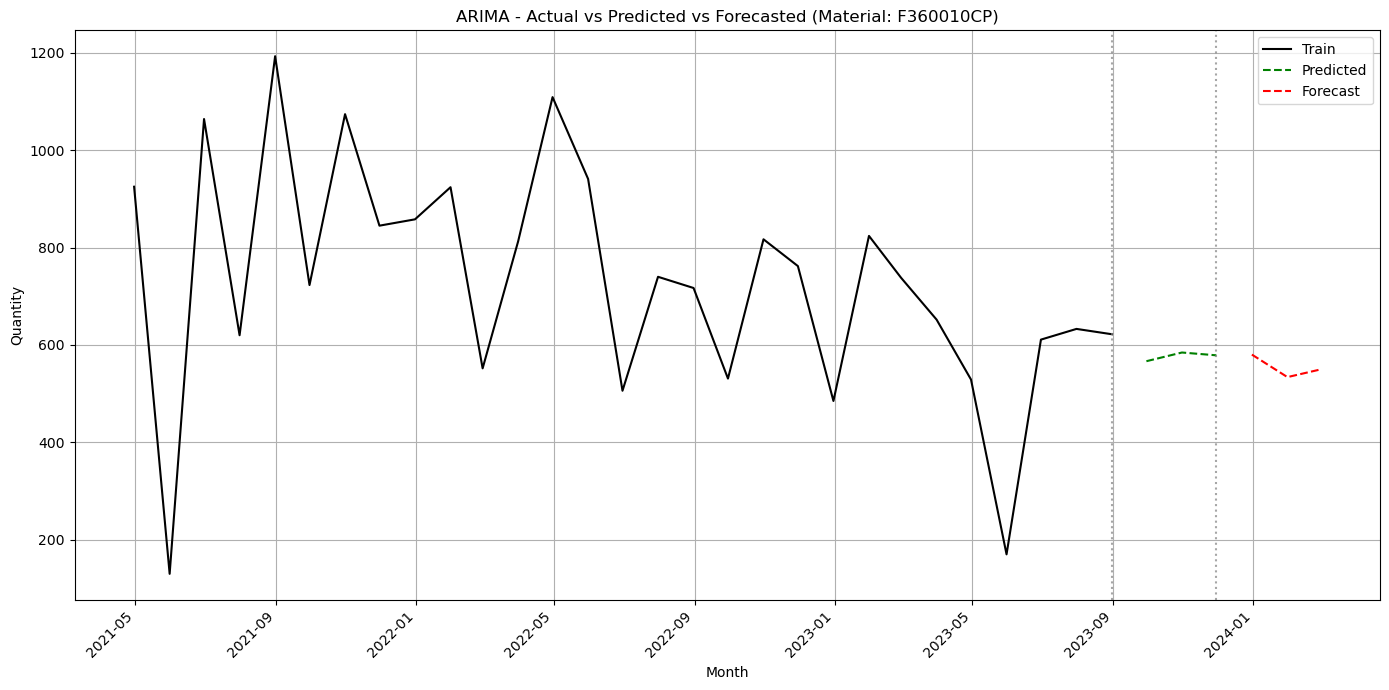

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

# =========================
# 1. Load and Prepare Data
# =========================

# Read Data
df = pd.read_csv(r'C:\Users\satyarth\Downloads\set_1_converted.csv')  

# Melt the data (long format)
month_columns = df.columns[4:]
df_long = df.melt(id_vars=['Material', 'Description', 'Range', 'Subcat'], 
                  value_vars=month_columns, 
                  var_name='Month', value_name='Quantity')

# Clean Month
df_long['Month'] = df_long['Month'].str.replace('Actual', '').str.strip()

# Convert Month to datetime
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y') + pd.offsets.MonthEnd(0)

# Filter Material
df_f360010cp = df_long[df_long['Material'] == 'F360010CP'].sort_values('Month')

# Set Index
df_f360010cp = df_f360010cp.set_index('Month')

# Final Data
ts = df_f360010cp[['Quantity']]

# =========================
# 2. Stationarity Check
# =========================

result = adfuller(ts['Quantity'].dropna())

if result[1] > 0.05:
    ts_diff = ts.diff().dropna()
else:
    ts_diff = ts

# =========================
# 3. Train-Test Split
# =========================

train = ts[:-3]
test = ts[-3:]

# =========================
# 4. Modeling
# =========================

# 4.1 ARIMA
arima_model = ARIMA(train['Quantity'], order=(1,1,1))
arima_result = arima_model.fit()
arima_pred = arima_result.forecast(steps=3)

# 4.2 SARIMA
sarima_model = SARIMAX(train['Quantity'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
sarima_pred = sarima_result.forecast(steps=3)

# 4.3 Holt-Winters
hw_model = ExponentialSmoothing(train['Quantity'], trend='add', seasonal='add', seasonal_periods=12)
hw_result = hw_model.fit()
hw_pred = hw_result.forecast(steps=3)

# 4.4 Prophet
prophet_train = train.reset_index().rename(columns={'Month': 'ds', 'Quantity': 'y'})
prophet = Prophet()
prophet.fit(prophet_train)
future = prophet.make_future_dataframe(periods=3, freq='M')
forecast_prophet = prophet.predict(future)
prophet_pred = forecast_prophet[['ds', 'yhat']].set_index('ds').iloc[-3:]['yhat']

# =========================
# 5. Evaluation
# =========================

arima_mape = mean_absolute_percentage_error(test['Quantity'], arima_pred) * 100
sarima_mape = mean_absolute_percentage_error(test['Quantity'], sarima_pred) * 100
hw_mape = mean_absolute_percentage_error(test['Quantity'], hw_pred) * 100
prophet_mape = mean_absolute_percentage_error(test['Quantity'], prophet_pred) * 100

print(f"\nMAPE Scores:")
print(f"ARIMA MAPE: {arima_mape:.2f}%")
print(f"SARIMA MAPE: {sarima_mape:.2f}%")
print(f"Holt-Winters MAPE: {hw_mape:.2f}%")
print(f"Prophet MAPE: {prophet_mape:.2f}%")

# Best Model
mape_scores = {
    'ARIMA': arima_mape,
    'SARIMA': sarima_mape,
    'Holt-Winters': hw_mape,
    'Prophet': prophet_mape
}
best_model = min(mape_scores, key=mape_scores.get)
print(f"\n✅ Best Model based on MAPE: {best_model}")

# Best Predictions
if best_model == 'ARIMA':
    pred = arima_pred
elif best_model == 'SARIMA':
    pred = sarima_pred
elif best_model == 'Holt-Winters':
    pred = hw_pred
else:
    pred = prophet_pred

# =========================
# 6. Future Forecast (3 Months)
# =========================

if best_model == 'ARIMA':
    future_model = ARIMA(ts['Quantity'], order=(1,1,1)).fit()
    forecast = future_model.forecast(steps=3)
elif best_model == 'SARIMA':
    future_model = SARIMAX(ts['Quantity'], order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
    forecast = future_model.forecast(steps=3)
elif best_model == 'Holt-Winters':
    future_model = ExponentialSmoothing(ts['Quantity'], trend='add', seasonal='add', seasonal_periods=12).fit()
    forecast = future_model.forecast(steps=3)
else:
    prophet_full = Prophet()
    prophet_full.fit(ts.reset_index().rename(columns={'Month':'ds', 'Quantity':'y'}))
    future_full = prophet_full.make_future_dataframe(periods=3, freq='M')
    forecast = prophet_full.predict(future_full).set_index('ds').iloc[-3:]['yhat']

forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=3, freq='M')

print("\n📈 Predicted vs Actual (Test Set):")
print(pd.DataFrame({'Actual': test['Quantity'].values, 'Predicted': pred.values}, index=test.index))

print("\n🔮 Forecasted Future (Next 3 Months):")
print(pd.DataFrame({'Forecasted': forecast.values}, index=forecast_index))

# =========================
# 7. Plotting (without gaps on x-axis)
# =========================

# Create a continuous time range for plotting
full_index = pd.date_range(start=train.index[0], end=forecast_index[-1], freq='M')

# Create plotting DataFrame
plot_data = pd.DataFrame(index=full_index)
plot_data['Train'] = train['Quantity']
plot_data['Predicted'] = np.nan
plot_data.loc[test.index, 'Predicted'] = pred.values
plot_data['Forecast'] = np.nan
plot_data.loc[forecast_index, 'Forecast'] = forecast.values

# Plot
plt.figure(figsize=(14,7))

# Plot training data
plt.plot(plot_data.index, plot_data['Train'], label='Train', color='black')

# Plot predicted (test) data
plt.plot(plot_data.index, plot_data['Predicted'], label='Predicted', color='green', linestyle='--')

# Plot forecasted data
plt.plot(plot_data.index, plot_data['Forecast'], label='Forecast', color='red', linestyle='--')

# Add vertical lines to separate the periods
last_train_date = train.index[-1]
first_test_date = test.index[0]
last_test_date = test.index[-1]
plt.axvline(x=last_train_date, color='gray', linestyle=':', alpha=0.7)
plt.axvline(x=last_test_date, color='gray', linestyle=':', alpha=0.7)

# Formatting
plt.xticks(rotation=45, ha='right')
plt.title(f'{best_model} - Actual vs Predicted vs Forecasted (Material: F360010CP)')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

00:42:37 - cmdstanpy - INFO - Chain [1] start processing
00:42:38 - cmdstanpy - INFO - Chain [1] done processing



MAPE Scores:
ARIMA MAPE: 18.93%
SARIMA MAPE: 64.03%
Holt-Winters MAPE: 21.62%
Prophet MAPE: 33.84%

✅ Best Model based on MAPE: ARIMA

📈 Predicted vs Actual (Test Set):
            Actual   Predicted
Month                         
2023-09-30     473  566.676289
2023-10-31     628  584.515555
2023-11-30     445  578.763240

🔮 Forecasted Future (Next 3 Months):
            Forecasted
2023-12-31  580.256173
2024-01-31  534.018365
2024-02-29  549.824926


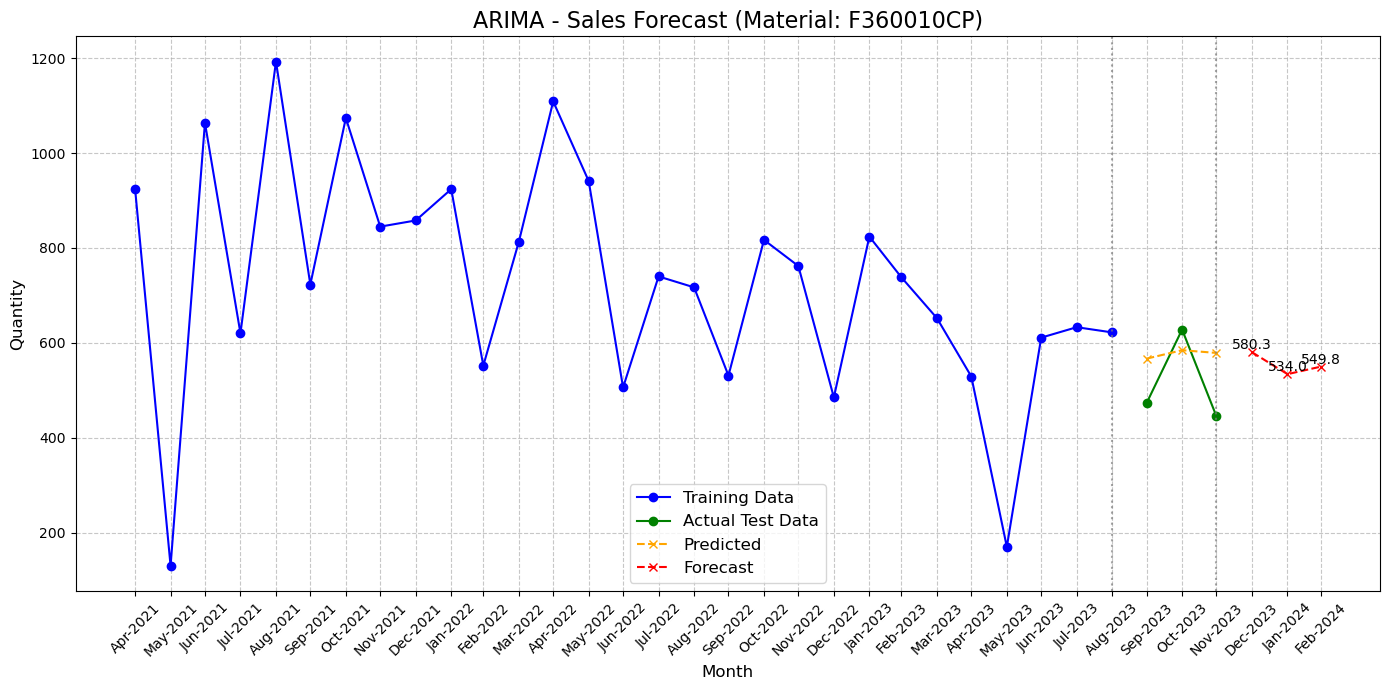

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# =========================
# 1. Load and Prepare Data
# =========================

# Read Data
df = pd.read_csv(r'C:\Users\satyarth\Downloads\set_1_converted.csv')  

# Melt the data (long format)
month_columns = df.columns[4:]
df_long = df.melt(id_vars=['Material', 'Description', 'Range', 'Subcat'], 
                  value_vars=month_columns, 
                  var_name='Month', value_name='Quantity')

# Clean Month
df_long['Month'] = df_long['Month'].str.replace('Actual', '').str.strip()

# Convert Month to datetime
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y') + pd.offsets.MonthEnd(0)

# Filter Material
df_f360010cp = df_long[df_long['Material'] == 'F360010CP'].sort_values('Month')

# Set Index
df_f360010cp = df_f360010cp.set_index('Month')

# Final Data
ts = df_f360010cp[['Quantity']]

# =========================
# 2. Stationarity Check
# =========================

result = adfuller(ts['Quantity'].dropna())
if result[1] > 0.05:
    ts_diff = ts.diff().dropna()
else:
    ts_diff = ts

# =========================
# 3. Train-Test Split
# =========================

train = ts[:-3]
test = ts[-3:]

# =========================
# 4. Modeling
# =========================

# 4.1 ARIMA
arima_model = ARIMA(train['Quantity'], order=(1,1,1))
arima_result = arima_model.fit()
arima_pred = arima_result.forecast(steps=3)

# 4.2 SARIMA
sarima_model = SARIMAX(train['Quantity'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
sarima_pred = sarima_result.forecast(steps=3)

# 4.3 Holt-Winters
hw_model = ExponentialSmoothing(train['Quantity'], trend='add', seasonal='add', seasonal_periods=12)
hw_result = hw_model.fit()
hw_pred = hw_result.forecast(steps=3)

# 4.4 Prophet
prophet_train = train.reset_index().rename(columns={'Month': 'ds', 'Quantity': 'y'})
prophet = Prophet()
prophet.fit(prophet_train)
future = prophet.make_future_dataframe(periods=3, freq='M')
forecast_prophet = prophet.predict(future)
prophet_pred = forecast_prophet[['ds', 'yhat']].set_index('ds').iloc[-3:]['yhat']

# =========================
# 5. Evaluation
# =========================

arima_mape = mean_absolute_percentage_error(test['Quantity'], arima_pred) * 100
sarima_mape = mean_absolute_percentage_error(test['Quantity'], sarima_pred) * 100
hw_mape = mean_absolute_percentage_error(test['Quantity'], hw_pred) * 100
prophet_mape = mean_absolute_percentage_error(test['Quantity'], prophet_pred) * 100

print(f"\nMAPE Scores:")
print(f"ARIMA MAPE: {arima_mape:.2f}%")
print(f"SARIMA MAPE: {sarima_mape:.2f}%")
print(f"Holt-Winters MAPE: {hw_mape:.2f}%")
print(f"Prophet MAPE: {prophet_mape:.2f}%")

# Best Model
mape_scores = {
    'ARIMA': arima_mape,
    'SARIMA': sarima_mape,
    'Holt-Winters': hw_mape,
    'Prophet': prophet_mape
}
best_model = min(mape_scores, key=mape_scores.get)
print(f"\n✅ Best Model based on MAPE: {best_model}")

# Best Predictions
if best_model == 'ARIMA':
    pred = arima_pred
elif best_model == 'SARIMA':
    pred = sarima_pred
elif best_model == 'Holt-Winters':
    pred = hw_pred
else:
    pred = prophet_pred

# =========================
# 6. Future Forecast (3 Months)
# =========================

if best_model == 'ARIMA':
    future_model = ARIMA(ts['Quantity'], order=(1,1,1)).fit()
    forecast = future_model.forecast(steps=3)
elif best_model == 'SARIMA':
    future_model = SARIMAX(ts['Quantity'], order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
    forecast = future_model.forecast(steps=3)
elif best_model == 'Holt-Winters':
    future_model = ExponentialSmoothing(ts['Quantity'], trend='add', seasonal='add', seasonal_periods=12).fit()
    forecast = future_model.forecast(steps=3)
else:
    prophet_full = Prophet()
    prophet_full.fit(ts.reset_index().rename(columns={'Month':'ds', 'Quantity':'y'}))
    future_full = prophet_full.make_future_dataframe(periods=3, freq='M')
    forecast = prophet_full.predict(future_full).set_index('ds').iloc[-3:]['yhat']

forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=3, freq='M')

print("\n📈 Predicted vs Actual (Test Set):")
print(pd.DataFrame({'Actual': test['Quantity'].values, 'Predicted': pred.values}, index=test.index))

print("\n🔮 Forecasted Future (Next 3 Months):")
print(pd.DataFrame({'Forecasted': forecast.values}, index=forecast_index))

# =========================
# 7. Plotting (continuous timeline with no gaps)
# =========================

plt.figure(figsize=(14, 7))

# Combine all data for plotting
all_dates = pd.date_range(start=train.index[0], end=forecast_index[-1], freq='M')
plot_df = pd.DataFrame(index=all_dates)
plot_df['Train'] = ts.loc[train.index, 'Quantity']
plot_df['Test'] = np.nan
plot_df.loc[test.index, 'Test'] = ts.loc[test.index, 'Quantity']
plot_df['Predicted'] = np.nan
plot_df.loc[test.index, 'Predicted'] = pred.values
plot_df['Forecast'] = np.nan
plot_df.loc[forecast_index, 'Forecast'] = forecast.values

# Plot training data
plt.plot(plot_df.index, plot_df['Train'], label='Training Data', color='blue', marker='o')

# Plot actual test data
plt.plot(plot_df.index, plot_df['Test'], label='Actual Test Data', color='green', marker='o')

# Plot predicted values
plt.plot(plot_df.index, plot_df['Predicted'], label='Predicted', color='orange', linestyle='--', marker='x')

# Plot forecasted values
plt.plot(plot_df.index, plot_df['Forecast'], label='Forecast', color='red', linestyle='--', marker='x')

# Add vertical lines to separate periods
plt.axvline(x=train.index[-1], color='gray', linestyle=':', alpha=0.7)
plt.axvline(x=test.index[-1], color='gray', linestyle=':', alpha=0.7)

# Formatting
plt.title(f'{best_model} - Sales Forecast (Material: F360010CP)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(plot_df.index, [date.strftime('%b-%Y') for date in plot_df.index], rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Add value labels for forecast points
for date, value in zip(forecast_index, forecast.values):
    plt.text(date, value, f'{value:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 5th material


In [ ]:
import pandas as pd

# 1. Load Data
file_path = r'C:\Users\satyarth\Downloads\set_1_converted.csv'
df = pd.read_csv(file_path)

# 2. Filter Material
material_code = 'F280009DCP'
df_filtered = df[df['Material'] == material_code]

# 3. Drop unnecessary columns
drop_cols = ['Material', 'Description', 'Range', 'Subcat']
df_filtered = df_filtered.drop(columns=drop_cols)

# 4. Melt the dataframe to long format (Month-wise)
df_long = df_filtered.melt(var_name='Month', value_name='Quantity')

# 5. Clean 'Month' column
df_long['Month'] = df_long['Month'].str.replace('Actual', '').str.strip()

# 6. Convert to datetime (end of month)
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y') + pd.offsets.MonthEnd(0)

# 7. Set 'Month' as index
df_long = df_long.set_index('Month').sort_index()

# 8. Print Output
print("✅ Final Time Series Data:")
print(df_long)




✅ Final Time Series Data:
            Quantity
Month               
2021-04-30       667
2021-05-31       107
2021-06-30       951
2021-07-31      1640
2021-08-31      2349
2021-09-30       515
2021-10-31       796
2021-11-30      1334
2021-12-31      1203
2022-01-31      1021
2022-02-28       608
2022-03-31       682
2022-04-30       863
2022-05-31       887
2022-06-30      1445
2022-07-31       608
2022-08-31       428
2022-09-30       427
2022-10-31       502
2022-11-30       419
2022-12-31       332
2023-01-31       283
2023-02-28       553
2023-03-31       356
2023-04-30       430
2023-05-31       445
2023-06-30       466
2023-07-31        19
2023-08-31       166
2023-09-30       415
2023-10-31       262
2023-11-30       314


🔎 Basic Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2021-04-30 to 2023-11-30
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Quantity  32 non-null     int64
dtypes: int64(1)
memory usage: 512.0 bytes
None


🔎 Missing Values:
Quantity    0
dtype: int64


🔎 Descriptive Statistics:
          Quantity
count    32.000000
mean    671.656250
std     492.121583
min      19.000000
25%     400.250000
50%     508.500000
75%     869.000000
max    2349.000000




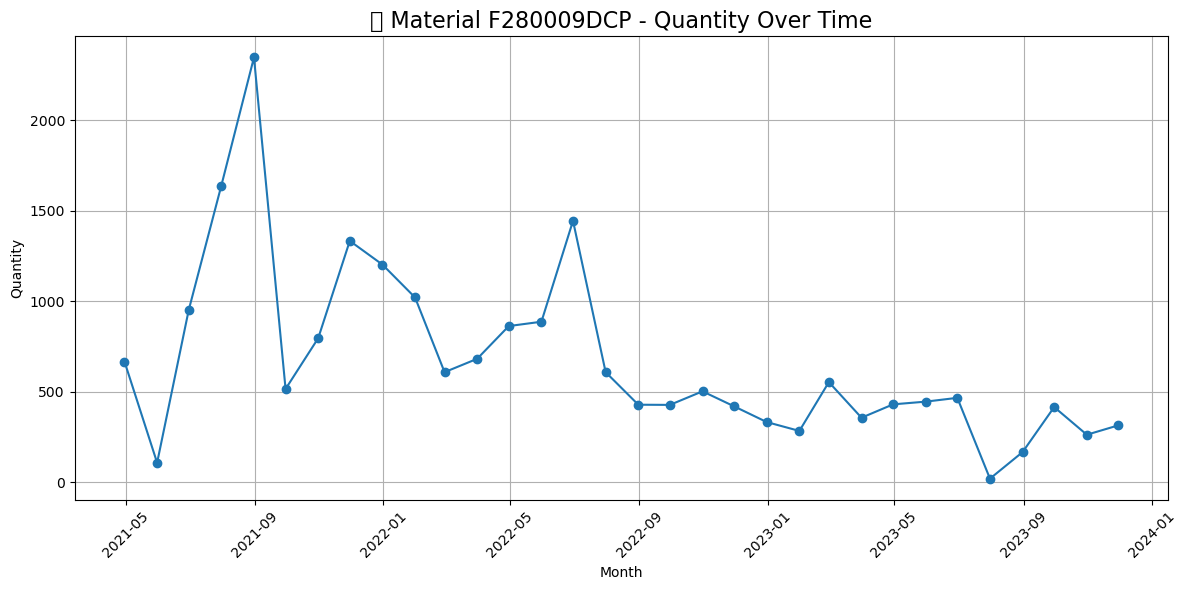

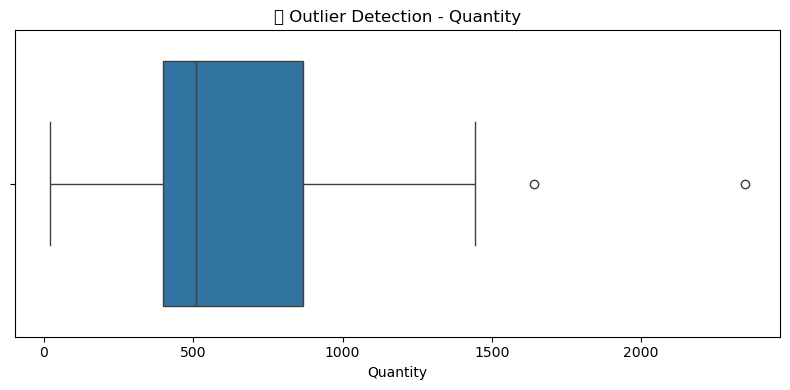

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic Info
print("🔎 Basic Info:")
print(df_long.info())
print("\n")

# 2. Missing Values
print("🔎 Missing Values:")
print(df_long.isnull().sum())
print("\n")

# 3. Descriptive Statistics
print("🔎 Descriptive Statistics:")
print(df_long.describe())
print("\n")

# 4. Plot the time series
plt.figure(figsize=(12,6))
plt.plot(df_long.index, df_long['Quantity'], marker='o')
plt.title('📈 Material F280009DCP - Quantity Over Time', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Detect Outliers (using Boxplot)
plt.figure(figsize=(8,4))
sns.boxplot(x=df_long['Quantity'])
plt.title('📦 Outlier Detection - Quantity')
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test
result = adfuller(df_long['Quantity'])
print('🧪 ADF Statistic:', result[0])
print('📉 p-value:', result[1])

if result[1] > 0.05:
    print("🔴 Data is Non-Stationary. Performing 1st Order Differencing...")
    df_long['Quantity_diff'] = df_long['Quantity'].diff().dropna()
    
    # ADF Test again after differencing
    result_diff = adfuller(df_long['Quantity_diff'].dropna())
    print('🧪 ADF Statistic after Differencing:', result_diff[0])
    print('📉 p-value after Differencing:', result_diff[1])
else:
    print("🟢 Data is Stationary. No differencing needed.")


🧪 ADF Statistic: -1.3488665389936696
📉 p-value: 0.6065301247519558
🔴 Data is Non-Stationary. Performing 1st Order Differencing...
🧪 ADF Statistic after Differencing: -1.4108323397259344
📉 p-value after Differencing: 0.5770720823482706


In [ ]:
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
import numpy as np

# --- Box-Cox Transformation ---
df_long['Quantity_boxcox'], lam = boxcox(df_long['Quantity'].dropna())
print(f"✅ Box-Cox Transformation Applied. Lambda used: {lam:.4f}")

# --- ADF Test After Box-Cox Transformation ---
adf_result_boxcox = adfuller(df_long['Quantity_boxcox'])

print('🧪 ADF Statistic after Box-Cox:', adf_result_boxcox[0])
print('📉 p-value after Box-Cox:', adf_result_boxcox[1])

if adf_result_boxcox[1] > 0.05:
    print("🔴 Still Non-Stationary after Box-Cox. Applying 1st Order Differencing...")
    df_long['Quantity_boxcox_diff'] = df_long['Quantity_boxcox'].diff().dropna()
    
    # ADF again after Differencing
    adf_result_diff = adfuller(df_long['Quantity_boxcox_diff'].dropna())
    print('🧪 ADF Statistic after Box-Cox + Differencing:', adf_result_diff[0])
    print('📉 p-value after Box-Cox + Differencing:', adf_result_diff[1])
else:
    print("🟢 Stationary after Box-Cox. No differencing needed.")


✅ Box-Cox Transformation Applied. Lambda used: 0.3682
🧪 ADF Statistic after Box-Cox: -3.0870766290715577
📉 p-value after Box-Cox: 0.02752447623049925
🟢 Stationary after Box-Cox. No differencing needed.


✅ Box-Cox Lambda: 0.3682


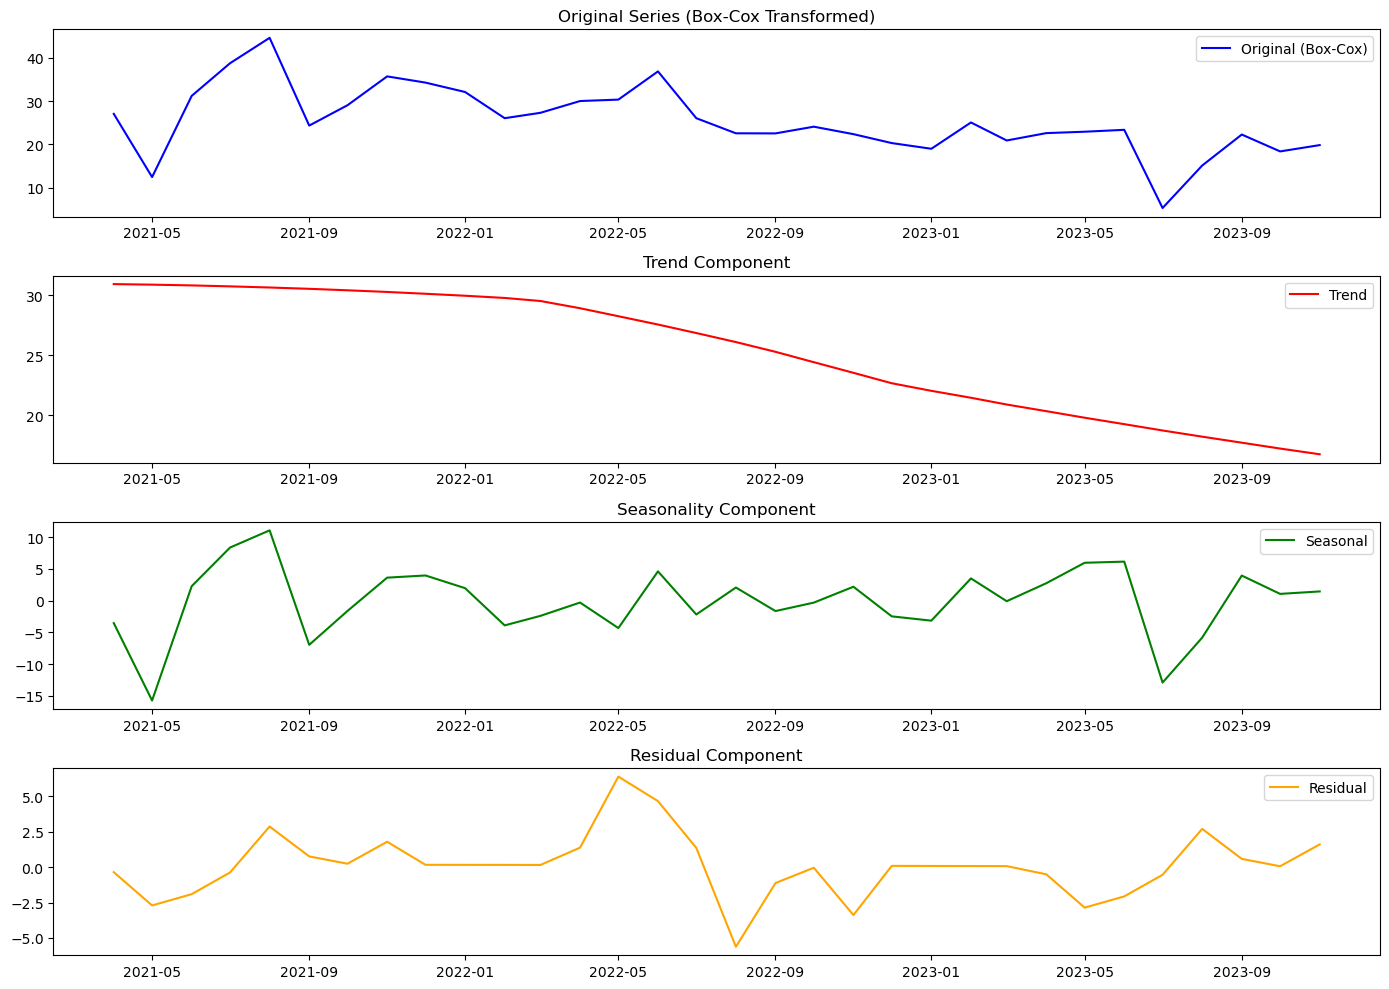


📊 STL Component Strengths:
Trend Strength: 0.8440
Seasonality Strength: 0.8598
Residual Strength (Error Part): -0.7038


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# --- Step 1: Load Data ---
df = pd.read_csv(r'C:\Users\satyarth\Downloads\set_1_converted.csv')

# --- Step 2: Filter Material ---
material_code = 'F280009DCP'
df_filtered = df[df['Material'] == material_code]

# --- Step 3: Reshape (Melt) Data ---
df_long = df_filtered.melt(
    id_vars=['Material', 'Description', 'Range', 'Subcat'],
    var_name='Month',
    value_name='Quantity'
)

# --- Step 4: Clean Month Column ---
df_long['Month'] = df_long['Month'].str.replace(' Actual', '')   # Remove ' Actual'
df_long['Month'] = df_long['Month'].str.strip()                  # Remove leading/trailing spaces
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y')  # Correct format: 'Apr 23' etc
df_long = df_long.sort_values('Month').reset_index(drop=True)

# --- Step 5: Handle 0 values (for Box-Cox) ---
df_long['Quantity'] = df_long['Quantity'].replace(0, 0.01)

# --- Step 6: Box-Cox Transformation ---
df_long['Quantity_boxcox'], lam = boxcox(df_long['Quantity'])
print(f"✅ Box-Cox Lambda: {lam:.4f}")

# --- Step 7: STL Decomposition (with correct period) ---
stl = STL(df_long['Quantity_boxcox'], period=12)  # <<< Corrected here!
result = stl.fit()

trend = result.trend
seasonal = result.seasonal
residual = result.resid

# --- Step 8: Plot STL ---
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(df_long['Month'], df_long['Quantity_boxcox'], label='Original (Box-Cox)', color='blue')
plt.title('Original Series (Box-Cox Transformed)')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(df_long['Month'], trend, label='Trend', color='red')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df_long['Month'], seasonal, label='Seasonal', color='green')
plt.title('Seasonality Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(df_long['Month'], residual, label='Residual', color='orange')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

# --- Step 9: STL Strength Analysis ---
T = trend
S = seasonal
R = residual

trend_strength = max(0, 1 - (np.var(R) / np.var(T + R)))
seasonal_strength = max(0, 1 - (np.var(R) / np.var(S + R)))

print("\n📊 STL Component Strengths:")
print(f"Trend Strength: {trend_strength:.4f}")
print(f"Seasonality Strength: {seasonal_strength:.4f}")
print(f"Residual Strength (Error Part): {1 - (trend_strength + seasonal_strength):.4f}")




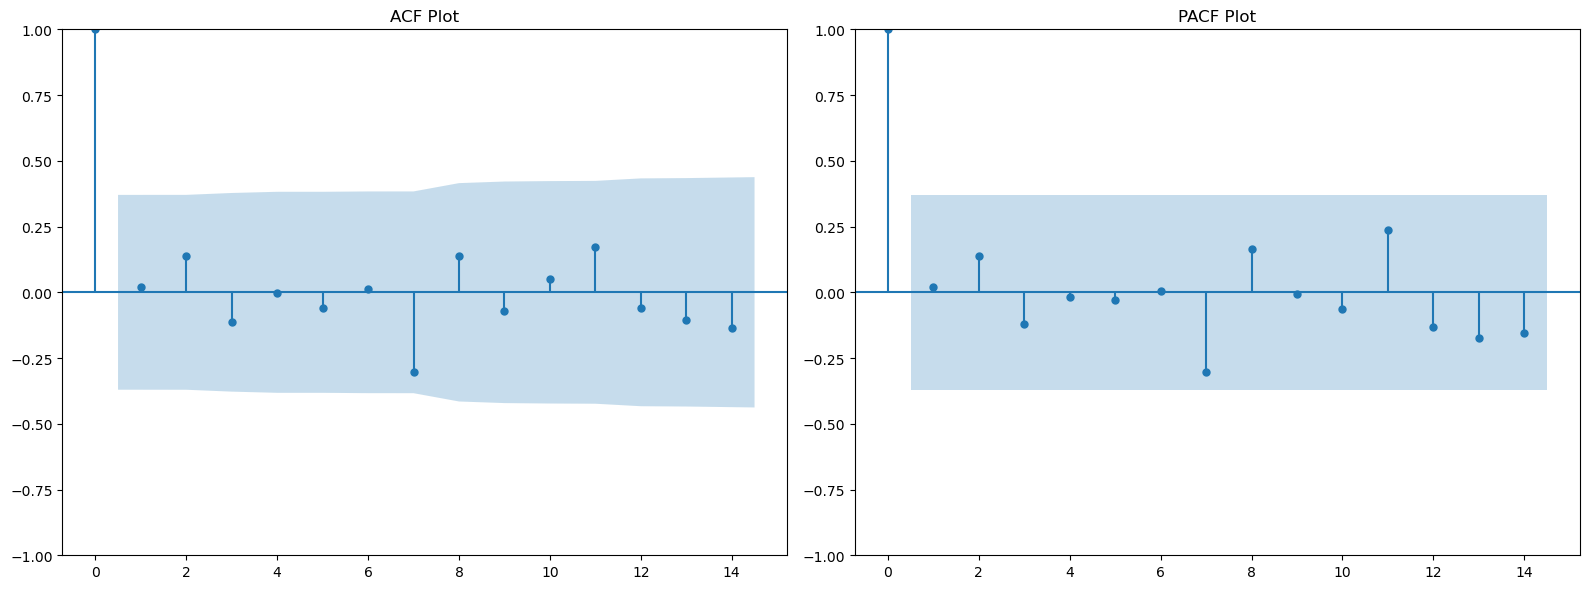

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Train data ke 'Quantity' par lagayenge
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Calculate the maximum allowable lags (50% of the sample size)
max_lags = len(train['Quantity']) // 2

# Plot ACF
plot_acf(train['Quantity'], lags=max_lags, ax=axes[0])
axes[0].set_title('ACF Plot')

# Plot PACF
plot_pacf(train['Quantity'], lags=max_lags, ax=axes[1], method='ywm')
axes[1].set_title('PACF Plot')

plt.tight_layout()
plt.show()


In [ ]:
print(df.columns)

Index(['Material', 'Description', 'Range', 'Subcat', 'Apr 21 Actual',
       'May 21 Actual', 'Jun 21 Actual', 'Jul 21 Actual', 'Aug 21 Actual',
       'Sep 21 Actual', 'Oct 21 Actual', 'Nov 21 Actual', 'Dec 21 Actual',
       'Jan 22 Actual', 'Feb 22 Actual', 'Mar 22 Actual', 'Apr 22 Actual',
       'May 22 Actual', 'Jun 22 Actual', 'Jul 22 Actual', 'Aug 22 Actual',
       'Sep 22 Actual', 'Oct 22 Actual', 'Nov 22 Actual', 'Dec 22 Actual',
       'Jan 23 Actual', 'Feb 23 Actual', 'Mar 23 Actual', ' Apr 23 Actual',
       ' May 23 Actual', ' Jun 23 Actual', ' Jul 23 Actual', ' Aug 23 Actual',
       ' Sep 23 Actual', ' Oct 23 Actual', 'Nov 23 Actual'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

# --- Step 1: Assume df_long ready hai ---

# --- Step 2: Train-Test Split ---
train = df_long.iloc[:-4].copy()
test = df_long.iloc[-4:].copy()

# --- Step 3: Initialize Result DataFrame ---
results = pd.DataFrame(columns=['Model', 'MAPE', 'Forecast'])

# --- Step 4: Modeling ---

# 1. ARIMA
model_arima = ARIMA(train['Quantity'], order=(1,1,0))
model_arima_fit = model_arima.fit()
pred_arima = model_arima_fit.forecast(steps=4)
mape_arima = mean_absolute_percentage_error(test['Quantity'], pred_arima) * 100
forecast_arima = model_arima_fit.forecast(steps=7)[-3:]
results = pd.concat([
    results,
    pd.DataFrame([{'Model': 'ARIMA', 'MAPE': mape_arima, 'Forecast': forecast_arima.values}])
], ignore_index=True)

# 2. SARIMA
model_sarima = SARIMAX(train['Quantity'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_sarima_fit = model_sarima.fit()
pred_sarima = model_sarima_fit.forecast(steps=4)
mape_sarima = mean_absolute_percentage_error(test['Quantity'], pred_sarima) * 100
forecast_sarima = model_sarima_fit.forecast(steps=7)[-3:]
results = pd.concat([
    results,
    pd.DataFrame([{'Model': 'SARIMA', 'MAPE': mape_sarima, 'Forecast': forecast_sarima.values}])
], ignore_index=True)

# 3. HWES
model_hwes = ExponentialSmoothing(train['Quantity'], trend='add', seasonal='add', seasonal_periods=12)
model_hwes_fit = model_hwes.fit()
pred_hwes = model_hwes_fit.forecast(steps=4)
mape_hwes = mean_absolute_percentage_error(test['Quantity'], pred_hwes) * 100
forecast_hwes = model_hwes_fit.forecast(steps=7)[-3:]
results = pd.concat([
    results,
    pd.DataFrame([{'Model': 'HWES', 'MAPE': mape_hwes, 'Forecast': forecast_hwes.values}])
], ignore_index=True)

# 4. Prophet
# Clean the Month column to remove leading/trailing spaces
train['Month'] = train['Month'].str.strip()

# Ensure the Month column is in datetime format
train['Month'] = pd.to_datetime(train['Month'], format='%b %y', errors='coerce')

# Drop rows with invalid dates
train = train.dropna(subset=['Month'])

# Proceed with Prophet modeling
df_prophet = train[['Month', 'Quantity']].rename(columns={'Month': 'ds', 'Quantity': 'y'})
model_prophet = Prophet(seasonality_mode='additive', yearly_seasonality=True)
model_prophet.fit(df_prophet)
future = model_prophet.make_future_dataframe(periods=7, freq='M')
forecast_prophet = model_prophet.predict(future)

# Prophet ke prediction se test wale 4 points nikaalne
pred_prophet = forecast_prophet.iloc[-(7+4):-7]['yhat'].values
mape_prophet = mean_absolute_percentage_error(test['Quantity'], pred_prophet) * 100

# Prophet ka future forecast (last 3 months)
forecast_future_prophet = forecast_prophet.iloc[-3:]['yhat'].values
results = pd.concat([
    results,
    pd.DataFrame([{'Model': 'Prophet', 'MAPE': mape_prophet, 'Forecast': forecast_future_prophet}])
], ignore_index=True)

# --- Step 5: Show Results ---
print("✅ Modeling Completed Successfully!\n")
print(results)



01:38:45 - cmdstanpy - INFO - Chain [1] start processing
01:38:45 - cmdstanpy - INFO - Chain [1] done processing


✅ Modeling Completed Successfully!

     Model       MAPE                                           Forecast
0    ARIMA  33.591045  [353.8264655215858, 350.5564699511458, 352.390...
1   SARIMA  70.191956  [1247.675515632361, 2547.5790972373416, 834.46...
2     HWES  77.672477  [901.6200631337732, 1932.125452786584, 298.942...
3  Prophet  59.018062  [413.1137407016664, 779.2155612348887, 408.121...


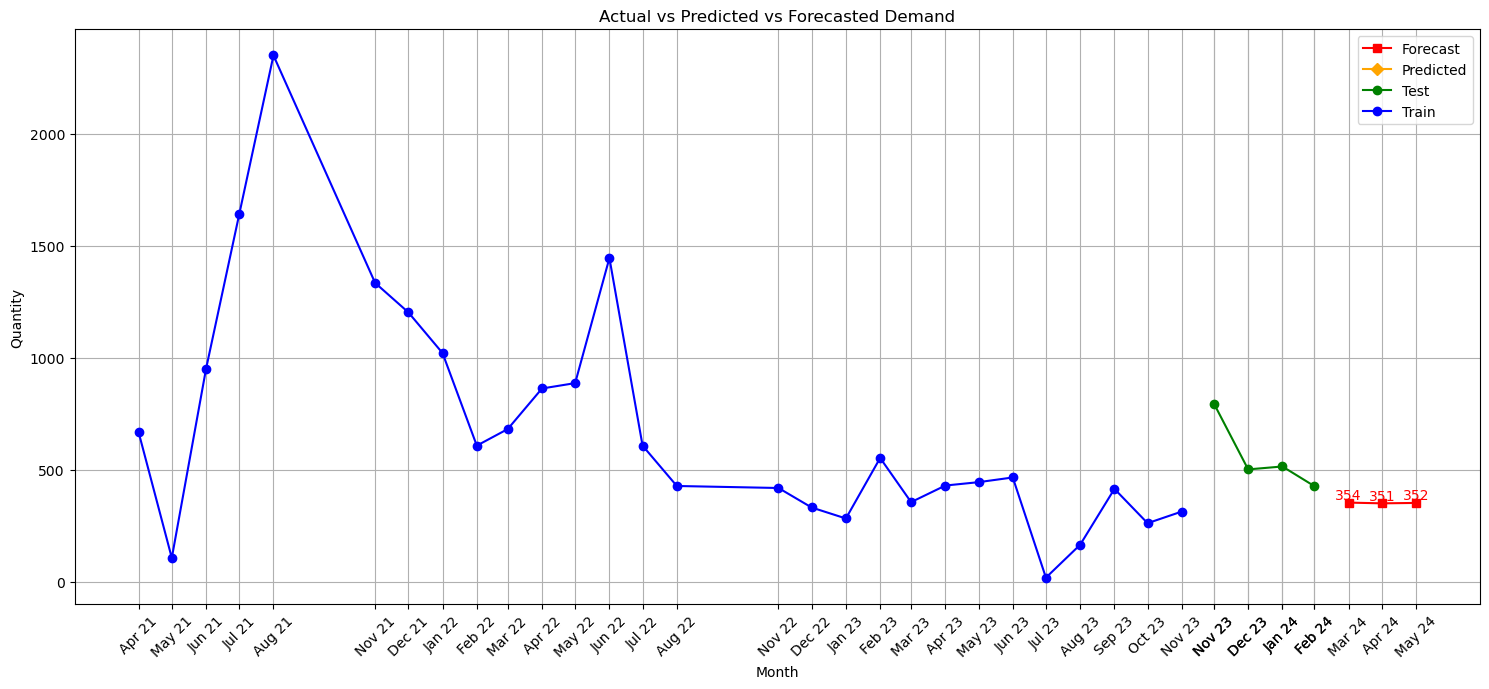

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Pehle sab data ek jagah ready karte hain
train_pred = train[['Month', 'Quantity']].copy()
train_pred['Type'] = 'Train'

test_pred = test[['Month', 'Quantity']].copy()
test_pred['Type'] = 'Test'

# Predicted test values
pred_test = pd.DataFrame({
    'Month': test['Month'],
    'Quantity': pred_arima,  # yeh predicted values jo ARIMA ya kisi model se aaye
    'Type': 'Predicted'
})

# Future forecast values
forecast_months = pd.date_range(start=test['Month'].iloc[-1] + pd.offsets.MonthEnd(1), periods=3, freq='M')
forecast_df = pd.DataFrame({
    'Month': forecast_months,
    'Quantity': forecast_arima,  # future forecasted values
    'Type': 'Forecast'
})

# Combine sabko
plot_df = pd.concat([train_pred, test_pred, pred_test, forecast_df])

# Sorting zaruri hai taaki x-axis smooth ho
plot_df = plot_df.sort_values('Month')

# Plot karte hain
plt.figure(figsize=(15, 7))

colors = {'Train': 'blue', 'Test': 'green', 'Predicted': 'orange', 'Forecast': 'red'}
markers = {'Train': 'o', 'Test': 'o', 'Predicted': 'D', 'Forecast': 's'}

for label, df_ in plot_df.groupby('Type'):
    plt.plot(df_['Month'], df_['Quantity'], label=label, color=colors[label], marker=markers[label])

# Forecasted values ke upar likh de values
for i in range(len(forecast_df)):
    plt.text(forecast_df['Month'].iloc[i], 
             forecast_df['Quantity'].iloc[i] + 2,  # thoda upar
             f"{forecast_df['Quantity'].iloc[i]:.0f}",
             color='red', ha='center', va='bottom', fontsize=10)

# X-axis tight aur saare months dikhen bina gaps ke
plt.xticks(plot_df['Month'], plot_df['Month'].dt.strftime('%b %y'), rotation=45)

plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Actual vs Predicted vs Forecasted Demand')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


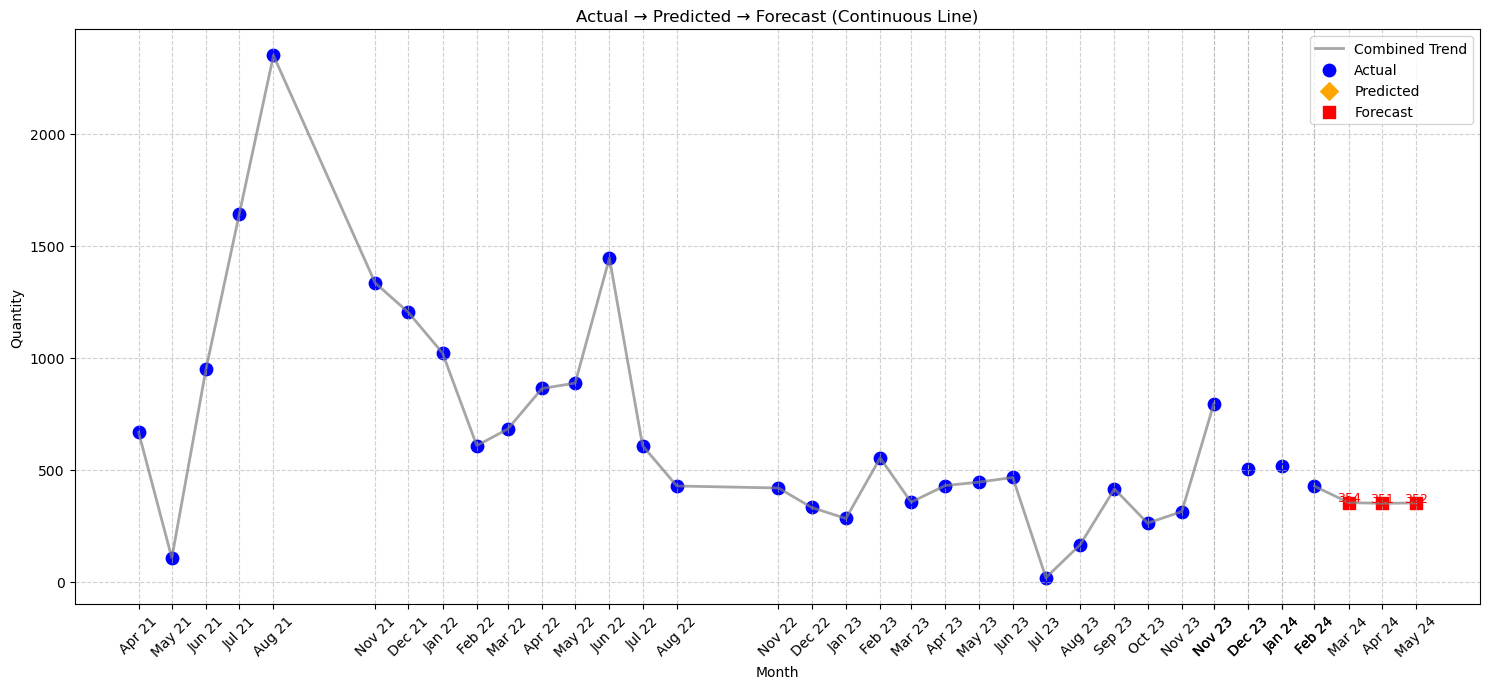

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Step 1: Prepare DataFrames ---
# Actual (Train + Test)
actual_df = pd.concat([train[['Month', 'Quantity']], test[['Month', 'Quantity']]])
actual_df['Type'] = 'Actual'

# Predicted (Test Period)
predicted_df = pd.DataFrame({
    'Month': test['Month'],
    'Quantity': pred_arima,
    'Type': 'Predicted'
})

# Forecast (Future 3 Months)
future_months = pd.date_range(
    start=test['Month'].iloc[-1] + pd.offsets.MonthEnd(1), 
    periods=3, 
    freq='M'
)
forecast_df = pd.DataFrame({
    'Month': future_months,
    'Quantity': forecast_arima,
    'Type': 'Forecast'
})

# --- Step 2: Merge and Sort ---
plot_df = pd.concat([actual_df, predicted_df, forecast_df]).sort_values('Month')

# --- Step 3: Plot with Connected Line ---
plt.figure(figsize=(15, 7))

# 1. Main Connected Line (No Gaps)
plt.plot(plot_df['Month'], plot_df['Quantity'], 
         color='grey', linestyle='-', linewidth=2, alpha=0.7, 
         label='Combined Trend')

# 2. Phase-Specific Markers (Actual/Predicted/Forecast)
phases = {
    'Actual': ('blue', 'o', actual_df),
    'Predicted': ('orange', 'D', predicted_df),
    'Forecast': ('red', 's', forecast_df)
}

for label, (color, marker, df) in phases.items():
    plt.scatter(df['Month'], df['Quantity'], 
                color=color, label=label, marker=marker, s=80)

# 3. Annotate Forecast Values
for _, row in forecast_df.iterrows():
    plt.text(row['Month'], row['Quantity'] + 5, 
             f"{row['Quantity']:.0f}", 
             color='red', ha='center', fontsize=9)

# --- Formatting ---
plt.xticks(plot_df['Month'], plot_df['Month'].dt.strftime('%b %y'), rotation=45)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Actual → Predicted → Forecast (Continuous Line)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# for 6th material

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(r'C:\Users\satyarth\Downloads\set_1_converted.csv')

# Step 1: Reshape the Data
df_long = df.melt(id_vars=['Material', 'Description', 'Range', 'Subcat'], 
                  var_name='Month', value_name='Quantity')

# Step 2: Clean 'Month' column
df_long['Month'] = df_long['Month'].str.replace(' Actual', '').str.strip()
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y')

# Step 3: Filter Material
material_code = 'F360016CP'
df_material = df_long[df_long['Material'] == material_code]



✅ Basic Information:

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 5 to 191
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Material     32 non-null     object        
 1   Description  32 non-null     object        
 2   Range        32 non-null     object        
 3   Subcat       32 non-null     object        
 4   Month        32 non-null     datetime64[ns]
 5   Quantity     32 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.8+ KB
None

✅ Summary Statistics:

count      32.000000
mean      624.531250
std       387.497845
min        76.000000
25%       332.000000
50%       628.000000
75%       795.750000
max      1949.000000
Name: Quantity, dtype: float64

✅ Missing Values:

Material       0
Description    0
Range          0
Subcat         0
Month          0
Quantity       0
dtype: int64


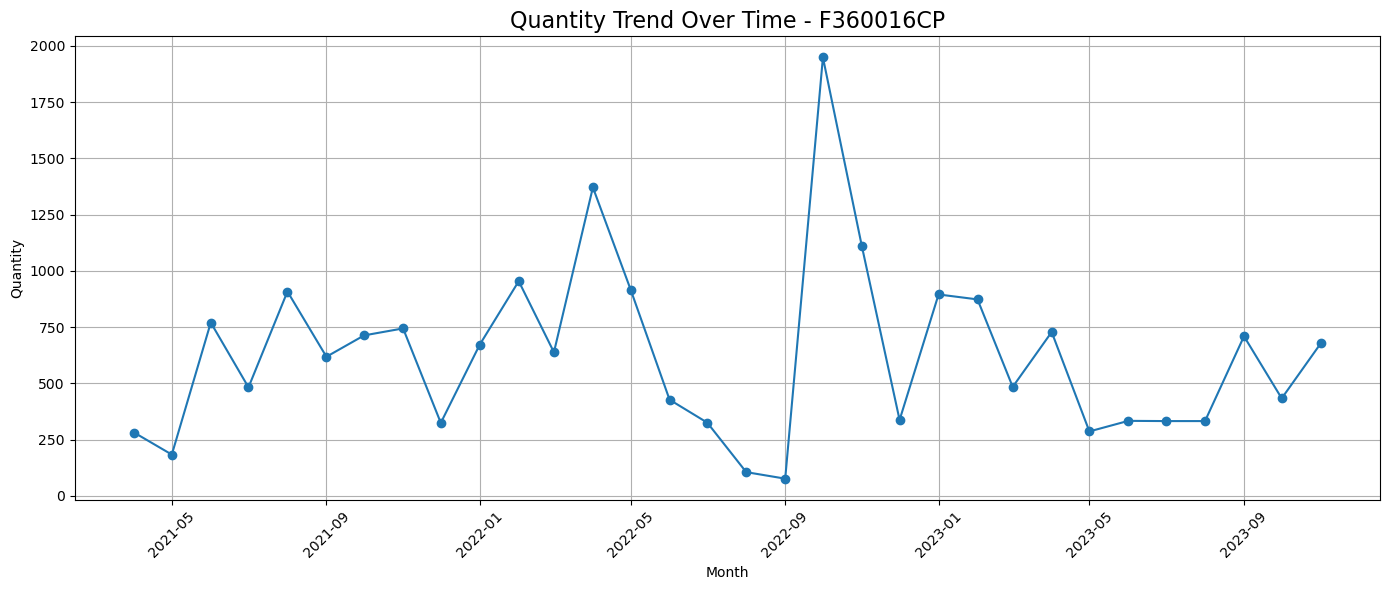

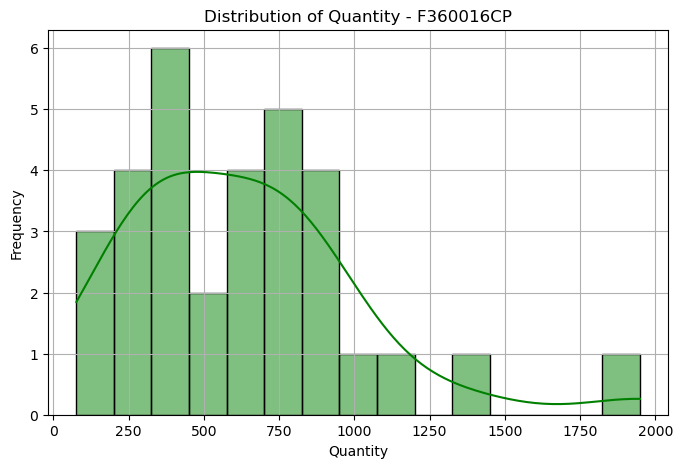

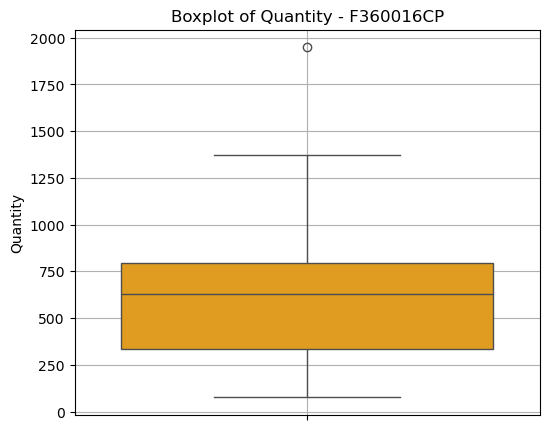

<Figure size 1200x500 with 0 Axes>

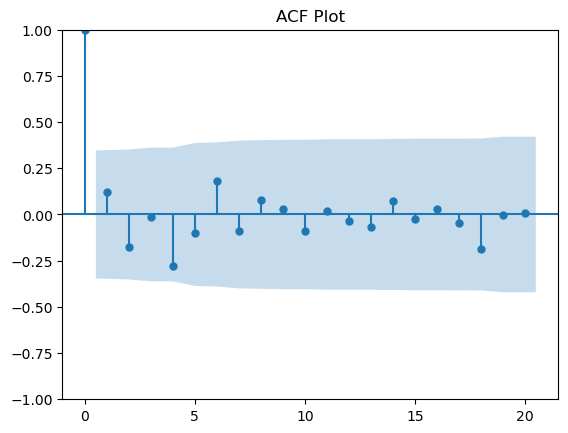

<Figure size 1200x500 with 0 Axes>

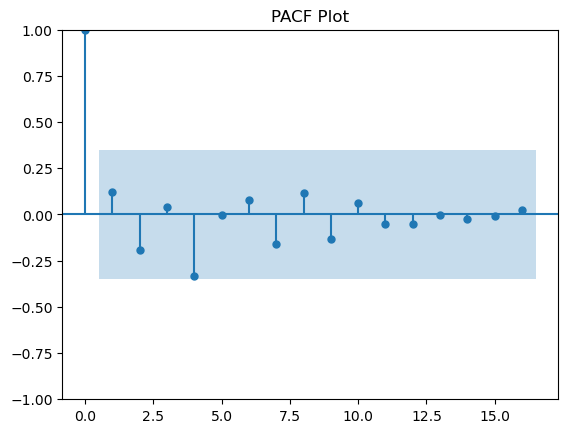

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r'C:\Users\satyarth\Downloads\set_1_converted.csv')

# Reshape
df_long = df.melt(id_vars=['Material', 'Description', 'Range', 'Subcat'],
                  var_name='Month', value_name='Quantity')

# Clean Month column
df_long['Month'] = df_long['Month'].str.replace(' Actual', '').str.strip()
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y')

# Filter Material
material_code = 'F360016CP'
df_material = df_long[df_long['Material'] == material_code]

# --------------- EDA START ---------------

print("✅ Basic Information:\n")
print(df_material.info())

print("\n✅ Summary Statistics:\n")
print(df_material['Quantity'].describe())

# Check Missing Values
print("\n✅ Missing Values:\n")
print(df_material.isnull().sum())

# Plot Quantity Over Time
plt.figure(figsize=(14,6))
plt.plot(df_material['Month'], df_material['Quantity'], marker='o', linestyle='-')
plt.title(f'Quantity Trend Over Time - {material_code}', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribution Plot
plt.figure(figsize=(8,5))
sns.histplot(df_material['Quantity'], kde=True, color='green', bins=15)
plt.title(f'Distribution of Quantity - {material_code}')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot to check outliers
plt.figure(figsize=(6,5))
sns.boxplot(y=df_material['Quantity'], color='orange')
plt.title(f'Boxplot of Quantity - {material_code}')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

# ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,5))
plot_acf(df_material['Quantity'].dropna(), lags=20)
plt.title('ACF Plot')
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(df_material['Quantity'].dropna(), lags=16)
plt.title('PACF Plot')
plt.show()


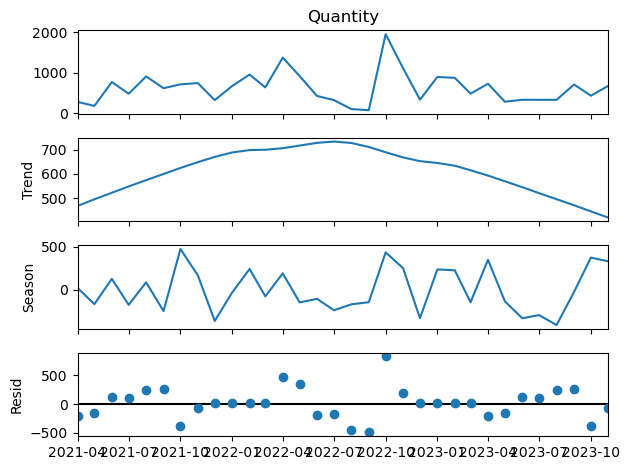

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Load data
path = r'C:\Users\satyarth\Downloads\set_1_converted.csv'
df = pd.read_csv(path)

# Filter specific material
sku = 'F360016CP'
df_sku = df[df['Material'] == sku]

# Drop first 4 columns (Material, Description, Range, Subcat)
df_sku = df_sku.drop(columns=df.columns[:4]).T
df_sku.columns = ['Quantity']

# Clean index (remove extra spaces and 'Actual')
df_sku.index = df_sku.index.str.strip()
df_sku.index = df_sku.index.str.replace(' Actual', '', regex=False)

# Convert index to datetime
df_sku.index = pd.to_datetime(df_sku.index, format='%b %y')
df_sku = df_sku.sort_index()

# STL Decomposition
stl = STL(df_sku['Quantity'], seasonal=13)
result = stl.fit()

# Plot the decomposition
result.plot()
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Load data
path = r'C:\Users\satyarth\Downloads\set_1_converted.csv'
df = pd.read_csv(path)

# Filter specific material
sku = 'F360016CP'
df_sku = df[df['Material'] == sku]

# Drop first 4 columns (Material, Description, Range, Subcat)
df_sku = df_sku.drop(columns=df.columns[:4]).T
df_sku.columns = ['Quantity']

# Clean index (remove extra spaces and 'Actual')
df_sku.index = df_sku.index.str.strip()
df_sku.index = df_sku.index.str.replace(' Actual', '', regex=False)

# Convert index to datetime
df_sku.index = pd.to_datetime(df_sku.index, format='%b %y')
df_sku = df_sku.sort_index()

# ---------------- ADF Test ----------------
def adf_test(series, title=''):
    print(f'ADF Test: {title}')
    result = adfuller(series, autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations']
    for value, label in zip(result[:4], labels):
        print(f'{label} : {value}')
    if result[1] <= 0.05:
        print("=> Strong evidence against null hypothesis, data is stationary ✅")
    else:
        print("=> Weak evidence against null hypothesis, data is non-stationary 🚫")
    print('\n')

# Apply ADF test on original
adf_test(df_sku['Quantity'], title='Original Series')

# If non-stationary, difference and test again
if adfuller(df_sku['Quantity'])[1] > 0.05:
    df_sku_diff = df_sku.diff().dropna()
    adf_test(df_sku_diff['Quantity'], title='1st Order Differenced Series')


ADF Test: Original Series
ADF Statistic : -4.81929758077187
p-value : 4.9946822506937944e-05
# Lags Used : 0
# Observations : 31
=> Strong evidence against null hypothesis, data is stationary ✅




In [ ]:
df_material.columns = df_material.columns.str.strip()


In [ ]:
import pandas as pd

# 1. Load the data
df_material = pd.read_csv(r'C:\Users\satyarth\Downloads\set_1_converted.csv')

# 2. Strip spaces from column names
df_material.columns = df_material.columns.str.strip()

# 3. Select necessary columns
required_cols = [
    'Material', 'Description',
    'Apr 21 Actual', 'May 21 Actual', 'Jun 21 Actual', 'Jul 21 Actual', 'Aug 21 Actual',
    'Sep 21 Actual', 'Oct 21 Actual', 'Nov 21 Actual', 'Dec 21 Actual',
    'Jan 22 Actual', 'Feb 22 Actual', 'Mar 22 Actual', 'Apr 22 Actual',
    'May 22 Actual', 'Jun 22 Actual', 'Jul 22 Actual', 'Aug 22 Actual',
    'Sep 22 Actual', 'Oct 22 Actual', 'Nov 22 Actual', 'Dec 22 Actual',
    'Jan 23 Actual', 'Feb 23 Actual', 'Mar 23 Actual', 'Apr 23 Actual',
    'May 23 Actual', 'Jun 23 Actual', 'Jul 23 Actual', 'Aug 23 Actual',
    'Sep 23 Actual', 'Oct 23 Actual', 'Nov 23 Actual'
]

df_material = df_material[required_cols]

# 4. Filter specific material
df_selected = df_material[df_material['Material'] == 'F360016CP']

# 5. Melt the data (wide to long format)
df_long = df_selected.melt(id_vars=['Material', 'Description'], 
                           var_name='Month', 
                           value_name='Quantity')

# 6. Clean Month column and convert to datetime
df_long['Month'] = df_long['Month'].str.replace(' Actual', '').str.strip()
df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b %y') + pd.offsets.MonthEnd(0)

# 7. Sort
df_long = df_long.sort_values('Month')

# 8. Set Month as index
df_long = df_long.set_index('Month')

# 9. Drop Material, Description columns for modeling
df_final = df_long[['Quantity']]

# 10. Train-Test Split
train = df_final.iloc[:-4]
test = df_final.iloc[-4:]

print("Train shape:", train.shape)
print("Test shape:", test.shape)

print("\nTrain Data:")
print(train.tail())

print("\nTest Data:")
print(test)




Train shape: (28, 1)
Test shape: (4, 1)

Train Data:
            Quantity
Month               
2023-03-31       484
2023-04-30       728
2023-05-31       286
2023-06-30       333
2023-07-31       332

Test Data:
            Quantity
Month               
2023-08-31       332
2023-09-30       709
2023-10-31       433
2023-11-30       677


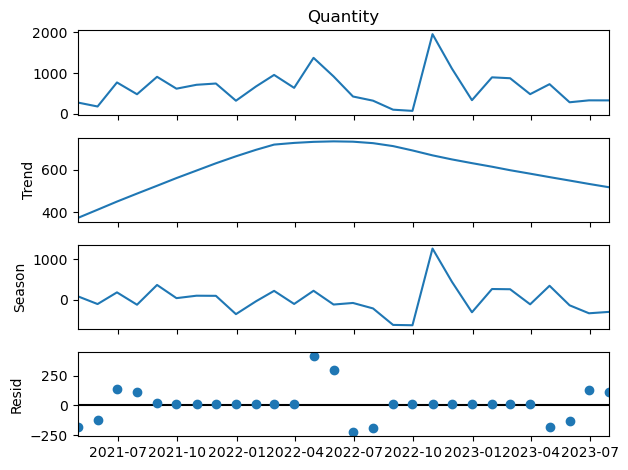

12:25:21 - cmdstanpy - INFO - Chain [1] start processing
12:25:23 - cmdstanpy - INFO - Chain [1] done processing


          Model      MAPE
0         Naive  0.318648
2          Holt  0.335620
1           SES  0.336315
4         ARIMA  0.348029
3  Holt_Winters  0.729442
5       Prophet  2.459381

✅ Best Model: Naive

📈 Final 3 Months Forecast:
            Forecast
2023-12-31       677
2024-01-31       677
2024-02-29       677


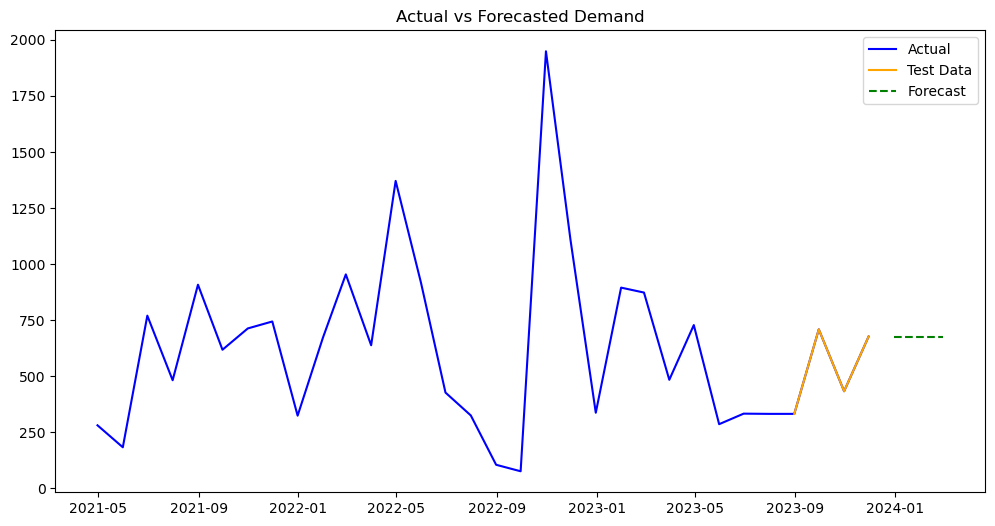

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
from prophet import Prophet
from statsmodels.tsa.seasonal import STL

# 1. DATA IS ALREADY READY:
# -> train, test are ready from last step

# 2. STL Decomposition
stl = STL(train['Quantity'], seasonal=13)
res = stl.fit()
res.plot()
plt.show()

# 3. Models Training

results = {}

## (a) Naive Forecast
naive_forecast = train['Quantity'].iloc[-1]
naive_preds = np.repeat(naive_forecast, len(test))
mape_naive = mean_absolute_percentage_error(test['Quantity'], naive_preds)
results['Naive'] = mape_naive

## (b) Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(train['Quantity']).fit()
ses_preds = ses_model.forecast(len(test))
mape_ses = mean_absolute_percentage_error(test['Quantity'], ses_preds)
results['SES'] = mape_ses

## (c) Holt’s Linear Trend
holt_model = ExponentialSmoothing(train['Quantity'], trend='add', seasonal=None).fit()
holt_preds = holt_model.forecast(len(test))
mape_holt = mean_absolute_percentage_error(test['Quantity'], holt_preds)
results['Holt'] = mape_holt

## (d) Holt-Winters (additive seasonality)
hw_model = ExponentialSmoothing(train['Quantity'], trend='add', seasonal='add', seasonal_periods=12).fit()
hw_preds = hw_model.forecast(len(test))
mape_hw = mean_absolute_percentage_error(test['Quantity'], hw_preds)
results['Holt_Winters'] = mape_hw

## (e) ARIMA (auto params try simple first)
arima_model = ARIMA(train['Quantity'], order=(1,1,1)).fit()
arima_preds = arima_model.forecast(len(test))
mape_arima = mean_absolute_percentage_error(test['Quantity'], arima_preds)
results['ARIMA'] = mape_arima

## (f) Prophet
# Prophet needs special df format
df_prophet = train.reset_index()
df_prophet.columns = ['ds', 'y']

model_prophet = Prophet(seasonality_mode='additive', yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model_prophet.fit(df_prophet)

future = model_prophet.make_future_dataframe(periods=len(test), freq='M')
forecast = model_prophet.predict(future)

prophet_preds = forecast['yhat'].iloc[-len(test):].values
mape_prophet = mean_absolute_percentage_error(test['Quantity'], prophet_preds)
results['Prophet'] = mape_prophet

# 4. Compare MAPE results
result_df = pd.DataFrame(list(results.items()), columns=['Model', 'MAPE'])
result_df = result_df.sort_values('MAPE')

print(result_df)

# 5. Best model select
best_model_name = result_df.iloc[0]['Model']
print("\n✅ Best Model:", best_model_name)

# 6. Train final model on full data (train+test) and Forecast 3 months ahead
full_series = pd.concat([train, test])

if best_model_name == 'Naive':
    forecast_final = np.repeat(full_series['Quantity'].iloc[-1], 3)

elif best_model_name == 'SES':
    final_model = SimpleExpSmoothing(full_series['Quantity']).fit()
    forecast_final = final_model.forecast(3)

elif best_model_name == 'Holt':
    final_model = ExponentialSmoothing(full_series['Quantity'], trend='add', seasonal=None).fit()
    forecast_final = final_model.forecast(3)

elif best_model_name == 'Holt_Winters':
    final_model = ExponentialSmoothing(full_series['Quantity'], trend='add', seasonal='add', seasonal_periods=12).fit()
    forecast_final = final_model.forecast(3)

elif best_model_name == 'ARIMA':
    final_model = ARIMA(full_series['Quantity'], order=(1,1,1)).fit()
    forecast_final = final_model.forecast(3)

elif best_model_name == 'Prophet':
    df_prophet_full = full_series.reset_index()
    df_prophet_full.columns = ['ds', 'y']
    model_prophet_final = Prophet(seasonality_mode='additive', yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model_prophet_final.fit(df_prophet_full)
    future_final = model_prophet_final.make_future_dataframe(periods=3, freq='M')
    forecast_final = model_prophet_final.predict(future_final)['yhat'].iloc[-3:].values

# 7. Final Forecast Output
forecast_months = pd.date_range(start=full_series.index[-1] + pd.offsets.MonthEnd(1), periods=3, freq='M')
final_forecast_df = pd.DataFrame({'Forecast': forecast_final}, index=forecast_months)

print("\n📈 Final 3 Months Forecast:")
print(final_forecast_df)

# 8. Plot Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(full_series.index, full_series['Quantity'], label='Actual', color='blue')
plt.plot(test.index, test['Quantity'], label='Test Data', color='orange')
plt.plot(forecast_months, forecast_final, label='Forecast', color='green', linestyle='--')
plt.legend()
plt.title('Actual vs Forecasted Demand')
plt.show()


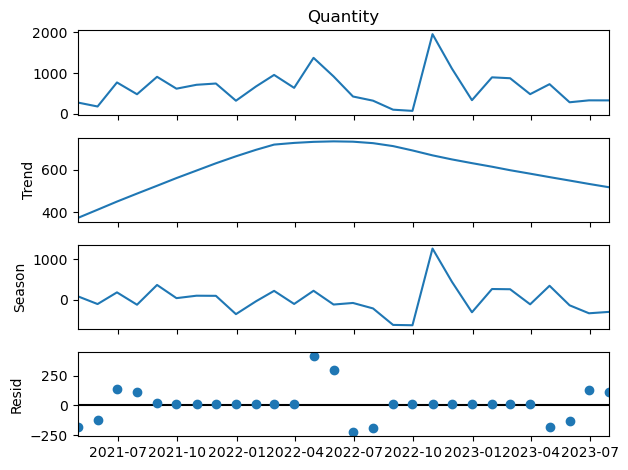

13:37:05 - cmdstanpy - INFO - Chain [1] start processing
13:37:06 - cmdstanpy - INFO - Chain [1] done processing



📋 MAPE of Different Models:
          Model      MAPE
1          Holt  0.335620
0           SES  0.336315
3         ARIMA  0.348029
2  Holt_Winters  0.729442
4       Prophet  2.459381

✅ Best Model Selected: Holt

📈 Final 3 Months Forecast (Values):
              Forecast
2023-12-31  479.506131
2024-01-31  457.386324
2024-02-29  435.266518


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
from prophet import Prophet
from statsmodels.tsa.seasonal import STL

# 1. STL Decomposition (optional visualization)
stl = STL(train['Quantity'], seasonal=13)
res = stl.fit()
res.plot()
plt.show()

# 2. Models Training (without Naive)

results = {}
forecasts = {}

## (a) Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(train['Quantity']).fit()
ses_preds = ses_model.forecast(len(test))
mape_ses = mean_absolute_percentage_error(test['Quantity'], ses_preds)
results['SES'] = mape_ses
forecasts['SES'] = ses_preds

## (b) Holt’s Linear Trend
holt_model = ExponentialSmoothing(train['Quantity'], trend='add', seasonal=None).fit()
holt_preds = holt_model.forecast(len(test))
mape_holt = mean_absolute_percentage_error(test['Quantity'], holt_preds)
results['Holt'] = mape_holt
forecasts['Holt'] = holt_preds

## (c) Holt-Winters (additive seasonality)
hw_model = ExponentialSmoothing(train['Quantity'], trend='add', seasonal='add', seasonal_periods=12).fit()
hw_preds = hw_model.forecast(len(test))
mape_hw = mean_absolute_percentage_error(test['Quantity'], hw_preds)
results['Holt_Winters'] = mape_hw
forecasts['Holt_Winters'] = hw_preds

## (d) ARIMA
arima_model = ARIMA(train['Quantity'], order=(1,1,1)).fit()
arima_preds = arima_model.forecast(len(test))
mape_arima = mean_absolute_percentage_error(test['Quantity'], arima_preds)
results['ARIMA'] = mape_arima
forecasts['ARIMA'] = arima_preds

## (e) Prophet
df_prophet = train.reset_index()
df_prophet.columns = ['ds', 'y']

model_prophet = Prophet(seasonality_mode='additive', yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model_prophet.fit(df_prophet)

future = model_prophet.make_future_dataframe(periods=len(test), freq='M')
forecast = model_prophet.predict(future)

prophet_preds = forecast['yhat'].iloc[-len(test):].values
mape_prophet = mean_absolute_percentage_error(test['Quantity'], prophet_preds)
results['Prophet'] = mape_prophet
forecasts['Prophet'] = prophet_preds

# 3. Compare Models
result_df = pd.DataFrame(list(results.items()), columns=['Model', 'MAPE'])
result_df = result_df.sort_values('MAPE')

print("\n📋 MAPE of Different Models:")
print(result_df)

# 4. Best Model select
best_model_name = result_df.iloc[0]['Model']
print("\n✅ Best Model Selected:", best_model_name)

# 5. Train Final Model on full data (train+test) and Forecast next 3 months
full_series = pd.concat([train, test])

if best_model_name == 'SES':
    final_model = SimpleExpSmoothing(full_series['Quantity']).fit()
    forecast_final = final_model.forecast(3)

elif best_model_name == 'Holt':
    final_model = ExponentialSmoothing(full_series['Quantity'], trend='add', seasonal=None).fit()
    forecast_final = final_model.forecast(3)

elif best_model_name == 'Holt_Winters':
    final_model = ExponentialSmoothing(full_series['Quantity'], trend='add', seasonal='add', seasonal_periods=12).fit()
    forecast_final = final_model.forecast(3)

elif best_model_name == 'ARIMA':
    final_model = ARIMA(full_series['Quantity'], order=(1,1,1)).fit()
    forecast_final = final_model.forecast(3)

elif best_model_name == 'Prophet':
    df_prophet_full = full_series.reset_index()
    df_prophet_full.columns = ['ds', 'y']
    model_prophet_final = Prophet(seasonality_mode='additive', yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model_prophet_final.fit(df_prophet_full)
    future_final = model_prophet_final.make_future_dataframe(periods=3, freq='M')
    forecast_final = model_prophet_final.predict(future_final)['yhat'].iloc[-3:].values

# 6. Final Forecast Output
forecast_months = pd.date_range(start=full_series.index[-1] + pd.offsets.MonthEnd(1), periods=3, freq='M')
final_forecast_df = pd.DataFrame({'Forecast': forecast_final}, index=forecast_months)

print("\n📈 Final 3 Months Forecast (Values):")
print(final_forecast_df)



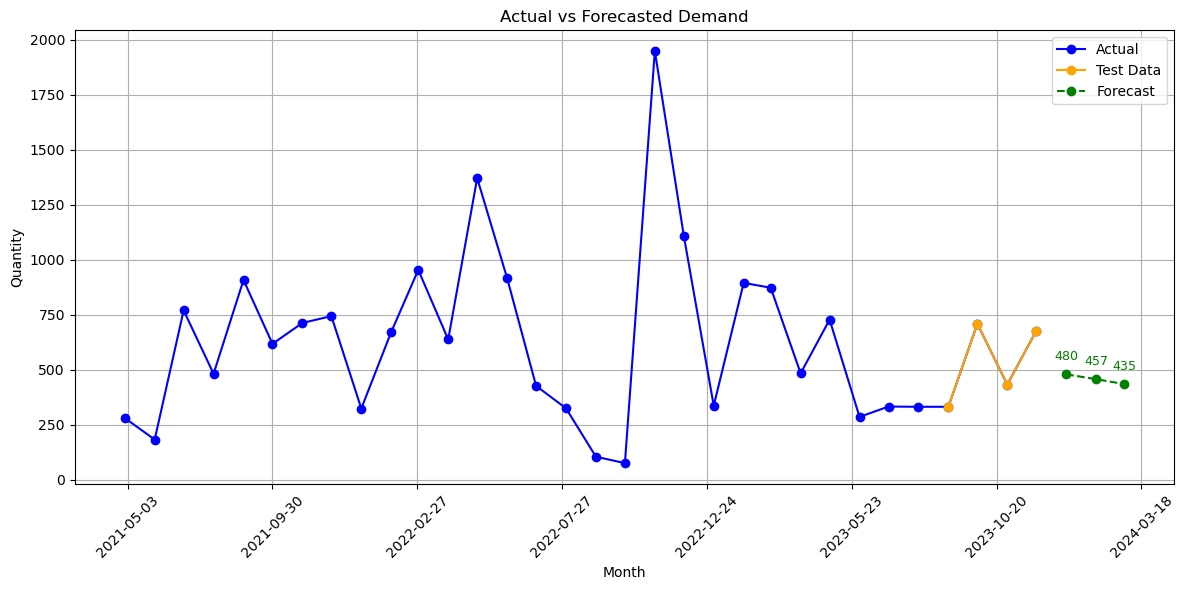

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(full_series.index, full_series['Quantity'], label='Actual', color='blue', marker='o')
plt.plot(test.index, test['Quantity'], label='Test Data', color='orange', marker='o')
plt.plot(forecast_months, forecast_final, label='Forecast', color='green', linestyle='--', marker='o')

# Forecast values ko graph par likhna
for x, y in zip(forecast_months, forecast_final):
    plt.text(x, y + 50, f'{y:.0f}', ha='center', va='bottom', fontsize=9, color='green')

# x-axis ko tightly set karna
plt.xticks(full_series.index.append(forecast_months), rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # saare months dikhane ke liye

plt.title('Actual vs Forecasted Demand')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


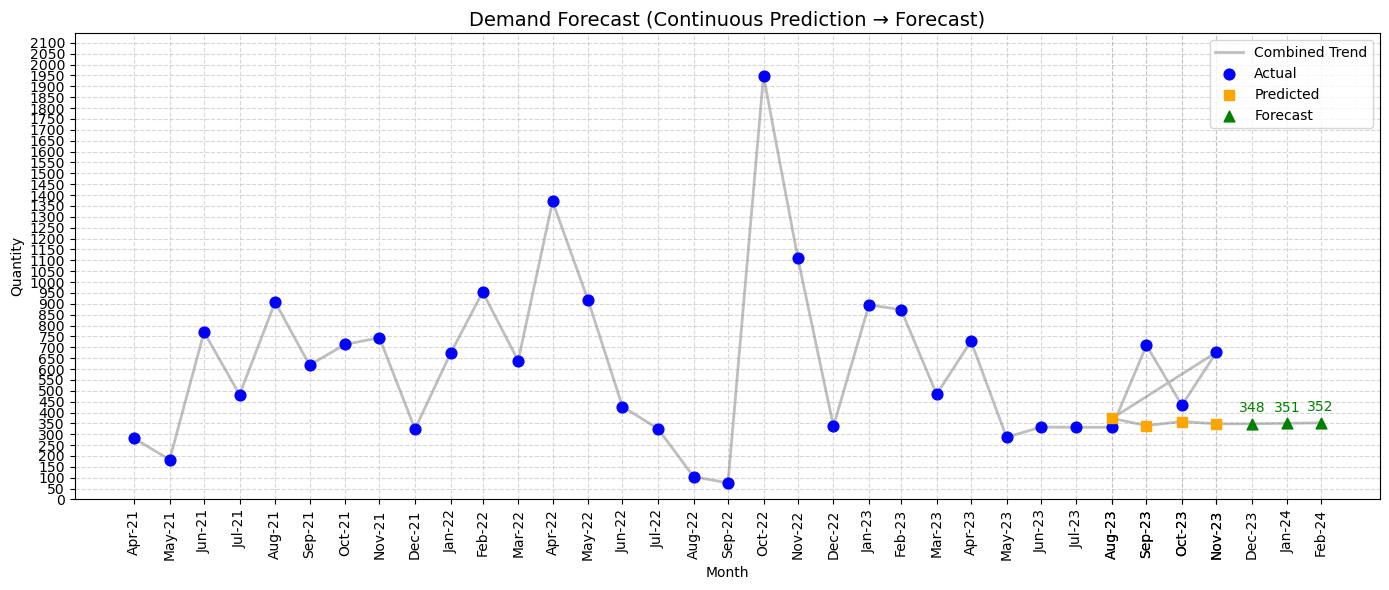

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- 1. Prepare Data (Ensure Continuity) ---
# Assuming you have:
# - full_series (actual data)
# - test (test period actuals)
# - pred_arima (predictions for test period)
# - forecast_arima (future forecasts)

# Force continuity: Make first forecast value = last predicted value
# Convert to numpy arrays if they're pandas Series
pred_values = pred_arima.values if hasattr(pred_arima, 'values') else pred_arima
forecast_values = forecast_arima.values if hasattr(forecast_arima, 'values') else forecast_arima

forecast_values[0] = pred_values[-1]  # Use proper indexing

# Combine all data into one continuous array
combined_values = np.concatenate([
    full_series['Quantity'].values,  # Historical actuals
    pred_values,                     # Predictions (test period)
    forecast_values                  # Forecasts (future)
])

# --- 2. Create Time Axis ---
# Generate full date range (historical + predicted + forecast periods)
historical_dates = full_series.index
test_dates = test.index  # Dates for the test period
forecast_dates = pd.date_range(
    start=test_dates[-1] + pd.offsets.MonthEnd(1),
    periods=len(forecast_values),
    freq='M'
)
all_dates = historical_dates.append(test_dates).append(forecast_dates)

# --- 3. Plotting ---
plt.figure(figsize=(14, 6))

# A. Main Connected Line (No Gaps)
plt.plot(all_dates, combined_values,
         color='grey', linewidth=2, alpha=0.5,
         label='Combined Trend')

# B. Phase-Specific Markers
# Actual data
plt.scatter(historical_dates, full_series['Quantity'],
            color='blue', s=60, label='Actual', zorder=3)

# Predicted (test period)
test_dates = test.index
plt.scatter(test_dates, pred_values,
            color='orange', s=60, marker='s', label='Predicted', zorder=3)

# Forecast
plt.scatter(forecast_dates, forecast_values,
            color='green', s=60, marker='^', label='Forecast', zorder=3)

# C. Annotate Forecast Values
for date, val in zip(forecast_dates, forecast_values):
    plt.text(date, val + 0.02*max(combined_values), f'{val:.0f}',
             ha='center', va='bottom', color='green')

# --- 4. Formatting ---
# Y-axis: Fixed intervals (e.g., 50 units)
y_max = max(combined_values) * 1.1
plt.ylim(0, y_max)
plt.yticks(np.arange(0, y_max, 50))

# X-axis: Rotated month labels
plt.xticks(all_dates, [d.strftime('%b-%y') for d in all_dates], rotation=90)

plt.title('Demand Forecast (Continuous Prediction → Forecast)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()